**GRUPO 2**

> **Integrantes**:
>
> - Roberto Perez Esteban
> - Sofia Gomez Ramirez
> - Agustin Arganin Castillo

Proyecto de análisis exploratorio de datos de inmuebles

In [3]:
import csv
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy
import seaborn as sns

pd.options.mode.copy_on_write = True

# Proyecto EDA
## Análisis de Viviendas

In [2]:
print(os.getcwd())

c:\Users\asgr2\Desktop\Bootcamp_DS\EDA_Inmuebles_Idealista\src\notebooks


In [6]:
datasets = []
base_path = "../data"

### Cargar datos de múltiples datasets
#### 21-04-2023

Dentro de la carpeta encontramos archivos `.txt` y `.csv`.

In [4]:
path = f"{base_path}/23-04-21"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-04-21
['23-04-21 Descarga Idealista.txt', '23-04-21Datos2000(4).csv']


##### Archivo: **23-04-21 Descarga Idealista.txt**

Cargamos el dataset.

In [6]:
dir = f"{path}/{files[0]}"
print("Directory:", dir)
with open(dir, "r", encoding="utf-8") as file:
	line = file.read()
	json_data = json.loads(line)

data = pd.DataFrame(json_data)
data.sample(5)

Directory: ../data/23-04-21/23-04-21 Descarga Idealista.txt


,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,superTopHighlight,labels,newDevelopmentFinished
1,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,46,5,760000.0,penthouse,sale,154.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
33,97032661,https://img3.idealista.com/blur/WEB_LISTING/0/...,71VS020010A,4,1,415000.0,flat,sale,94.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
742,99923446,https://img3.idealista.com/blur/WEB_LISTING/0/...,DS-P22510,36,1,900000.0,flat,sale,132.0,True,...,"{'subtitle': 'Jerónimos, Madrid', 'title': 'Pi...",True,False,False,True,{'groupDescription': 'Top'},False,False,NaN,NaN
51,101138870,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,23,bj,299000.0,flat,sale,99.0,True,...,"{'subtitle': 'Bellas Vistas, Madrid', 'title':...",False,False,False,False,NaN,False,False,NaN,NaN
486,98817986,https://img3.idealista.com/blur/WEB_LISTING/0/...,W-02GXHA,41,NaN,1350000.0,flat,sale,238.0,True,...,"{'subtitle': 'Almagro, Madrid', 'title': 'Piso'}",True,True,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN


Análizamos brevemente lo que posee, pero antes desarrollamos una función que nos ayude a agilizar el proceso.

In [ ]:
def basic_dataset_info(dataset):
	rows = len(dataset)
	cols = len(dataset.columns)

	print(f"Información de dataset: {rows} registros, {cols} columnas")
	print("Revisión de columnas del dataset:")
	print("="*60)

	columns = dataset.columns
	for column in columns:
		print(f"\t-{column} ({dataset[column].dtype}):")

		nulos = dataset[column].isna().sum()
		print(f"\t\t-Registros nulos: {nulos} ({nulos/rows * 100:.3f}%)")

		cardinality = len(dataset[column].value_counts())/rows
		print(f"\t\t-Cardinalidad: {cardinality * 100:.3f}%")

Desarrollamos una función para extraer información básica del dataset.

In [ ]:
basic_dataset_info(data)

Información de dataset: 1192 registros, 41 columnas
Revisión de columnas del dataset:
	-propertyCode (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 89.346%
	-thumbnail (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.591%
	-externalReference (object):
		-Registros nulos: 65 (5.453%)
		-Cardinalidad: 83.305%
	-numPhotos (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 6.963%
	-floor (object):
		-Registros nulos: 134 (11.242%)
		-Cardinalidad: 1.678%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.171%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.419%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 26.594%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.168%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.839%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinali

In [ ]:
datasets.append(data)

##### Archivo: **23-04-21Datos2000(4).csv**

In [ ]:
dir = f"{path}/{files[0]}"
#dir = f"{base_path}/23-04-21/{files[1]}"
print("Directory:", dir)
pd.read_csv(dir)

Directory: ../data/23-04-21/23-04-21Datos2000(4).csv


,latitude,longitude
0,40.474176,-3.718524
1,40.473012,-3.721207
2,40.469095,-3.716839
3,40.471575,-3.719830
4,40.473213,-3.720713
...,...,...
1187,40.384186,-3.671609
1188,40.384380,-3.668888
1189,40.384115,-3.670471
1190,40.382617,-3.667895


Cómo vemos, este archivo posee información que no vamos a poder asociar a ningún inmueble.

#### 20-05-2023

Dentro de la carpeta encontramos una variedad de archivos: `.txt`, `.csv` , `.xlsx`.

In [ ]:
path = f"{base_path}/23-05-20"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-05-20
['DatosDescarga2(1).csv', 'Listado.txt', 'Verificaciones.xlsx', 'DatosDescarga.csv', 'Verificación 2.csv', 'DatosDescarga2(1) - nuda.csv']


##### Archivo: **DatosDescarga2(1).csv**

In [ ]:
dir = f"{path}/{files[0]}"
print("Directory:", dir)
data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-05-20/DatosDescarga2(1).csv


,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
711,711,100785698,2950000.0,flat,sale,230.0,True,3,4,Calle de Villanueva,...,False,3,True,NaN,flat,NaN,Piso en Calle de Villanueva,"Recoletos, Madrid",NaN,NaN
637,637,99918713,1396000.0,flat,sale,297.0,True,4,3,barrio El Viso,...,False,4,True,NaN,flat,NaN,Piso,"El Viso, Madrid",NaN,NaN
755,755,100915703,550000.0,flat,sale,112.0,True,4,2,Paseo de la Infanta Isabel,...,False,2,True,NaN,flat,NaN,Piso en Paseo de la Infanta Isabel,"Jerónimos, Madrid",NaN,NaN
689,689,96964723,6950000.0,penthouse,sale,750.0,True,6,6,barrio Castellana,...,False,7,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático,"Castellana, Madrid",True,True
294,294,100993014,310000.0,flat,sale,50.0,False,2,1,Calle de Fernández de los Ríos,...,False,1,True,NaN,flat,NaN,Piso en Calle de Fernández de los Ríos,"Arapiles, Madrid",NaN,NaN


In [ ]:
basic_dataset_info(data)

Información de dataset: 1196 registros, 37 columnas
Revisión de columnas del dataset:
	-Unnamed: 0 (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 100.000%
	-propertyCode (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.294%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.629%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.418%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 25.669%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.167%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.836%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.669%
	-address (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 49.666%
	-province (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.

In [ ]:
datasets.append(data)

##### Archivo: **Listado.txt**

In [ ]:
dir = f"{path}/{files[1]}"
print("Directory:", dir)
with open(dir, "r", encoding="utf-8") as file:
	line = file.read()
	json_data = json.loads(line)

data = pd.DataFrame(json_data)
data.sample(5)

Directory: ../data/23-05-20/Listado.txt


,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,superTopHighlight,topNewDevelopment,labels,newDevelopmentFinished
303,100740621,https://img3.idealista.com/blur/WEB_LISTING/0/...,MAD40086,43,NaN,1390000.0,flat,sale,137.0,True,...,"{'subtitle': 'Malasaña-Universidad, Madrid', '...",True,True,False,True,{'groupDescription': 'Top'},False,False,NaN,NaN
873,100657905,https://img3.idealista.com/blur/WEB_LISTING/0/...,INM14163,47,3,829000.0,flat,sale,187.0,True,...,"{'subtitle': 'Prosperidad, Madrid', 'title': '...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
854,101400990,https://img3.idealista.com/blur/WEB_LISTING/0/...,1-1350,42,6,529000.0,penthouse,sale,77.0,True,...,"{'subtitle': 'Bernabéu-Hispanoamérica, Madrid'...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
859,101254099,https://img3.idealista.com/blur/WEB_LISTING/0/...,AR185660,44,NaN,6300000.0,chalet,sale,587.0,False,...,"{'subtitle': 'El Viso, Madrid', 'title': 'Chal...",True,True,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
226,100878019,https://img3.idealista.com/blur/WEB_LISTING/0/...,Bajo C,7,bj,303300.0,flat,sale,59.0,True,...,"{'subtitle': 'Berruguete, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,False


In [ ]:
basic_dataset_info(data)

Información de dataset: 1196 registros, 41 columnas
Revisión de columnas del dataset:
	-propertyCode (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.294%
	-thumbnail (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 87.542%
	-externalReference (object):
		-Registros nulos: 68 (5.686%)
		-Cardinalidad: 81.773%
	-numPhotos (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 7.274%
	-floor (object):
		-Registros nulos: 117 (9.783%)
		-Cardinalidad: 1.672%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.629%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.418%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 25.669%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.167%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.836%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalid

In [ ]:
datasets.append(data)

##### Archivo: **Verificaciones.xlsx**

In [ ]:
dir = f"{path}/{files[2]}"
print("Directory:", dir)

data = pd.read_excel(dir)
data.sample(5)

Directory: ../data/23-05-20/Verificaciones.xlsx


,Unnamed: 0,Unnamed: 1
989,101188973,1
1366,101620844,1
436,100070468,1
667,100692928,2
1484,101783328,1


##### Archivo: **DatosDescarga.csv**

In [ ]:
dir = f"{path}/{files[3]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-05-20/DatosDescarga.csv


,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,newDevelopment.1,priceByArea,detailedType,suggestedTexts,hasPlan,topNewDevelopment,superTopHighlight,floor,hasLift,parkingSpace
848,848,101186638,1150000.0,flat,sale,195.0,True,4,3,barrio Bernabéu-Hispanoamérica,...,False,5897.0,{'typology': 'flat'},"{'subtitle': 'Bernabéu-Hispanoamérica, Madrid'...",True,False,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
4,4,101308619,530000.0,flat,sale,113.0,True,3,2,Calle de Juan Sánchez,...,False,4690.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,1,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
521,521,100843340,1890000.0,flat,sale,270.0,True,3,3,barrio Sol,...,False,7000.0,{'typology': 'flat'},"{'subtitle': 'Sol, Madrid', 'title': 'Piso'}",True,False,False,3,True,NaN
42,42,100596385,1150000.0,chalet,sale,184.0,False,7,4,Calle de Tremp,...,False,6250.0,"{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Ciudad Universitaria, Madrid', '...",True,False,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1042,1042,99290520,650000.0,flat,sale,111.0,True,3,2,Calle de Luis Cabrera,...,False,5856.0,{'typology': 'flat'},"{'subtitle': 'Prosperidad, Madrid', 'title': '...",True,False,False,4,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."


In [ ]:
basic_dataset_info(data)

Información de dataset: 1196 registros, 31 columnas
Revisión de columnas del dataset:
	-Unnamed: 0 (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 100.000%
	-propertyCode (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.294%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.629%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.418%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 25.669%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.167%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.836%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.669%
	-address (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 49.666%
	-province (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.

In [ ]:
datasets.append(data)

##### Archivo: **Verificación 2.csv**

In [ ]:
dir = f"{path}/{files[4]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-05-20/Verificación 2.csv


,ex,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,n�mero de veces
2114,587.0,103262585.0,370000.0,flat,sale,108.0,True,4.0,1.0,Calle de Jaime el Conquistador,...,2,True,NaN,flat,NaN,Piso en Calle de Jaime el Conquistador,"Chopera, Madrid",NaN,NaN,2.0
1151,883.0,101171567.0,1200000.0,flat,sale,125.0,False,3.0,2.0,Calle del Gral. Pardiñas s/n,...,4,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle del Gral. Pardiñas s/n,"Lista, Madrid",True,False,1.0
521,1172.0,99962054.0,422000.0,flat,sale,100.0,True,4.0,2.0,"Avenida Ciudad de Barcelona, 210",...,4,True,NaN,flat,NaN,"Piso en Avenida Ciudad de Barcelona, 210","Adelfas, Madrid",NaN,NaN,2.0
844,889.0,100766845.0,1400000.0,flat,sale,169.0,True,3.0,2.0,Calle de Castelló,...,5,True,NaN,flat,NaN,Piso en Calle de Castelló,"Castellana, Madrid",NaN,NaN,2.0
2020,12.0,103110744.0,480000.0,flat,sale,117.0,True,2.0,2.0,Calle de Juan Sánchez,...,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True,1.0


In [ ]:
basic_dataset_info(data)

Información de dataset: 2395 registros, 37 columnas
Revisión de columnas del dataset:
	-ex (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 50.021%
	-propertyCode (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 83.257%
	-price (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 27.641%
	-propertyType (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.209%
	-operation (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.042%
	-size (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 14.990%
	-exterior (object):
		-Registros nulos: 66 (2.756%)
		-Cardinalidad: 0.084%
	-rooms (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.459%
	-bathrooms (float64):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.376%
	-address (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 39.499%
	-province (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 0.042%
	-municipality (object):
		-Registros nulos: 1 (0.042%)
		-Cardinalidad: 

In [ ]:
datasets.append(data)

##### Archivo: **DatosDescarga2(1) - nuda.csv**

In [ ]:
dir = f"{path}/{files[5]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-05-20/DatosDescarga2(1) - nuda.csv


,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,Nuda
891,891.0,100460134.0,1470000.0,flat,sale,169.0,True,3.0,4.0,barrio Lista,...,2,True,NaN,flat,NaN,Piso,"Lista, Madrid",NaN,NaN,0.0
379,379.0,101167517.0,168000.0,flat,sale,80.0,False,2.0,1.0,barrio Moscardó,...,NaN,False,NaN,flat,NaN,Piso,"Moscardó, Madrid",NaN,NaN,0.0
1171,1171.0,100098052.0,175000.0,flat,sale,98.0,True,2.0,1.0,barrio Numancia,...,bj,False,NaN,flat,NaN,Piso,"Numancia, Madrid",NaN,NaN,0.0
819,819.0,101088666.0,2150000.0,flat,sale,337.0,True,5.0,4.0,barrio Nueva España,...,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Nueva España, Madrid",True,True,0.0
940,940.0,99405784.0,590000.0,flat,sale,131.0,True,3.0,2.0,Paseo de la Reina Cristina,...,6,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Paseo de la Reina Cristina,"Jerónimos, Madrid",True,True,0.0


In [ ]:
basic_dataset_info(data)

Información de dataset: 1198 registros, 38 columnas
Revisión de columnas del dataset:
	-Unnamed: 0 (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 99.833%
	-propertyCode (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 88.147%
	-price (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 38.564%
	-propertyType (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.417%
	-operation (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.083%
	-size (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 25.626%
	-exterior (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.167%
	-rooms (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.835%
	-bathrooms (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.668%
	-address (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 49.583%
	-province (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.083%
	-municipality (object):
		-Registros nulos: 2 (0.167%)
		-Cardina

In [ ]:
datasets.append(data)

#### 19-06-2023

In [ ]:
path = f"{base_path}/23-06-19"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-06-19
['Listado.txt', 'DatosDescarga.csv', 'DatosDescarga2 - nuda.csv', 'DatosDescarga2.csv']


##### Archivo: **Listado.txt**

In [ ]:
dir = f"{path}/{files[0]}"
print("Directory:", dir)
with open(dir, "r", encoding="utf-8") as file:
	line = file.read()
	json_data = json.loads(line)

data = pd.DataFrame(json_data)
data.sample(5)

Directory: ../data/23-06-19/Listado.txt


,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,superTopHighlight,labels,newDevelopmentFinished
609,100200601,https://img3.idealista.com/blur/WEB_LISTING/0/...,Poz-PC04231,46,4,685000.0,flat,sale,145.0,True,...,"{'subtitle': 'Ventilla-Almenara, Madrid', 'tit...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
598,97958060,https://img3.idealista.com/blur/WEB_LISTING/0/...,AR174891,29,NaN,1100000.0,chalet,sale,187.0,False,...,"{'subtitle': 'Castilla, Madrid', 'title': 'Cas...",False,True,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
27,101702392,https://img3.idealista.com/blur/WEB_LISTING/0/...,00983,21,3,239000.0,flat,sale,68.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",False,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
742,97998223,https://img3.idealista.com/blur/WEB_LISTING/0/...,W-02O3GJ,31,3,1470000.0,flat,sale,384.0,True,...,"{'subtitle': 'Palos de Moguer, Madrid', 'title...",False,True,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
685,101783328,https://img3.idealista.com/blur/WEB_LISTING/0/...,MV4985I,53,2,1070000.0,flat,sale,122.0,True,...,"{'subtitle': 'Almagro, Madrid', 'title': 'Piso'}",False,True,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN


In [ ]:
basic_dataset_info(data)

Información de dataset: 1194 registros, 41 columnas
Revisión de columnas del dataset:
	-propertyCode (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.526%
	-thumbnail (object):
		-Registros nulos: 1 (0.084%)
		-Cardinalidad: 87.856%
	-externalReference (object):
		-Registros nulos: 74 (6.198%)
		-Cardinalidad: 82.412%
	-numPhotos (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 7.370%
	-floor (object):
		-Registros nulos: 111 (9.296%)
		-Cardinalidad: 1.759%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.693%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.419%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 26.214%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.168%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.838%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalid

In [ ]:
datasets.append(data)

##### Archivo: **DatosDescarga.csv**

In [ ]:
dir = f"{path}/{files[1]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-06-19/DatosDescarga.csv


,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,newDevelopment.1,priceByArea,detailedType,suggestedTexts,hasPlan,topNewDevelopment,superTopHighlight,floor,hasLift,parkingSpace
666,666,101337411,2400000.0,flat,sale,240.0,True,4,4,barrio Castellana,...,False,10000.0,{'typology': 'flat'},"{'subtitle': 'Castellana, Madrid', 'title': 'P...",True,False,False,3,False,NaN
680,680,86340754,2300000.0,penthouse,sale,257.0,True,3,4,Calle de Alfonso X,...,False,8949.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Almagro, Madrid', 'title': 'Átic...",True,False,False,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
815,815,101021281,3150000.0,chalet,sale,556.0,False,5,7,barrio Nueva España,...,False,5665.0,"{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Nueva España, Madrid', 'title': ...",True,False,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
75,75,101608117,1000000.0,flat,sale,244.0,True,6,2,Calle de Meléndez Valdés,...,False,4098.0,{'typology': 'flat'},"{'subtitle': 'Argüelles, Madrid', 'title': 'Pi...",True,False,False,2,True,NaN
6,6,101564445,579900.0,flat,sale,140.0,True,3,2,Calle del Doctor Ramón Castroviejo,...,False,4142.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."


In [ ]:
basic_dataset_info(data)

Información de dataset: 1194 registros, 31 columnas
Revisión de columnas del dataset:
	-Unnamed: 0 (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 100.000%
	-propertyCode (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.526%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.693%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.419%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 26.214%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.168%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.838%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.670%
	-address (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 47.906%
	-province (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.

In [ ]:
datasets.append(data)

##### Archivo: **DatosDescarga2 - nuda.csv**

In [ ]:
dir = f"{path}/{files[2]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-06-19/DatosDescarga2 - nuda.csv


,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,Nuda
397,397.0,99917658.0,209900.0,flat,sale,56.0,True,2.0,1.0,Calle de los Geranios,...,1,False,NaN,flat,NaN,Piso en Calle de los Geranios,"Ventilla-Almenara, Madrid",NaN,NaN,0.0
1158,1158.0,101593785.0,387000.0,duplex,sale,67.0,True,2.0,2.0,barrio Adelfas,...,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,duplex,Dúplex,"Adelfas, Madrid",True,True,0.0
613,613.0,99986960.0,370000.0,flat,sale,72.0,True,3.0,1.0,"Paseo de la Castellana, 207",...,6,True,NaN,flat,NaN,"Piso en Paseo de la Castellana, 207","Ventilla-Almenara, Madrid",NaN,NaN,0.0
817,817.0,99303913.0,2455000.0,flat,sale,266.0,True,3.0,5.0,"Paseo de la habana, 147",...,1,True,NaN,flat,NaN,"Piso en Paseo de la habana, 147","Nueva España, Madrid",NaN,NaN,0.0
927,927.0,100262756.0,750000.0,flat,sale,105.0,True,2.0,2.0,Calle del Duque de Sesto,...,5,True,NaN,flat,NaN,Piso en Calle del Duque de Sesto,"Goya, Madrid",NaN,NaN,0.0


In [ ]:
basic_dataset_info(data)

Información de dataset: 1196 registros, 38 columnas
Revisión de columnas del dataset:
	-Unnamed: 0 (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 99.833%
	-propertyCode (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 88.378%
	-price (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 38.629%
	-propertyType (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.418%
	-operation (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 26.171%
	-exterior (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.167%
	-rooms (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.836%
	-bathrooms (float64):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.669%
	-address (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 47.826%
	-province (object):
		-Registros nulos: 2 (0.167%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 2 (0.167%)
		-Cardina

In [ ]:
datasets.append(data)

##### Archivo: **DatosDescarga2.csv**

In [ ]:
dir = f"{path}/{files[3]}"
print("Directory:", dir)

data = pd.read_csv(dir)
data.sample(5)

Directory: ../data/23-06-19/DatosDescarga2.csv


,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
1160,1160,101295966,354000.0,penthouse,sale,124.0,True,3,2,Calle Emilio Raboso,...,False,3,True,NaN,flat,penthouse,Ático en Calle Emilio Raboso,"San Diego, Madrid",NaN,NaN
1187,1187,98311246,205770.0,flat,sale,98.0,False,3,2,Calle Sierra Carbonera,...,False,bj,False,NaN,flat,NaN,Piso en Calle Sierra Carbonera,"Palomeras Bajas, Madrid",NaN,NaN
409,409,101745755,215000.0,flat,sale,61.0,True,3,1,Calle del Ailanto,...,False,3,False,NaN,flat,NaN,Piso en Calle del Ailanto,"Ventilla-Almenara, Madrid",NaN,NaN
1097,1097,101288675,1350000.0,penthouse,sale,136.0,True,3,3,Alcalá,...,False,8,True,NaN,flat,penthouse,Ático en Alcalá,"Goya, Madrid",NaN,NaN
461,461,99853905,345000.0,flat,sale,99.0,True,1,1,Calle de Maudes,...,False,bj,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de Maudes,"Nuevos Ministerios-Ríos Rosas, Madrid",True,True


In [ ]:
basic_dataset_info(data)

Información de dataset: 1194 registros, 37 columnas
Revisión de columnas del dataset:
	-Unnamed: 0 (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 100.000%
	-propertyCode (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 88.526%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 38.693%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.419%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 26.214%
	-exterior (bool):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.168%
	-rooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.838%
	-bathrooms (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.670%
	-address (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 47.906%
	-province (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.084%
	-municipality (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.

In [ ]:
datasets.append(data)

#### 1) Union `21-04-2023 - 19-06-2023`
Concatenamos los todos los dataset que hemos ido guardando en `dataframes`.

In [ ]:
df_union_1 = pd.concat(datasets, ignore_index=True)
df_union_1.sample(2)

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,newDevelopment.1,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,ex,n�mero de veces,Nuda
4842,93086859.0,NaN,NaN,NaN,bj,219000.0,flat,sale,84.0,False,...,False,flat,NaN,Piso en Paseo del Quince de Mayo,"San Isidro, Madrid",NaN,NaN,158.0,1.0,NaN
5153,99240673.0,NaN,NaN,NaN,3,359000.0,flat,sale,105.0,True,...,False,flat,NaN,"Piso en Calle de Jerónima Llorente, 43","Bellas Vistas, Madrid",NaN,NaN,237.0,2.0,NaN


#### 29-10-2029

In [ ]:
path = f"{base_path}/23-10-29"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-10-29
['Listado.txt', 'DatosDescarga.csv', 'DatosDescarga2.csv']


##### Archivo: **DatosDescarga.csv**

In [ ]:
df_2023_10_29 = pd.read_csv(f"{path}/DatosDescarga.csv") 
df_2023_10_29

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,newDevelopment.1,priceByArea,detailedType,suggestedTexts,hasPlan,topNewDevelopment,superTopHighlight,floor,hasLift,parkingSpace
0,0,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,False,4838.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1,1,102714810,370000.0,flat,sale,103.0,True,3,2,Calle Valdesangil,...,False,3592.0,{'typology': 'flat'},"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,False,1,True,NaN
2,2,102015772,385000.0,flat,sale,77.0,True,3,2,"Calle Isla Malaita, 7",...,False,5000.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,10,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
3,3,102147885,890000.0,chalet,sale,325.0,NaN,7,5,Calle de las Islas Marquesas,...,False,2738.0,"{'typology': 'chalet', 'subTypology': 'terrace...","{'subtitle': 'Peñagrande, Madrid', 'title': 'C...",True,False,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
4,4,102643242,1300000.0,chalet,sale,388.0,NaN,5,6,Calle de San Gerardo,...,False,3351.0,"{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Valdezarza, Madrid', 'title': 'C...",False,False,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1193,101654615,199999.0,flat,sale,140.0,True,3,3,Calle de Alfredo Castro Camba,...,False,1429.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",False,False,False,bj,False,NaN
1194,1194,100063977,390000.0,duplex,sale,184.0,True,4,3,Calle de Sierra Carbonera,...,False,2120.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1195,1195,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,False,2882.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,False,bj,False,NaN
1196,1196,102963285,205000.0,flat,sale,153.0,True,3,3,Calle de Alfredo Castro Camba,...,False,1340.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",False,False,False,bj,False,NaN


##### Archivo: **DatosDescarga2.csv**

In [ ]:
df_2023_10_29_2 = pd.read_csv(f"{path}/DatosDescarga2.csv")
df_2023_10_29_2

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
0,0,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
1,1,102714810,370000.0,flat,sale,103.0,True,3,2,Calle Valdesangil,...,False,1,True,NaN,flat,NaN,Piso en Calle Valdesangil,"Valdezarza, Madrid",NaN,NaN
2,2,102015772,385000.0,flat,sale,77.0,True,3,2,"Calle Isla Malaita, 7",...,False,10,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,"Piso en Calle Isla Malaita, 7","Peñagrande, Madrid",True,True
3,3,102147885,890000.0,chalet,sale,325.0,NaN,7,5,Calle de las Islas Marquesas,...,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",chalet,terracedHouse,Chalet adosado en Calle de las Islas Marquesas,"Peñagrande, Madrid",True,True
4,4,102643242,1300000.0,chalet,sale,388.0,NaN,5,6,Calle de San Gerardo,...,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",chalet,independantHouse,Casa independiente en Calle de San Gerardo,"Valdezarza, Madrid",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1193,101654615,199999.0,flat,sale,140.0,True,3,3,Calle de Alfredo Castro Camba,...,False,bj,False,NaN,flat,NaN,Piso en Calle de Alfredo Castro Camba,"San Diego, Madrid",NaN,NaN
1194,1194,100063977,390000.0,duplex,sale,184.0,True,4,3,Calle de Sierra Carbonera,...,False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,duplex,Dúplex en Calle de Sierra Carbonera,"San Diego, Madrid",True,False
1195,1195,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,False,bj,False,NaN,flat,duplex,Dúplex en Calle del Vizconde de Arlessón,"San Diego, Madrid",NaN,NaN
1196,1196,102963285,205000.0,flat,sale,153.0,True,3,3,Calle de Alfredo Castro Camba,...,False,bj,False,NaN,flat,NaN,Piso en Calle de Alfredo Castro Camba,"San Diego, Madrid",NaN,NaN


##### Archivo: **Listado.txt**

In [ ]:
archivo = f"{path}/Listado.txt"

with open(archivo, "r", encoding="utf-8") as f:
    contenido = f.read()

data = json.loads(contenido) # Convertir el texto a objeto Python (lista de diccionarios)

df_listado_23_10_29 = pd.DataFrame(data)
df_listado_23_10_29

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,superTopHighlight,topNewDevelopment,newDevelopmentFinished,labels
0,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,48,5,745000.0,penthouse,sale,154.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
1,102714810,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,52,1,370000.0,flat,sale,103.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
2,102015772,https://img3.idealista.com/blur/WEB_LISTING/0/...,PV:1027,32,10,385000.0,flat,sale,77.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
3,102147885,https://img3.idealista.com/blur/WEB_LISTING/0/...,31589,59,NaN,890000.0,chalet,sale,325.0,NaN,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'C...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
4,102643242,https://img3.idealista.com/blur/WEB_LISTING/0/...,INM14861,64,NaN,1300000.0,chalet,sale,388.0,NaN,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'C...",False,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,101654615,https://img3.idealista.com/blur/WEB_LISTING/0/...,28-01485,33,bj,199999.0,flat,sale,140.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",False,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1194,100063977,https://img3.idealista.com/blur/WEB_LISTING/0/...,23185_V_ANGSC,44,2,390000.0,duplex,sale,184.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1195,101137233,https://img3.idealista.com/blur/WEB_LISTING/0/...,454-VIZCONDE,35,bj,98000.0,duplex,sale,34.0,False,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,True,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1196,102963285,https://img3.idealista.com/blur/WEB_LISTING/0/...,503-ACC,42,bj,205000.0,flat,sale,153.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",False,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,"[{'name': 'reformed', 'text': 'Reformado'}]"


#### 2) Union 29-10-2023

In [ ]:
data = [df_2023_10_29, df_2023_10_29_2, df_listado_23_10_29]
df_union_2 = pd.concat(data, ignore_index=True)
df_union_2.sample(5)

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,numPhotos,neighborhood,distance,hasVideo,has3DTour,has360,hasStaging,highlight,newDevelopmentFinished,labels
887,887.0,101949129,530000.0,flat,sale,91.0,False,2,2,Calle de Francisco Silvela,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3493,NaN,101712427,995000.0,flat,sale,106.0,True,2,2,Calle de Alcántara,...,15.0,Lista,562,False,False,False,False,{'groupDescription': 'Top'},NaN,NaN
2210,1012.0,98270519,495000.0,flat,sale,68.0,True,2,2,Calle Bausá,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
926,926.0,97561519,1575000.0,flat,sale,200.0,True,4,3,barrio Goya,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1201,3.0,102147885,890000.0,chalet,sale,325.0,NaN,7,5,Calle de las Islas Marquesas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 01-12-2023

In [ ]:
path = f"{base_path}/23-12-1"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/23-12-1
['Listado.txt', 'DatosDescarga.csv', 'DatosDescarga2.csv']


##### Archivo: **DatosDescarga.csv**

In [ ]:
df_2023_12_1 = pd.read_csv(f"{path}/DatosDescarga.csv") #Mediante la función de pandas read_csv vamos a listar todos los archivos que tengamos de este tipo.
df_2023_12_1

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,newDevelopment.1,priceByArea,detailedType,suggestedTexts,hasPlan,topNewDevelopment,superTopHighlight,floor,hasLift,parkingSpace
0,0,34797321,939000.0,flat,sale,225.0,True,4,4,barrio Peñagrande,...,False,4173.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1,1,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,False,4838.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
2,2,102912846,466000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,...,False,4660.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
3,3,103170813,625000.0,flat,sale,116.0,True,3,2,Calle de Juan Sánchez,...,False,5388.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,1,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
4,4,102147885,890000.0,chalet,sale,325.0,NaN,7,5,Calle de las Islas Marquesas,...,False,2738.0,"{'typology': 'chalet', 'subTypology': 'terrace...","{'subtitle': 'Peñagrande, Madrid', 'title': 'C...",True,False,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,1194,96957712,250000.0,flat,sale,110.0,True,3,2,Calle Sierra Carbonera,...,False,2273.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,2,True,NaN
1195,1195,103269326,200000.0,flat,sale,153.0,True,3,3,Calle de Alfredo Castro Camba,...,False,1307.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,bj,False,NaN
1196,1196,100063977,390000.0,duplex,sale,184.0,True,4,3,Calle de Sierra Carbonera,...,False,2120.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1197,1197,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,False,2882.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,False,bj,False,NaN


In [ ]:
df_2023_12_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1199 non-null   int64  
 1   propertyCode       1199 non-null   int64  
 2   price              1199 non-null   float64
 3   propertyType       1199 non-null   object 
 4   operation          1199 non-null   object 
 5   size               1199 non-null   float64
 6   exterior           1126 non-null   object 
 7   rooms              1199 non-null   int64  
 8   bathrooms          1199 non-null   int64  
 9   address            1199 non-null   object 
 10  province           1199 non-null   object 
 11  municipality       1199 non-null   object 
 12  district           1199 non-null   object 
 13  country            1199 non-null   object 
 14  newDevelopment     1199 non-null   bool   
 15  latitude           1199 non-null   float64
 16  longitude          1199 

##### Archivo: **DatosDescarga2.csv**

In [ ]:
df_2023_12_1_2= pd.read_csv(f"{path}/DatosDescarga2.csv")
df_2023_12_1_2

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
0,0,34797321,939000.0,flat,sale,225.0,True,4,4,barrio Peñagrande,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Peñagrande, Madrid",True,True
1,1,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
2,2,102912846,466000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de La Bañeza,"Peñagrande, Madrid",True,True
3,3,103170813,625000.0,flat,sale,116.0,True,3,2,Calle de Juan Sánchez,...,False,1,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
4,4,102147885,890000.0,chalet,sale,325.0,NaN,7,5,Calle de las Islas Marquesas,...,False,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",chalet,terracedHouse,Chalet adosado en Calle de las Islas Marquesas,"Peñagrande, Madrid",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,1194,96957712,250000.0,flat,sale,110.0,True,3,2,Calle Sierra Carbonera,...,False,2,True,NaN,flat,NaN,Piso en Calle Sierra Carbonera,"San Diego, Madrid",NaN,NaN
1195,1195,103269326,200000.0,flat,sale,153.0,True,3,3,Calle de Alfredo Castro Camba,...,False,bj,False,NaN,flat,NaN,Piso en Calle de Alfredo Castro Camba,"San Diego, Madrid",NaN,NaN
1196,1196,100063977,390000.0,duplex,sale,184.0,True,4,3,Calle de Sierra Carbonera,...,False,2,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,duplex,Dúplex en Calle de Sierra Carbonera,"San Diego, Madrid",True,False
1197,1197,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,False,bj,False,NaN,flat,duplex,Dúplex en Calle del Vizconde de Arlessón,"San Diego, Madrid",NaN,NaN


In [ ]:
df_2023_12_1_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1199 non-null   int64  
 1   propertyCode       1199 non-null   int64  
 2   price              1199 non-null   float64
 3   propertyType       1199 non-null   object 
 4   operation          1199 non-null   object 
 5   size               1199 non-null   float64
 6   exterior           1126 non-null   object 
 7   rooms              1199 non-null   int64  
 8   bathrooms          1199 non-null   int64  
 9   address            1199 non-null   object 
 10  province           1199 non-null   object 
 11  municipality       1199 non-null   object 
 12  district           1199 non-null   object 
 13  country            1199 non-null   object 
 14  newDevelopment     1199 non-null   bool   
 15  latitude           1199 non-null   float64
 16  longitude          1199 

In [ ]:
df_2023_12_1_2.columns
# 'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit','dhasParking', 'dParkingIncl' 
#En el segundo arvhivo csv se puede observar que hay nuevas columnas, tendremos que ver si las dejamos o eliminamos.

Index(['Unnamed: 0', 'propertyCode', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'district', 'country', 'newDevelopment', 'latitude',
       'longitude', 'showAddress', 'url', 'description', 'status',
       'newDevelopment.1', 'priceByArea', 'detailedType', 'suggestedTexts',
       'hasPlan', 'topNewDevelopment', 'superTopHighlight', 'floor', 'hasLift',
       'parkingSpace', 'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit',
       'dhasParking', 'dParkingIncl'],
      dtype='object')

##### Archivo: **Listado.txt**

In [ ]:
archivo = f"{path}/Listado.txt"

with open(archivo, "r", encoding="utf-8") as f:
    contenido = f.read()

data = json.loads(contenido) # Convertir el texto a objeto Python (lista de diccionarios)

df_listado_23_12_1 = pd.DataFrame(data)
df_listado_23_12_1

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,hasPlan,has3DTour,has360,hasStaging,highlight,superTopHighlight,topNewDevelopment,topPlus,newDevelopmentFinished,labels
0,34797321,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01463 - Peña Grande,33,5,939000.0,flat,sale,225.0,True,...,True,True,False,True,{'groupDescription': 'Top'},False,False,False,NaN,NaN
1,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,48,5,745000.0,penthouse,sale,154.0,True,...,True,False,True,False,{'groupDescription': 'Top'},False,False,False,NaN,NaN
2,102912846,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3391.1,25,3,466000.0,flat,sale,100.0,True,...,True,False,False,False,{'groupDescription': 'Top'},False,False,False,NaN,NaN
3,103170813,https://img3.idealista.com/blur/WEB_LISTING/0/...,8351,40,1,625000.0,flat,sale,116.0,True,...,True,False,True,False,{'groupDescription': 'Top'},False,False,False,NaN,NaN
4,102147885,https://img3.idealista.com/blur/WEB_LISTING/0/...,31589,59,NaN,890000.0,chalet,sale,325.0,NaN,...,True,False,True,False,{'groupDescription': 'Top'},False,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,96957712,https://img3.idealista.com/blur/WEB_LISTING/0/...,17129,21,2,250000.0,flat,sale,110.0,True,...,True,False,False,False,{'groupDescription': 'Destacado'},False,False,False,NaN,NaN
1195,103269326,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,21,bj,200000.0,flat,sale,153.0,True,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,False,NaN,NaN
1196,100063977,https://img3.idealista.com/blur/WEB_LISTING/0/...,23185_V_ANGSC,44,2,390000.0,duplex,sale,184.0,True,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,False,NaN,NaN
1197,101137233,https://img3.idealista.com/blur/WEB_LISTING/0/...,454-VIZCONDE,35,bj,98000.0,duplex,sale,34.0,False,...,True,True,False,False,{'groupDescription': 'Destacado'},False,False,False,NaN,NaN


In [ ]:
df_listado_23_12_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            1199 non-null   object 
 1   thumbnail               1199 non-null   object 
 2   externalReference       1108 non-null   object 
 3   numPhotos               1199 non-null   int64  
 4   floor                   1094 non-null   object 
 5   price                   1199 non-null   float64
 6   propertyType            1199 non-null   object 
 7   operation               1199 non-null   object 
 8   size                    1199 non-null   float64
 9   exterior                1126 non-null   object 
 10  rooms                   1199 non-null   int64  
 11  bathrooms               1199 non-null   int64  
 12  address                 1199 non-null   object 
 13  province                1199 non-null   object 
 14  municipality            1199 non-null   

#### 01-08-2024

In [ ]:
path = f"{base_path}/24-01-08"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/24-01-08
['Listado.txt', 'DatosDescarga.csv', 'DatosDescarga2.csv']


##### Archivo: **DatosDescarga.csv**

In [ ]:
df_2024_01_08 = pd.read_csv(f"{path}/DatosDescarga.csv")
df_2024_01_08

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,status,newDevelopment.1,priceByArea,detailedType,suggestedTexts,hasPlan,topNewDevelopment,floor,hasLift,parkingSpace
0,0,34797321,939000.0,flat,sale,225.0,True,4,4,barrio Peñagrande,...,good,False,4173.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
1,1,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,good,False,4838.0,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
2,2,103206000,490000.0,flat,sale,108.0,True,3,2,Calle del Valle de Mena,...,good,False,4537.0,{'typology': 'flat'},"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
3,3,102912846,480000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,...,good,False,4800.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
4,4,103523871,690000.0,flat,sale,152.0,True,3,2,barrio Peñagrande,...,good,False,4539.0,{'typology': 'flat'},"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,8,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1193,102693590,143000.0,flat,sale,110.0,True,3,1,Av. de San Diego,...,renew,False,1300.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,1,False,NaN
1194,1194,103140285,155000.0,flat,sale,52.0,True,2,1,sancho panza,...,good,False,2981.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,2,False,NaN
1195,1195,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,good,False,2882.0,"{'typology': 'flat', 'subTypology': 'duplex'}","{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,False,bj,False,NaN
1196,1196,103504021,170000.0,flat,sale,79.0,True,3,1,Calle de Santa Alicia,...,good,False,2152.0,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,2,False,NaN


##### Archivo: **DatosDescarga2.csv**

In [ ]:
df_2024_01_08_2 = pd.read_csv(f"{path}/DatosDescarga2.csv")
df_2024_01_08_2

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,topNewDevelopment,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
0,0,34797321,939000.0,flat,sale,225.0,True,4,4,barrio Peñagrande,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Peñagrande, Madrid",True,True
1,1,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
2,2,103206000,490000.0,flat,sale,108.0,True,3,2,Calle del Valle de Mena,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle del Valle de Mena,"Valdezarza, Madrid",True,True
3,3,102912846,480000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de La Bañeza,"Peñagrande, Madrid",True,True
4,4,103523871,690000.0,flat,sale,152.0,True,3,2,barrio Peñagrande,...,False,8,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Peñagrande, Madrid",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1193,102693590,143000.0,flat,sale,110.0,True,3,1,Av. de San Diego,...,False,1,False,NaN,flat,NaN,Piso en Av. de San Diego,"San Diego, Madrid",NaN,NaN
1194,1194,103140285,155000.0,flat,sale,52.0,True,2,1,sancho panza,...,False,2,False,NaN,flat,NaN,Piso en sancho panza,"San Diego, Madrid",NaN,NaN
1195,1195,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,False,bj,False,NaN,flat,duplex,Dúplex en Calle del Vizconde de Arlessón,"San Diego, Madrid",NaN,NaN
1196,1196,103504021,170000.0,flat,sale,79.0,True,3,1,Calle de Santa Alicia,...,False,2,False,NaN,flat,NaN,Piso en Calle de Santa Alicia,"San Diego, Madrid",NaN,NaN


##### Archivo: **Listado.txt**

In [ ]:
archivo = f"{path}/Listado.txt"

with open(archivo, "r", encoding="utf-8") as f:
    contenido = f.read()

data = json.loads(contenido) 

df_listado_24_01_08 = pd.DataFrame(data)
df_listado_24_01_08

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,topPlus,newDevelopmentFinished,labels
0,34797321,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01463 - Peña Grande,33,5,939000.0,flat,sale,225.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,True,False,True,{'groupDescription': 'Top'},False,False,NaN,NaN
1,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,48,5,745000.0,penthouse,sale,154.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
2,103206000,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3561.1,46,3,490000.0,flat,sale,108.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
3,102912846,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3391.1,25,3,480000.0,flat,sale,100.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
4,103523871,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV0986,66,8,690000.0,flat,sale,152.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,102693590,https://img3.idealista.com/blur/WEB_LISTING/0/...,PUERTO DE ARLABAN,34,1,143000.0,flat,sale,110.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1194,103140285,https://img3.idealista.com/blur/WEB_LISTING/0/...,MA-565,29,2,155000.0,flat,sale,52.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,True,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1195,101137233,https://img3.idealista.com/blur/WEB_LISTING/0/...,454-VIZCONDE,35,bj,98000.0,duplex,sale,34.0,False,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Dú...",True,True,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1196,103504021,https://img3.idealista.com/blur/WEB_LISTING/0/...,19845,18,2,170000.0,flat,sale,79.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN


#### 3) Union `01-12-2023` - `01-08-2024`

In [ ]:
data = [
	df_2023_12_1,
	df_2023_12_1_2,
	df_listado_23_12_1,
	df_2024_01_08,
	df_2024_01_08_2,
	df_listado_24_01_08
]
df_union_3 = pd.concat(data, ignore_index=True)
df_union_3.sample(5)
# El concat sirve para que tengamos un solo Datframe unificado 
# Además algunas columnas tienen los mismo datos que otras pero en formato diccionario (parking space- dhasparking).

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,neighborhood,distance,hasVideo,has3DTour,has360,hasStaging,highlight,topPlus,newDevelopmentFinished,labels
4026,429.0,103499001,700000.0,flat,sale,120.0,True,2,2,Calle de San Germán,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,473.0,102695413,167000.0,flat,sale,37.0,False,1,1,Calle de Hernani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5261,466.0,101553816,740000.0,flat,sale,146.0,False,4,3,Calle de Santa Engracia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4549,952.0,103610656,250000.0,flat,sale,53.0,True,2,1,"Calle de Granada, 1",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4490,893.0,100891794,2300000.0,flat,sale,265.0,True,5,5,barrio El Viso,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_union_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7191 entries, 0 to 7190
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              4794 non-null   float64
 1   propertyCode            7191 non-null   object 
 2   price                   7191 non-null   float64
 3   propertyType            7191 non-null   object 
 4   operation               7191 non-null   object 
 5   size                    7191 non-null   float64
 6   exterior                6777 non-null   object 
 7   rooms                   7191 non-null   int64  
 8   bathrooms               7191 non-null   int64  
 9   address                 7191 non-null   object 
 10  province                7191 non-null   object 
 11  municipality            7191 non-null   object 
 12  district                7191 non-null   object 
 13  country                 7191 non-null   object 
 14  newDevelopment          7191 non-null   

In [ ]:
df_union_3.columns

Index(['Unnamed: 0', 'propertyCode', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'district', 'country', 'newDevelopment', 'latitude',
       'longitude', 'showAddress', 'url', 'description', 'status',
       'newDevelopment.1', 'priceByArea', 'detailedType', 'suggestedTexts',
       'hasPlan', 'topNewDevelopment', 'superTopHighlight', 'floor', 'hasLift',
       'parkingSpace', 'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit',
       'dhasParking', 'dParkingIncl', 'thumbnail', 'externalReference',
       'numPhotos', 'neighborhood', 'distance', 'hasVideo', 'has3DTour',
       'has360', 'hasStaging', 'highlight', 'topPlus',
       'newDevelopmentFinished', 'labels'],
      dtype='object')

In [ ]:
duplicados = df_union_3["propertyCode"].duplicated()
df_union_3.loc[duplicados]
# Se puede observar que hay 4267 filas duplicadas las cuales tendremos que eliminar o dejar.

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,neighborhood,distance,hasVideo,has3DTour,has360,hasStaging,highlight,topPlus,newDevelopmentFinished,labels
87,87.0,101466187,1100000.0,flat,sale,227.0,True,5,4,barrio Vallehermoso,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,91.0,101135248,745000.0,flat,sale,153.0,False,4,3,Paseo de San Francisco de Sales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,105.0,102849306,824000.0,flat,sale,159.0,True,7,3,Calle tutor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,111.0,92677130,660000.0,penthouse,sale,58.0,True,1,1,Calle de la Princesa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,147.0,102612566,395000.0,flat,sale,97.0,True,3,1,Calle de Juan Duque,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7181,NaN,101466120,370000.0,penthouse,sale,138.0,True,3,2,Calle de los Montes Pirineos,...,Palomeras Bajas,255,False,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN
7186,NaN,102693590,143000.0,flat,sale,110.0,True,3,1,Av. de San Diego,...,San Diego,264,True,False,False,False,{'groupDescription': 'Destacado'},False,NaN,NaN
7187,NaN,103140285,155000.0,flat,sale,52.0,True,2,1,sancho panza,...,San Diego,322,True,True,False,False,{'groupDescription': 'Destacado'},False,NaN,NaN
7188,NaN,101137233,98000.0,duplex,sale,34.0,False,2,1,Calle del Vizconde de Arlessón,...,San Diego,435,True,True,False,False,{'groupDescription': 'Destacado'},False,NaN,NaN


In [ ]:
df_union_3.isna().sum().sort_values(ascending=False)
#ParkingIncl
#dhasparking eliminarla y dejar parkingspace
#SubType eliminar y dejar propertyType
#Eliminar labels y dejar hasPlan
#externalReference no nos aporta información útil

newDevelopmentFinished    7104
labels                    6946
SubdType                  6782
dhasParking               6323
dParkingIncl              6323
externalReference         4974
highlight                 4924
distance                  4794
thumbnail                 4794
dsugTexsubtit             4794
dType                     4794
neighborhood              4794
numPhotos                 4794
hasVideo                  4794
hasStaging                4794
dsugTextTit               4794
has360                    4794
has3DTour                 4794
topPlus                   4794
parkingSpace              4587
superTopHighlight         3594
Unnamed: 0                2397
newDevelopment.1          2397
floor                      609
exterior                   414
hasLift                    297
address                      0
bathrooms                    0
rooms                        0
size                         0
propertyType                 0
operation                    0
price   

In [ ]:
df_union_3["SubdType"].value_counts()
#propertyType

SubdType
penthouse            201
duplex                85
independantHouse      45
terracedHouse         32
studio                28
semidetachedHouse     18
Name: count, dtype: int64

In [ ]:
df_union_3["labels"].value_counts()

labels
[{'name': 'luxuryType', 'text': 'Lujo'}]                                            143
[{'name': 'apartamentoType', 'text': 'Apartamento'}]                                 56
[{'name': 'bright', 'text': 'Luminoso'}]                                             14
[{'name': 'luxuryType', 'text': 'Lujo'}, {'name': 'villaType', 'text': 'Villa'}]      8
[{'name': 'forInvestors', 'text': 'Para inversores'}]                                 7
[{'name': 'withViews', 'text': 'Con vistas'}]                                         6
[{'name': 'reformed', 'text': 'Reformado'}]                                           6
[{'name': 'atticStudioType', 'text': 'Buhardilla'}]                                   3
[{'name': 'villaType', 'text': 'Villa'}]                                              2
Name: count, dtype: int64

In [ ]:
df_union_3["externalReference"].value_counts()

externalReference
LCM24099      7
Bajo A        6
LCM26163      5
MV-2001       4
2ºA           4
             ..
793           1
CLK00/3289    1
CLK00/3373    1
1-1396        1
MV4815I       1
Name: count, Length: 1331, dtype: int64

In [ ]:
df_union_3["highlight"].value_counts()

highlight
{'groupDescription': 'Top'}          1685
{'groupDescription': 'Destacado'}     582
Name: count, dtype: int64

In [ ]:
df_union_3["dType"].value_counts()

dType
flat      2298
chalet      99
Name: count, dtype: int64

#### 11-03-2024
##### Archivo: **DatosDescarga2.csv**

In [ ]:
path = f"{base_path}/24-03-11"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/24-03-11
['Listado.txt', 'DatosDescarga.csv', 'DatosDescarga2.csv']


In [ ]:
df_2024_03_11 = pd.read_csv(f"{path}/DatosDescarga2.csv")
df_2024_03_11

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,topNewDevelopment,floor,hasLift,parkingSpace,dType,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl
0,0,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,False,5,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,penthouse,Ático en Calle de Juan Sánchez,"Peñagrande, Madrid",True,True
1,1,103523871,675000.0,flat,sale,152.0,True,3,2,barrio Peñagrande,...,False,8,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso,"Peñagrande, Madrid",True,True
2,2,104003668,675000.0,flat,sale,151.0,True,3,2,Calle de Isla Cristina,...,False,bj,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de Isla Cristina,"Valdezarza, Madrid",True,True
3,3,102912846,480000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle de La Bañeza,"Peñagrande, Madrid",True,True
4,4,103206000,490000.0,flat,sale,108.0,True,3,2,Calle del Valle de Mena,...,False,3,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",flat,NaN,Piso en Calle del Valle de Mena,"Valdezarza, Madrid",True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,1191,98311246,205265.0,flat,sale,98.0,True,3,2,Calle Sierra Carbonera,...,False,bj,False,NaN,flat,NaN,Piso en Calle Sierra Carbonera,"Palomeras Bajas, Madrid",NaN,NaN
1192,1192,102097920,165000.0,flat,sale,60.0,True,1,1,"Calle Carlos Martín Álvarez , 59",...,False,2,True,NaN,flat,NaN,"Piso en Calle Carlos Martín Álvarez , 59","San Diego, Madrid",NaN,NaN
1193,1193,102097872,170000.0,flat,sale,60.0,True,1,1,"Calle Carlos Martín Álvarez , 59",...,False,1,True,NaN,flat,NaN,"Piso en Calle Carlos Martín Álvarez , 59","San Diego, Madrid",NaN,NaN
1194,1194,104059214,115000.0,flat,sale,39.0,True,1,1,Calle Avelino Fernández de la Poza,...,False,2,True,NaN,flat,NaN,Piso en Calle Avelino Fernández de la Poza,"Entrevías, Madrid",NaN,NaN


In [ ]:
df_2024_03_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1196 non-null   int64  
 1   propertyCode       1196 non-null   int64  
 2   price              1196 non-null   float64
 3   propertyType       1196 non-null   object 
 4   operation          1196 non-null   object 
 5   size               1196 non-null   float64
 6   exterior           1125 non-null   object 
 7   rooms              1196 non-null   int64  
 8   bathrooms          1196 non-null   int64  
 9   address            1196 non-null   object 
 10  province           1196 non-null   object 
 11  municipality       1196 non-null   object 
 12  district           1196 non-null   object 
 13  country            1196 non-null   object 
 14  newDevelopment     1196 non-null   bool   
 15  latitude           1196 non-null   float64
 16  longitude          1196 

In [ ]:
df_2024_03_11.columns  # Aquí quiero saber el nombre y número de columnas que tengo en el documento CSV

Index(['Unnamed: 0', 'propertyCode', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'district', 'country', 'newDevelopment', 'latitude',
       'longitude', 'showAddress', 'url', 'description', 'status',
       'newDevelopment.1', 'priceByArea', 'detailedType', 'suggestedTexts',
       'hasPlan', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace',
       'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit', 'dhasParking',
       'dParkingIncl'],
      dtype='object')

In [ ]:
df_2024_03_11.value_counts()

Unnamed: 0  propertyCode  price      propertyType  operation  size   exterior  rooms  bathrooms  address                                province  municipality  district             country  newDevelopment  latitude   longitude  showAddress  url                                             description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

##### Archivo: **Listado.txt**

In [ ]:
archivo_txt_2024_03_11 = f"{path}/Listado.txt"

with open(archivo_txt_2024_03_11, "r", encoding="utf-8") as f:
    datos_txt = f.read()

datos = json.loads(datos_txt) # Convertir el texto a objeto Python (lista de diccionarios)

df_archivo_txt_2024_03_11 = pd.DataFrame(datos)
df_archivo_txt_2024_03_11

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,topPlus,labels,newDevelopmentFinished
0,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,48,5,745000.0,penthouse,sale,154.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'Á...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
1,103523871,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01986,69,8,675000.0,flat,sale,152.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,True,True,{'groupDescription': 'Top'},False,False,NaN,NaN
2,104003668,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,45,bj,675000.0,flat,sale,151.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,True,False,{'groupDescription': 'Top'},False,False,NaN,NaN
3,102912846,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3391.1,30,3,480000.0,flat,sale,100.0,True,...,"{'subtitle': 'Peñagrande, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
4,103206000,https://img3.idealista.com/blur/WEB_LISTING/0/...,CLK00/3561.1,29,3,490000.0,flat,sale,108.0,True,...,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...",True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,98311246,https://img3.idealista.com/blur/WEB_LISTING/0/...,CCI-001-000041801,18,bj,205265.0,flat,sale,98.0,True,...,"{'subtitle': 'Palomeras Bajas, Madrid', 'title...",True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN
1192,102097920,https://img3.idealista.com/blur/WEB_LISTING/0/...,2º,6,2,165000.0,flat,sale,60.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,False
1193,102097872,https://img3.idealista.com/blur/WEB_LISTING/0/...,1º,6,1,170000.0,flat,sale,60.0,True,...,"{'subtitle': 'San Diego, Madrid', 'title': 'Pi...",True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,False
1194,104059214,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,15,2,115000.0,flat,sale,39.0,True,...,"{'subtitle': 'Entrevías, Madrid', 'title': 'Pi...",False,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN


In [ ]:
df_archivo_txt_2024_03_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            1196 non-null   object 
 1   thumbnail               1196 non-null   object 
 2   externalReference       1091 non-null   object 
 3   numPhotos               1196 non-null   int64  
 4   floor                   1088 non-null   object 
 5   price                   1196 non-null   float64
 6   propertyType            1196 non-null   object 
 7   operation               1196 non-null   object 
 8   size                    1196 non-null   float64
 9   exterior                1125 non-null   object 
 10  rooms                   1196 non-null   int64  
 11  bathrooms               1196 non-null   int64  
 12  address                 1196 non-null   object 
 13  province                1196 non-null   object 
 14  municipality            1196 non-null   

In [ ]:
df_archivo_txt_2024_03_11.columns    # Aquí quiero ver el número y nombre de las columnas que tiene el txt, para compararlo con el archivo csv, por si son iguales o tienen algun tipo de relación

Index(['propertyCode', 'thumbnail', 'externalReference', 'numPhotos', 'floor',
       'price', 'propertyType', 'operation', 'size', 'exterior', 'rooms',
       'bathrooms', 'address', 'province', 'municipality', 'district',
       'country', 'neighborhood', 'latitude', 'longitude', 'showAddress',
       'url', 'distance', 'description', 'hasVideo', 'status',
       'newDevelopment', 'hasLift', 'parkingSpace', 'priceByArea',
       'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour', 'has360',
       'hasStaging', 'highlight', 'topNewDevelopment', 'topPlus', 'labels',
       'newDevelopmentFinished'],
      dtype='object')

#### 20-04-2024

In [ ]:
path = f"{base_path}/24-04-20"
print("Directory:", path)
files = os.listdir(path)
print(files)

Directory: ../data/24-04-20
['Listado.txt', 'DatosDescarga.csv', 'DatosDescarga2.csv']


##### Archivo: **DatosDescarga.csv** - **DatosDescarga2.csv**

In [ ]:
df_2024_04_20 = [pd.read_csv(f"{path}/DatosDescarga.csv"),
                 pd.read_csv(f"{path}/DatosDescarga2.csv")]
            # Aqui he cargado varios archivos csv en una variable, ya que se encontraban dentro de la misma carpeta y compartían la fecha)
df_2024_04_20

[      Unnamed: 0  propertyCode     price propertyType operation   size  \
 0              0     104204737  385000.0         flat      sale   92.0   
 1              1     103138983  545000.0         flat      sale  118.0   
 2              2     103944798  214000.0         flat      sale   56.0   
 3              3     104655895  209900.0         flat      sale   47.0   
 4              4     104003668  675000.0         flat      sale  151.0   
 ...          ...           ...       ...          ...       ...    ...   
 1193        1193      98311246  205265.0         flat      sale   98.0   
 1194        1194     103269326  195000.0         flat      sale  153.0   
 1195        1195     104611644  155800.0         flat      sale   52.0   
 1196        1196     104173949  135000.0       chalet      sale   64.0   
 1197        1197      99728040  155000.0         flat      sale   79.0   
 
      exterior  rooms  bathrooms                        address  ... status  \
 0        True     

In [ ]:
df_2024_04_20[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1198 non-null   int64  
 1   propertyCode       1198 non-null   int64  
 2   price              1198 non-null   float64
 3   propertyType       1198 non-null   object 
 4   operation          1198 non-null   object 
 5   size               1198 non-null   float64
 6   exterior           1117 non-null   object 
 7   rooms              1198 non-null   int64  
 8   bathrooms          1198 non-null   int64  
 9   address            1198 non-null   object 
 10  province           1198 non-null   object 
 11  municipality       1198 non-null   object 
 12  district           1198 non-null   object 
 13  country            1198 non-null   object 
 14  newDevelopment     1198 non-null   bool   
 15  latitude           1198 non-null   float64
 16  longitude          1198 

In [ ]:
df_2024_04_20[0].columns  # Aquí quiero saber el nombre y número de columnas que tengo en el documento CSV

Index(['Unnamed: 0', 'propertyCode', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'district', 'country', 'newDevelopment', 'latitude',
       'longitude', 'showAddress', 'url', 'description', 'status',
       'newDevelopment.1', 'priceByArea', 'detailedType', 'suggestedTexts',
       'hasPlan', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace'],
      dtype='object')

In [ ]:
df_2024_04_20[0].value_counts()

Unnamed: 0  propertyCode  price     propertyType  operation  size   exterior  rooms  bathrooms  address                                province  municipality  district            country  newDevelopment  latitude   longitude  showAddress  url                                            description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

##### Archivo: **Listado.txt**

In [ ]:
archivo_txt_2024_04_20 = f"{path}/Listado.txt"

with open(archivo_txt_2024_04_20, "r", encoding="utf-8") as f:
    datos_txt = f.read()

datos = json.loads(datos_txt) # Convertir el texto a objeto Python (lista de diccionarios)

df_archivo_txt_2024_04_20 = pd.DataFrame(datos)
df_archivo_txt_2024_04_20

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,priceInfo,propertyType,operation,size,...,hasPlan,has3DTour,has360,hasStaging,highlight,topNewDevelopment,topPlus,parkingSpace,labels,newDevelopmentFinished
0,104204737,https://img3.idealista.com/blur/WEB_LISTING/0/...,RM-2035,22,11,385000.0,{'price': {'amount': 385000.0}},flat,sale,92.0,...,True,False,False,False,{'groupDescription': 'Top'},False,False,NaN,NaN,NaN
1,103138983,https://img3.idealista.com/blur/WEB_LISTING/0/...,040091,24,2,545000.0,{'price': {'amount': 545000.0}},flat,sale,118.0,...,True,False,True,False,{'groupDescription': 'Top'},False,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu...","[{'name': 'reformed', 'text': 'Reformado'}]",NaN
2,103944798,https://img3.idealista.com/blur/WEB_LISTING/0/...,8309,37,6,214000.0,{'price': {'amount': 214000.0}},flat,sale,56.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN,NaN
3,104655895,https://img3.idealista.com/blur/WEB_LISTING/0/...,VO200424,31,bj,209900.0,{'price': {'amount': 209900.0}},flat,sale,47.0,...,True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN,NaN
4,104003668,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,45,bj,675000.0,{'price': {'amount': 675000.0}},flat,sale,151.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,98311246,https://img3.idealista.com/blur/WEB_LISTING/0/...,CCI-001-000041801,18,bj,205265.0,{'price': {'amount': 205265.0}},flat,sale,98.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN,NaN
1194,103269326,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,21,bj,195000.0,{'price': {'amount': 195000.0}},flat,sale,153.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,NaN,NaN
1195,104611644,https://img3.idealista.com/blur/WEB_LISTING/0/...,5183,13,NaN,155800.0,{'price': {'amount': 155800.0}},flat,sale,52.0,...,True,False,False,False,{'groupDescription': 'Destacado'},False,False,NaN,"[{'name': 'apartamentoType', 'text': 'Apartame...",NaN
1196,104173949,https://img3.idealista.com/blur/WEB_LISTING/0/...,4091,24,NaN,135000.0,{'price': {'amount': 135000.0}},chalet,sale,64.0,...,True,False,True,False,{'groupDescription': 'Destacado'},False,False,NaN,"[{'name': 'casaBajaType', 'text': 'Casa baja'}]",NaN


In [ ]:
df_archivo_txt_2024_04_20.info()  #sacamos la información que contiene el txt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            1198 non-null   object 
 1   thumbnail               1198 non-null   object 
 2   externalReference       1093 non-null   object 
 3   numPhotos               1198 non-null   int64  
 4   floor                   1070 non-null   object 
 5   price                   1198 non-null   float64
 6   priceInfo               1198 non-null   object 
 7   propertyType            1198 non-null   object 
 8   operation               1198 non-null   object 
 9   size                    1198 non-null   float64
 10  exterior                1117 non-null   object 
 11  rooms                   1198 non-null   int64  
 12  bathrooms               1198 non-null   int64  
 13  address                 1198 non-null   object 
 14  province                1198 non-null   

In [ ]:
df_archivo_txt_2024_04_20.columns    # Aquí quiero ver el número y nombre de las columnas que tiene el txt, para compararlo con el archivo csv, por si son iguales o tienen algun tipo de relación

Index(['propertyCode', 'thumbnail', 'externalReference', 'numPhotos', 'floor',
       'price', 'priceInfo', 'propertyType', 'operation', 'size', 'exterior',
       'rooms', 'bathrooms', 'address', 'province', 'municipality', 'district',
       'country', 'neighborhood', 'latitude', 'longitude', 'showAddress',
       'url', 'distance', 'description', 'hasVideo', 'status',
       'newDevelopment', 'hasLift', 'priceByArea', 'detailedType',
       'suggestedTexts', 'hasPlan', 'has3DTour', 'has360', 'hasStaging',
       'highlight', 'topNewDevelopment', 'topPlus', 'parkingSpace', 'labels',
       'newDevelopmentFinished'],
      dtype='object')

#### 4) Union `11-03-2024` - `20-04-2024`

In [ ]:
data = [
	df_2024_03_11,
	df_archivo_txt_2024_03_11,
	df_2024_04_20[0],
	df_2024_04_20[1],
	df_archivo_txt_2024_04_20
]
df_union_4 = pd.concat(data, ignore_index=True)
df_union_4

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,distance,hasVideo,has3DTour,has360,hasStaging,highlight,topPlus,labels,newDevelopmentFinished,priceInfo
0,0.0,100340472,745000.0,penthouse,sale,154.0,True,4,3,Calle de Juan Sánchez,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,103523871,675000.0,flat,sale,152.0,True,3,2,barrio Peñagrande,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,104003668,675000.0,flat,sale,151.0,True,3,2,Calle de Isla Cristina,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,102912846,480000.0,flat,sale,100.0,True,3,2,Calle de La Bañeza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,103206000,490000.0,flat,sale,108.0,True,3,2,Calle del Valle de Mena,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,NaN,98311246,205265.0,flat,sale,98.0,True,3,2,calle Sierra Carbonera,...,503,False,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 205265.0}}
5982,NaN,103269326,195000.0,flat,sale,153.0,True,3,3,calle de Alfredo Castro Camba,...,319,True,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 195000.0}}
5983,NaN,104611644,155800.0,flat,sale,52.0,True,1,1,barrio San Diego,...,236,False,False,False,False,{'groupDescription': 'Destacado'},False,"[{'name': 'apartamentoType', 'text': 'Apartame...",NaN,{'price': {'amount': 155800.0}}
5984,NaN,104173949,135000.0,chalet,sale,64.0,NaN,2,1,calle de Gregorio Navas,...,358,True,False,True,False,{'groupDescription': 'Destacado'},False,"[{'name': 'casaBajaType', 'text': 'Casa baja'}]",NaN,{'price': {'amount': 135000.0}}


In [ ]:
df_union_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3592 non-null   float64
 1   propertyCode            5986 non-null   object 
 2   price                   5986 non-null   float64
 3   propertyType            5986 non-null   object 
 4   operation               5986 non-null   object 
 5   size                    5986 non-null   float64
 6   exterior                5601 non-null   object 
 7   rooms                   5986 non-null   int64  
 8   bathrooms               5986 non-null   int64  
 9   address                 5986 non-null   object 
 10  province                5986 non-null   object 
 11  municipality            5986 non-null   object 
 12  district                5986 non-null   object 
 13  country                 5986 non-null   object 
 14  newDevelopment          5986 non-null   

In [ ]:
df_union_4.columns

Index(['Unnamed: 0', 'propertyCode', 'price', 'propertyType', 'operation',
       'size', 'exterior', 'rooms', 'bathrooms', 'address', 'province',
       'municipality', 'district', 'country', 'newDevelopment', 'latitude',
       'longitude', 'showAddress', 'url', 'description', 'status',
       'newDevelopment.1', 'priceByArea', 'detailedType', 'suggestedTexts',
       'hasPlan', 'topNewDevelopment', 'floor', 'hasLift', 'parkingSpace',
       'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit', 'dhasParking',
       'dParkingIncl', 'thumbnail', 'externalReference', 'numPhotos',
       'neighborhood', 'distance', 'hasVideo', 'has3DTour', 'has360',
       'hasStaging', 'highlight', 'topPlus', 'labels',
       'newDevelopmentFinished', 'priceInfo'],
      dtype='object')

In [ ]:
duplicados_2 = df_union_4["propertyCode"].duplicated()
df_union_4.loc[duplicados_2]

,Unnamed: 0,propertyCode,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,distance,hasVideo,has3DTour,has360,hasStaging,highlight,topPlus,labels,newDevelopmentFinished,priceInfo
21,21.0,104204737,385000.0,flat,sale,92.0,True,3,2,Calle de Valderrodrigo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,82.0,104021671,1200000.0,flat,sale,229.0,True,5,3,Paseo de san francisco de sales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,89.0,101135248,745000.0,flat,sale,153.0,False,4,3,Paseo de San Francisco de Sales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,118.0,104138754,349000.0,flat,sale,51.0,True,1,1,barrio Argüelles,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,143.0,102662115,245000.0,flat,sale,70.0,True,1,1,Calle de Manzanares,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5979,NaN,102129807,168000.0,flat,sale,71.0,True,3,1,calle de Julia Mediavilla,...,266,False,False,False,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 168000.0}}
5981,NaN,98311246,205265.0,flat,sale,98.0,True,3,2,calle Sierra Carbonera,...,503,False,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 205265.0}}
5982,NaN,103269326,195000.0,flat,sale,153.0,True,3,3,calle de Alfredo Castro Camba,...,319,True,False,True,False,{'groupDescription': 'Destacado'},False,NaN,NaN,{'price': {'amount': 195000.0}}
5984,NaN,104173949,135000.0,chalet,sale,64.0,NaN,2,1,calle de Gregorio Navas,...,358,True,False,True,False,{'groupDescription': 'Destacado'},False,"[{'name': 'casaBajaType', 'text': 'Casa baja'}]",NaN,{'price': {'amount': 135000.0}}


### Unificación de datasets

Unificamos todos los datasets que hemos estado construyendo `df_union_1`, `df_union_2`, `df_union_3`, `df_union_4`, en uno general para realizar el análisis y la exploración de los datos.

In [ ]:
data = [df_union_1, df_union_2, df_union_3, df_union_4]
df_raw = pd.concat(data, ignore_index=True)
df_raw

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,exterior,...,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,ex,n�mero de veces,Nuda,topPlus,priceInfo
0,97392656,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01885,36.0,4,479000.0,flat,sale,84.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100340472,https://img3.idealista.com/blur/WEB_LISTING/0/...,VM2302002,46.0,5,760000.0,penthouse,sale,154.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100070468,https://img3.idealista.com/blur/WEB_LISTING/0/...,MIV01915,19.0,1,780000.0,flat,sale,207.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101165882,https://img3.idealista.com/blur/WEB_LISTING/0/...,La Serna del Monte,44.0,1,409000.0,flat,sale,126.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101087189,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,46.0,bj,409000.0,flat,sale,126.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29917,98311246,https://img3.idealista.com/blur/WEB_LISTING/0/...,CCI-001-000041801,18.0,bj,205265.0,flat,sale,98.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,{'price': {'amount': 205265.0}}
29918,103269326,https://img3.idealista.com/blur/WEB_LISTING/0/...,NaN,21.0,bj,195000.0,flat,sale,153.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,{'price': {'amount': 195000.0}}
29919,104611644,https://img3.idealista.com/blur/WEB_LISTING/0/...,5183,13.0,NaN,155800.0,flat,sale,52.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,{'price': {'amount': 155800.0}}
29920,104173949,https://img3.idealista.com/blur/WEB_LISTING/0/...,4091,24.0,NaN,135000.0,chalet,sale,64.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,{'price': {'amount': 135000.0}}


El dataset unificado cuenta con `29922 registros y 54 columnas`. A lo largo estuvimos viendo que existen muchos registros duplicados y columnas que merecen un tratamiento especial que necesitamos depurar.

#### Checkpoint: Guardamos los datos.

In [ ]:
#df_raw.to_csv(f"{base_path}/df_raw.csv", sep=",")

## EDA

> **Hipótesis**
>
> ¿La planta influye en el precio de la vivienda?
>
> El precio de las propiedades en venta en Madrid es más alto en las zonas cercanas al centro de la ciudad que en las zonas periféricas, incluso controlando el tamaño y las características de las propiedades.
>
> Las viviendas situadas en plantas altas son más caras si el edificio tiene ascensor.
>
> La ausencia de ascensor reduce significativamente el precio en pisos altos.

In [7]:
df_raw = pd.read_csv(filepath_or_buffer=f"{base_path}/df_raw.csv")
#df_raw = pd.read_csv(f"{base_path}/df_raw.csv", low_memory=False)

C:\Users\asgr2\AppData\Local\Temp\ipykernel_15284\2629810160.py:1: DtypeWarning: Columns (21,27,33,38,53,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(filepath_or_buffer=f"{base_path}/df_raw.csv")


In [ ]:
basic_dataset_info(df_raw)

Información de dataset: 29922 registros, 55 columnas
Revisión de columnas del dataset:
	-Unnamed: 0.1 (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 100.000%
	-propertyCode (float64):
		-Registros nulos: 5 (0.017%)
		-Cardinalidad: 14.902%
	-thumbnail (object):
		-Registros nulos: 20353 (68.020%)
		-Cardinalidad: 18.107%
	-externalReference (object):
		-Registros nulos: 21031 (70.286%)
		-Cardinalidad: 13.371%
	-numPhotos (float64):
		-Registros nulos: 20351 (68.014%)
		-Cardinalidad: 0.341%
	-floor (object):
		-Registros nulos: 2781 (9.294%)
		-Cardinalidad: 0.084%
	-price (float64):
		-Registros nulos: 5 (0.017%)
		-Cardinalidad: 3.586%
	-propertyType (object):
		-Registros nulos: 5 (0.017%)
		-Cardinalidad: 0.017%
	-operation (object):
		-Registros nulos: 5 (0.017%)
		-Cardinalidad: 0.003%
	-size (float64):
		-Registros nulos: 5 (0.017%)
		-Cardinalidad: 1.390%
	-exterior (object):
		-Registros nulos: 1049 (3.506%)
		-Cardinalidad: 0.007%
	-rooms (float64):
		-Registros nu

Eliminamos algunos registros que no poseen datos de ningún tipo y realizamos la transformación de tipo de dato para la columna `propertyCode`.

In [8]:
is_nan = df_raw.propertyCode.isna()
df_raw.loc[is_nan]

,Unnamed: 0.1,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,...,SubdType,dsugTextTit,dsugTexsubtit,dhasParking,dParkingIncl,ex,n�mero de veces,Nuda,topPlus,priceInfo
7174,7174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8371,8371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8372,8372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
11955,11955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11956,11956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN


In [10]:
df_raw.dropna(subset=["propertyCode"], inplace=True)
df_raw["propertyCode"] = df_raw["propertyCode"].astype("int")

Eliminamos filas que se encuentran al 100% duplicadas

In [11]:
subset = [
	"address",
	"bathrooms",
	"country",
	"description",
#	"detailedType",
	"district",
	"ex",
	"exterior",
	"floor",
	"has360",
	"has3DTour",
	"hasLift",
	"hasPlan",
	"hasStaging",
	"hasVideo",
#	"highlight",
#	"labels",
	"latitude",
	"longitude",
	"municipality",
	"neighborhood",
	"newDevelopment",
	"newDevelopment.1",
	"newDevelopmentFinished",
#	"numPhotos",
	"operation",
#	"parkingSpace",
	"price",
	"priceByArea",
	"propertyCode",
	"propertyType",
	"province",
	"rooms",
	"showAddress",
	"size",
	"status",
	"SubdType",
#	"suggestedTexts",
	"superTopHighlight",
	"topNewDevelopment",
	"topPlus"
]
df_raw.drop_duplicates(subset=subset, inplace=True)
df_raw.shape

(16976, 55)

### Análisis y revisión general de las columnas

En esta sección comienza la primer transformación de los datos para luego pasar a realizar el análisis de las columnas.

> Como dijimos anteriormente, contamos con 55 columnas.

In [12]:
df_raw.columns

Index(['Unnamed: 0.1', 'propertyCode', 'thumbnail', 'externalReference',
       'numPhotos', 'floor', 'price', 'propertyType', 'operation', 'size',
       'exterior', 'rooms', 'bathrooms', 'address', 'province', 'municipality',
       'district', 'country', 'neighborhood', 'latitude', 'longitude',
       'showAddress', 'url', 'distance', 'description', 'hasVideo', 'status',
       'newDevelopment', 'hasLift', 'parkingSpace', 'priceByArea',
       'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour', 'has360',
       'hasStaging', 'highlight', 'topNewDevelopment', 'superTopHighlight',
       'labels', 'newDevelopmentFinished', 'Unnamed: 0', 'newDevelopment.1',
       'dType', 'SubdType', 'dsugTextTit', 'dsugTexsubtit', 'dhasParking',
       'dParkingIncl', 'ex', 'n�mero de veces', 'Nuda', 'topPlus',
       'priceInfo'],
      dtype='object')

Eliminamos las que a simple vista no aportan valor o la info se encuentra en otra columna (`priceInfo`).

In [13]:
to_delete = [
	"Unnamed: 0",
	"Unnamed: 0.1",
	"n�mero de veces",
	"Nuda",
	"thumbnail",
	"externalReference",
	"url",
	"priceInfo",
	"dsugTextTit",
	"dsugTexsubtit",
	"dhasParking",
	"dParkingIncl",
	"dType",
	"distance"
]
df_raw.drop(columns=to_delete, inplace=True)

In [14]:
basic_dataset_info(df_raw)

Información de dataset: 16976 registros, 41 columnas
Revisión de columnas del dataset:
	-propertyCode (int64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 26.266%
	-numPhotos (float64):
		-Registros nulos: 9531 (56.144%)
		-Cardinalidad: 0.595%
	-floor (object):
		-Registros nulos: 1715 (10.102%)
		-Cardinalidad: 0.147%
	-price (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 6.321%
	-propertyType (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.029%
	-operation (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.006%
	-size (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 2.451%
	-exterior (object):
		-Registros nulos: 773 (4.553%)
		-Cardinalidad: 0.012%
	-rooms (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.071%
	-bathrooms (float64):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 0.059%
	-address (object):
		-Registros nulos: 0 (0.000%)
		-Cardinalidad: 12.182%
	-province (object):
		-Registros nulos: 0 (0.000%)
		-Cardinali

#### Normalización de columnas

Éste tipo de normalización no busca, de momento, corregir tipos de datos ni nada de ello. Sólo transformar las columnas que poseen diccionarios en los valores de la misma creando una nueva columna por cada `key` del diccionario.

In [15]:
columns_to_normalize = [
	"labels",
	"highlight",
	"parkingSpace",
	"detailedType",
	"suggestedTexts"
]
df_raw[columns_to_normalize].sample(15)

,labels,highlight,parkingSpace,detailedType,suggestedTexts
23656,"[{'name': 'forInvestors', 'text': 'Para invers...",{'groupDescription': 'Top'},NaN,{'typology': 'flat'},"{'subtitle': 'Ibiza, Madrid', 'title': 'Piso'}"
506,NaN,{'groupDescription': 'Top'},NaN,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Chueca-Justicia, Madrid', 'title..."
16511,NaN,{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...",{'typology': 'flat'},"{'subtitle': 'Adelfas, Madrid', 'title': 'Piso..."
11534,NaN,NaN,NaN,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Legazpi, Madrid', 'title': 'Átic..."
1687,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",{'typology': 'flat'},"{'subtitle': 'Nuevos Ministerios-Ríos Rosas, M..."
27753,NaN,NaN,NaN,"{'typology': 'flat', 'subTypology': 'penthouse'}","{'subtitle': 'Berruguete, Madrid', 'title': 'Á..."
5064,NaN,NaN,NaN,{'typology': 'flat'},"{'subtitle': 'San Diego, Madrid', 'title': 'Pi..."
4914,NaN,NaN,NaN,{'typology': 'flat'},"{'subtitle': 'Palos de Moguer, Madrid', 'title..."
367,NaN,{'groupDescription': 'Destacado'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...",{'typology': 'flat'},"{'subtitle': 'Comillas, Madrid', 'title': 'Pis..."
6286,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",{'typology': 'flat'},"{'subtitle': 'Castellana, Madrid', 'title': 'P..."


La columna `labels` contiene una lista. Debemos realizar un aplanamiento de la misma antes de realizar alguna otra modificación. Adicionalmente, el uso de comillas simples no permite tratar correctamente los datos como un objeto `json`.

> **Aclaración**
>
> Se terminó optando por utilizar el módulo `ast` ya que en algunos casos existen textos que poseen comilla simple (nombres de calles que llevan comilla simple, por ejemplo, O'Donell). Cambiar las comillas simples por dobles termina rompiendo el dato alojado en la columna y dificultando su transformación a `type dict`.

Creamos dos funciones para convertir los valores de los diccionarios en columnas.

In [16]:
import ast

def expand_dicts(dataframe: pd.DataFrame, column: str):
	"""
	Función para expandir diccionarios y crear columnas por cada key del mismo.

	Args:
		dataframe: es un pd.DataFrame dónde se encuentran las columnas que debemos transformar.
		column: es un str. Nombre de la columna que contienen los valores como diccionario.
	"""
	print(f"Datos del dataframe:\n\t-{dataframe.shape[0]} registros\n\t-{dataframe.shape[1]} columnas")
	print("-"*50)
	print("Columna que se va a transformar:", column)

	df = dataframe.loc[:, ["propertyCode", column]]
	df[column] = df[column].apply(lambda x:
			ast.literal_eval(x) if isinstance(x, str) else x)
	"""
	df[column] = df[column].apply(lambda x:
			ast.literal_eval(x) if not isinstance(x, float) else None)
	"""
	is_dict = df[column].apply(lambda x: isinstance(x, dict))

	if is_dict.any():
		df_filtered = df.loc[is_dict, ["propertyCode", column]]
		df_filtered.reset_index(inplace=True)

		df_filtered[column] = df_filtered[column].apply(lambda x:
				ast.literal_eval(x) if  isinstance(x, str) else x)
		normalized = pd.json_normalize(df_filtered[column])

		df_filtered = df_filtered.join(normalized, how="left")
		df_filtered.set_index(keys="index", inplace=True)

		data = dataframe.join(df_filtered,
							  how="left",
							  lsuffix=".left",
							  rsuffix=".right")
		
		"""
		data = pd.merge(left=dataframe,
						left_on="propertyCode",
						right=df_filtered,
						right_on="propertyCode",
						how="inner",
						suffixes=(".left", ".right"))
		"""

		print("Dataframe creado y unificado correctamente...")
		print("Realizando ajustes menores...")

		to_delete = [f"{column}.right", "propertyCode.right"]
		to_rename = {
			"propertyCode.left": "propertyCode",
			f"{column}.left": column,
		}

		return data.drop(columns=to_delete).rename(columns=to_rename), normalized.columns.tolist()

# df, cols = expand_dicts(df_raw, "labels")
# df, _ = expand_dicts(df_raw, "labels")
# df.sample(5).loc[~labels_is_nan, ["labels"] + cols]

Hacemos un test con la columna `suggestedTexts`. La transformación debería crear tantas columnas como keys encontramos en el diccionario. En este caso, encontramos dos keys en el diccionario, por lo que debería crear dos columnas nuevas: `title` y `subtitle`.

In [17]:
columns = []
column = "suggestedTexts"

columns.append(column)
print(f"Columnas de test: {columns}")

df_test, df_columns = expand_dicts(df_raw, column)
df_test.loc[:, columns + df_columns].sample(15)

Columnas de test: ['suggestedTexts']
Datos del dataframe:
	-16976 registros
	-41 columnas
--------------------------------------------------
Columna que se va a transformar: suggestedTexts
Dataframe creado y unificado correctamente...
Realizando ajustes menores...


,suggestedTexts,subtitle,title
29320,"{'subtitle': 'Delicias, Madrid', 'title': 'Pis...","Delicias, Madrid",Piso en plaza de la Beata María Ana de Jesús
22475,"{'subtitle': 'Goya, Madrid', 'title': 'Ático e...","Goya, Madrid",Ático en Calle de Jorge Juan
28986,"{'subtitle': 'Arapiles, Madrid', 'title': 'Áti...","Arapiles, Madrid",Ático en calle de Bravo Murillo
8665,"{'subtitle': 'Arapiles, Madrid', 'title': 'Áti...","Arapiles, Madrid",Ático
586,"{'subtitle': 'Legazpi, Madrid', 'title': 'Piso...","Legazpi, Madrid",Piso en Calle Manuel Aleixandre
29418,"{'subtitle': 'Recoletos, Madrid', 'title': 'Pi...","Recoletos, Madrid",Piso
1439,"{'subtitle': 'Vallehermoso, Madrid', 'title': ...","Vallehermoso, Madrid","Piso en Avenida de Pablo Iglesias, 22"
19837,"{'subtitle': 'Almagro, Madrid', 'title': 'Piso'}","Almagro, Madrid",Piso
21903,"{'subtitle': 'Comillas, Madrid', 'title': 'Áti...","Comillas, Madrid",Ático en Antonio Lopez
19651,"{'subtitle': 'Chueca-Justicia, Madrid', 'title...","Chueca-Justicia, Madrid",Ático en Calle de Mejía Lequerica


In [18]:
del df_test

df_raw_bk = df_raw.copy()

En esta [sección](#normalización-de-columnas) se puede ver que la columna `labels` es una lista de diccionarios.

In [19]:
labels_is_nan = df_raw["labels"].isna()
df_raw.loc[~labels_is_nan, "labels"]

16                [{'name': 'villaType', 'text': 'Villa'}]
21             [{'name': 'reformed', 'text': 'Reformado'}]
48                [{'name': 'villaType', 'text': 'Villa'}]
76                [{'name': 'luxuryType', 'text': 'Lujo'}]
133            [{'name': 'reformed', 'text': 'Reformado'}]
                               ...                        
29822             [{'name': 'luxuryType', 'text': 'Lujo'}]
29859             [{'name': 'luxuryType', 'text': 'Lujo'}]
29890    [{'name': 'apartamentoType', 'text': 'Apartame...
29919    [{'name': 'apartamentoType', 'text': 'Apartame...
29920      [{'name': 'casaBajaType', 'text': 'Casa baja'}]
Name: labels, Length: 715, dtype: object

Revisamos el resultado y verifcamos que, al menos, existen 17 registros dónde la lista posee más de un elemento.

In [20]:
gt_one_element = df_raw["labels"].apply(lambda x:
		 len(ast.literal_eval(x)) if isinstance(x, str) else None) > 1

print(gt_one_element.value_counts())
df_raw.loc[gt_one_element, "labels"]

labels
False    16959
True        17
Name: count, dtype: int64


640      [{'name': 'villaType', 'text': 'Villa'}, {'nam...
824      [{'name': 'villaType', 'text': 'Villa'}, {'nam...
9205     [{'name': 'villaType', 'text': 'Villa'}, {'nam...
16197    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
19755    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
19792    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
20200    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
23344    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
23387    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
23790    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
25507    [{'name': 'negotiable', 'text': 'Negociable'},...
25963    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
28762    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
29229    [{'name': 'bright', 'text': 'Luminoso'}, {'nam...
29407    [{'name': 'bright', 'text': 'Luminoso'}, {'nam...
29546    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam...
29731    [{'name': 'luxuryType', 'text': 'Lujo'}, {'nam.

Debemos crear una función que nos ayude a aplanar la lista creando un único diccionario que luego normalizaremos en $\chi$ columnas como `keys` poseea el diccionario.

Para ello, primero necesitamos convertir los `str` de `json` en tipos de datos correspondientes a python.

In [21]:
df_raw["labels"] = df_raw["labels"].apply(lambda x:
		ast.literal_eval(x) if isinstance(x, str) else None)

In [22]:
def flaten_to_dict(record):
	if record:
		if  len(record) > 1:
			return {
				f"{k}_{i}": v 
				for i, element in enumerate(record)
				for k, v in element.items()
			}
		else:
			return {
				f"{k}_{i}": v
				for i, element in enumerate(record)
				for k, v in element.items()
			}

# df_raw.loc[~labels_is_nan, "labels"].apply(flaten_to_dict).sample(30)
df_raw["labels"] = df_raw["labels"].apply(flaten_to_dict)
df_raw.loc[gt_one_element, "labels"]

640      {'name_0': 'villaType', 'text_0': 'Villa', 'na...
824      {'name_0': 'villaType', 'text_0': 'Villa', 'na...
9205     {'name_0': 'villaType', 'text_0': 'Villa', 'na...
16197    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
19755    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
19792    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
20200    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
23344    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
23387    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
23790    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
25507    {'name_0': 'negotiable', 'text_0': 'Negociable...
25963    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
28762    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
29229    {'name_0': 'bright', 'text_0': 'Luminoso', 'na...
29407    {'name_0': 'bright', 'text_0': 'Luminoso', 'na...
29546    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...
29731    {'name_0': 'luxuryType', 'text_0': 'Lujo', 'na.

Realizado éste paso, procedemos con la normalización de todas las columnas...

In [23]:
df_raw.loc[gt_one_element, columns_to_normalize].sample(10)

,labels,highlight,parkingSpace,detailedType,suggestedTexts
9205,"{'name_0': 'villaType', 'text_0': 'Villa', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Nueva España, Madrid', 'title': ..."
640,"{'name_0': 'villaType', 'text_0': 'Villa', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'El Viso, Madrid', 'title': 'Casa..."
29731,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",{'groupDescription': 'Destacado'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Nueva España, Madrid', 'title': ..."
23790,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",{'groupDescription': 'Destacado'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Ciudad Jardín, Madrid', 'title':..."
29546,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Nueva España, Madrid', 'title': ..."
19755,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Nueva España, Madrid', 'title': ..."
23344,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Nueva España, Madrid', 'title': ..."
824,"{'name_0': 'villaType', 'text_0': 'Villa', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Nueva España, Madrid', 'title': ..."
19792,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'El Viso, Madrid', 'title': 'Casa..."
25963,"{'name_0': 'luxuryType', 'text_0': 'Lujo', 'na...",{'groupDescription': 'Top'},"{'hasParkingSpace': True, 'isParkingSpaceInclu...","{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Nueva España, Madrid', 'title': ..."


##### **highlight**

In [24]:
columns = []
column = "highlight"

columns.append(column)
print(f"Columnas de transformación: {columns}")

df_raw, df_columns = expand_dicts(df_raw, column)
df_raw.loc[:, columns + df_columns].sample(10)

Columnas de transformación: ['highlight']
Datos del dataframe:
	-16976 registros
	-41 columnas
--------------------------------------------------
Columna que se va a transformar: highlight
Dataframe creado y unificado correctamente...
Realizando ajustes menores...


,highlight,groupDescription
444,{'groupDescription': 'Top'},Top
19178,NaN,NaN
1510,NaN,NaN
23815,{'groupDescription': 'Destacado'},Destacado
73,{'groupDescription': 'Top'},Top
26832,NaN,NaN
4136,NaN,NaN
2531,{'groupDescription': 'Top'},Top
2077,NaN,NaN
16026,{'groupDescription': 'Top'},Top


##### **parkingSpace**

In [25]:
columns = []
column = "parkingSpace"

columns.append(column)
print(f"Columnas de transformación: {columns}")

df_raw, df_columns = expand_dicts(df_raw, column)
df_raw.loc[:, columns + df_columns].sample(10)

Columnas de transformación: ['parkingSpace']
Datos del dataframe:
	-16976 registros
	-42 columnas
--------------------------------------------------
Columna que se va a transformar: parkingSpace
Dataframe creado y unificado correctamente...
Realizando ajustes menores...


,parkingSpace,hasParkingSpace,isParkingSpaceIncludedInPrice,parkingSpacePrice
4819,NaN,NaN,NaN,NaN
23387,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN
16582,NaN,NaN,NaN,NaN
8390,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN
9222,NaN,NaN,NaN,NaN
20921,NaN,NaN,NaN,NaN
9110,NaN,NaN,NaN,NaN
14125,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN
9038,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN
23119,NaN,NaN,NaN,NaN


##### **detailedType**

In [26]:
columns = []
column = "detailedType"

columns.append(column)
print(f"Columnas de transformación: {columns}")

df_raw, df_columns = expand_dicts(df_raw, column)
df_raw.loc[:, columns + df_columns].sample(10)

Columnas de transformación: ['detailedType']
Datos del dataframe:
	-16976 registros
	-45 columnas
--------------------------------------------------
Columna que se va a transformar: detailedType
Dataframe creado y unificado correctamente...
Realizando ajustes menores...


,detailedType,typology,subTypology
27605,"{'typology': 'flat', 'subTypology': 'penthouse'}",flat,penthouse
8472,{'typology': 'flat'},flat,NaN
6164,{'typology': 'flat'},flat,NaN
27001,{'typology': 'flat'},flat,NaN
22866,{'typology': 'flat'},flat,NaN
20084,{'typology': 'flat'},flat,NaN
20291,{'typology': 'flat'},flat,NaN
8884,{'typology': 'flat'},flat,NaN
4830,{'typology': 'flat'},flat,NaN
29584,{'typology': 'flat'},flat,NaN


##### **suggestedTexts**

In [27]:
columns = []
column = "suggestedTexts"

columns.append(column)
print(f"Columnas de transformación: {columns}")

df_raw, df_columns = expand_dicts(df_raw, column)
df_raw.loc[:, columns + df_columns].sample(10)

Columnas de transformación: ['suggestedTexts']
Datos del dataframe:
	-16976 registros
	-47 columnas
--------------------------------------------------
Columna que se va a transformar: suggestedTexts
Dataframe creado y unificado correctamente...
Realizando ajustes menores...


,suggestedTexts,subtitle,title
21950,"{'subtitle': 'Ventilla-Almenara, Madrid', 'tit...","Ventilla-Almenara, Madrid",Estudio
5648,"{'subtitle': 'Estrella, Madrid', 'title': 'Pis...","Estrella, Madrid",Piso en Calle de la Estrella Polar
19430,"{'subtitle': 'Arapiles, Madrid', 'title': 'Pis...","Arapiles, Madrid",Piso en Calle De Rodríguez San Pedro
6980,"{'subtitle': 'Ventilla-Almenara, Madrid', 'tit...","Ventilla-Almenara, Madrid",Piso en Calle del Marqués de Encinares
22753,"{'subtitle': 'Pilar, Madrid', 'title': 'Piso e...","Pilar, Madrid",Piso en Calle del Puerto de Maspalomas
3356,"{'subtitle': 'Pacífico, Madrid', 'title': 'Piso'}","Pacífico, Madrid",Piso
20361,"{'subtitle': 'Valdezarza, Madrid', 'title': 'P...","Valdezarza, Madrid",Piso
26716,"{'subtitle': 'Moscardó, Madrid', 'title': 'Dúp...","Moscardó, Madrid",Dúplex en calle de Madridejos
6319,"{'subtitle': 'Moscardó, Madrid', 'title': 'Pis...","Moscardó, Madrid",Piso en Calle de Salasierra
21166,"{'subtitle': 'Nueva España, Madrid', 'title': ...","Nueva España, Madrid",Piso


##### **labels**

In [28]:
columns = []
column = "labels"

columns.append(column)
print(f"Columnas de transformación: {columns}")

df_raw, df_columns = expand_dicts(df_raw, column)
df_raw.loc[~labels_is_nan, columns + df_columns].sample(10)

Columnas de transformación: ['labels']


,labels,name_0,text_0,name_1,text_1
28872,"{'name_0': 'apartamentoType', 'text_0': 'Apart...",apartamentoType,Apartamento,NaN,NaN
19472,"{'name_0': 'apartamentoType', 'text_0': 'Apart...",apartamentoType,Apartamento,NaN,NaN
29772,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN
871,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN
3122,"{'name_0': 'apartamentoType', 'text_0': 'Apart...",apartamentoType,Apartamento,NaN,NaN
19973,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN
25355,"{'name_0': 'apartamentoType', 'text_0': 'Apart...",apartamentoType,Apartamento,NaN,NaN
904,"{'name_0': 'apartamentoType', 'text_0': 'Apart...",apartamentoType,Apartamento,NaN,NaN
15866,"{'name_0': 'apartamentoType', 'text_0': 'Apart...",apartamentoType,Apartamento,NaN,NaN
16072,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN


Revisamos todas las columnas nuevas que se generaron luego de la transformación correspondiente.

In [29]:
columns_review = [
	"labels",
	"name_0",
	"text_0",
	"name_1",
	"text_1",
	"highlight",
	"groupDescription",
	"parkingSpace",
	"hasParkingSpace",
	"isParkingSpaceIncludedInPrice",
	"parkingSpacePrice",
	"detailedType",
	"typology",
	"subTypology",
	"suggestedTexts",
	"subtitle",
	"title"
]
df_raw[columns_review].sample(10)

,labels,name_0,text_0,name_1,text_1,highlight,groupDescription,parkingSpace,hasParkingSpace,isParkingSpaceIncludedInPrice,parkingSpacePrice,detailedType,typology,subTypology,suggestedTexts,subtitle,title
6938,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Lista, Madrid', 'title': 'Piso e...","Lista, Madrid",Piso en Calle de Diego de León
25624,"{'name_0': 'luxuryType', 'text_0': 'Lujo'}",luxuryType,Lujo,NaN,NaN,{'groupDescription': 'Top'},Top,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Nuevos Ministerios-Ríos Rosas, M...","Nuevos Ministerios-Ríos Rosas, Madrid",Piso
29286,"{'name_0': 'apartamentoType', 'text_0': 'Apart...",apartamentoType,Apartamento,NaN,NaN,{'groupDescription': 'Top'},Top,NaN,NaN,NaN,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Acacias, Madrid', 'title': 'Piso...","Acacias, Madrid","Piso en calle de la Arquitectura, 14"
24209,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Vallehermoso, Madrid', 'title': ...","Vallehermoso, Madrid","Piso en Calle de Cea Bermúdez, 28"
23319,None,NaN,NaN,NaN,NaN,{'groupDescription': 'Top'},Top,NaN,NaN,NaN,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Delicias, Madrid', 'title': 'Pis...","Delicias, Madrid","Piso en Calle de Embajadores, 173"
1678,None,NaN,NaN,NaN,NaN,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Almagro, Madrid', 'title': 'Piso'}","Almagro, Madrid",Piso
29400,None,NaN,NaN,NaN,NaN,{'groupDescription': 'Top'},Top,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Castellana, Madrid', 'title': 'P...","Castellana, Madrid",Piso
2576,None,NaN,NaN,NaN,NaN,{'groupDescription': 'Destacado'},Destacado,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Opañel, Madrid', 'title': 'Piso ...","Opañel, Madrid",Piso en Calle Hermanos del Moral
24402,None,NaN,NaN,NaN,NaN,NaN,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",True,True,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Nuevos Ministerios-Ríos Rosas, M...","Nuevos Ministerios-Ríos Rosas, Madrid",Piso
10154,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'typology': 'flat'},flat,NaN,"{'subtitle': 'Moscardó, Madrid', 'title': 'Pis...","Moscardó, Madrid",Piso en Calle de Juan Español


Como podemos verificar, no existen errores. Procedemos a guardar una copia de este dataset con éstas transformaciones.

Realizamos una última limpieza eliminando las columnas que poseen diccionarios antes de realizar el guardado.

In [30]:
df_raw.drop(columns=columns_to_normalize, inplace=True)

In [31]:
df_raw.to_csv(f"{base_path}/df_normalized.csv", sep=",")
df_raw.columns

Index(['propertyCode', 'numPhotos', 'floor', 'price', 'propertyType',
       'operation', 'size', 'exterior', 'rooms', 'bathrooms', 'address',
       'province', 'municipality', 'district', 'country', 'neighborhood',
       'latitude', 'longitude', 'showAddress', 'description', 'hasVideo',
       'status', 'newDevelopment', 'hasLift', 'priceByArea', 'hasPlan',
       'has3DTour', 'has360', 'hasStaging', 'topNewDevelopment',
       'superTopHighlight', 'newDevelopmentFinished', 'newDevelopment.1',
       'SubdType', 'ex', 'topPlus', 'groupDescription', 'hasParkingSpace',
       'isParkingSpaceIncludedInPrice', 'parkingSpacePrice', 'typology',
       'subTypology', 'subtitle', 'title', 'name_0', 'text_0', 'name_1',
       'text_1'],
      dtype='object')

In [32]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16976 entries, 0 to 29921
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   propertyCode                   16976 non-null  int64  
 1   numPhotos                      7445 non-null   float64
 2   floor                          15261 non-null  object 
 3   price                          16976 non-null  float64
 4   propertyType                   16976 non-null  object 
 5   operation                      16976 non-null  object 
 6   size                           16976 non-null  float64
 7   exterior                       16203 non-null  object 
 8   rooms                          16976 non-null  float64
 9   bathrooms                      16976 non-null  float64
 10  address                        16976 non-null  object 
 11  province                       16976 non-null  object 
 12  municipality                   16976 non-null  obje

Sería conveniente eliminar las columnas name_0 y name_1 ya que text_0 y text_1 tienen la misma información pero en español y más simplificada

In [33]:
df_raw[["groupDescription", "typology", "subTypology", "subtitle", "title", "name_0", "text_0", "name_1", "text_1"]]. value_counts()

groupDescription  typology  subTypology       subtitle               title                                              name_0      text_0    name_1      text_1
Top               chalet    independantHouse  El Viso, Madrid        Casa independiente en Daniel Urrabieta             luxuryType  Lujo      villaType   Villa     3
Destacado         chalet    independantHouse  Ciudad Jardín, Madrid  Casa independiente en Calle de Guerrero y Mendoza  luxuryType  Lujo      villaType   Villa     2
Top               chalet    independantHouse  Nueva España, Madrid   Casa independiente                                 villaType   Villa     luxuryType  Lujo      2
                                                                     Casa independiente en Calle del Abedul             luxuryType  Lujo      villaType   Villa     2
Destacado         chalet    independantHouse  Nueva España, Madrid   Casa independiente                                 luxuryType  Lujo      villaType   Villa     1
Top      

In [34]:
df_raw["name_0"].value_counts() #Eliminar

name_0
luxuryType         463
apartamentoType    138
reformed            35
bright              29
villaType           13
forInvestors        10
atticStudioType      5
withViews            5
urgent               4
loftType             3
casaBajaType         3
profitability        3
fullFinancing        2
negotiable           1
exclusive            1
Name: count, dtype: int64

In [35]:
df_raw["text_0"].value_counts() #Conservar
#  Características,tipo de inmueble, estado o cualidades, condiciones de venta y enfoque del comprador

text_0
Lujo                   463
Apartamento            138
Reformado               35
Luminoso                29
Villa                   13
Para inversores         10
Buhardilla               5
Con vistas               5
Urge                     4
Casa baja                3
Loft                     3
100% Financiación        2
Rentabilidad del 8%      2
Rentabilidad del 6%      1
Negociable               1
En exclusiva             1
Name: count, dtype: int64

In [36]:
df_raw["name_1"].value_counts() #Eliminar 

name_1
villaType          11
luxuryType          5
apartamentoType     1
Name: count, dtype: int64

In [37]:
df_raw["text_1"].value_counts() #Conservar

text_1
Villa          11
Lujo            5
Apartamento     1
Name: count, dtype: int64

## Tabla de variables

| Columna/Variable                 | Descripción                                         | Tipo_de_Variable       | Importancia inicial | Nota |
|----------------------------------|-----------------------------------------------------|------------------------|---------------------|------|
| Unnamed: 0.1                     | Índice generado automáticamente                     | Numérica Continua      | -                   |      |
| propertyCode                     | Código único del inmueble                           | Numérica Discreta      | 2                   |      |
| numPhotos                        | Número de fotos del anuncio                         | Numérica Discreta      | 2                   |      |
| floor                            | Planta del inmueble                                 | Numérica Discreta      | 1                   |      |
| price                            | Precio total                                        | Numérica Discreta      | 0                   |      |
| propertyType                     | Tipo de propiedad                                   | Categórica             | 1                   |      |
| operation                        | Tipo de operación (venta/alquiler)                  | Categórica             | 1                   |      |
| size                             | Metros cuadrados                                    | Numérica Discreta      | 1                   |      |
| exterior                         | Si es exterior o interior                           | Binaria                | 2                   |      |
| rooms                            | Número de habitaciones                              | Numérica Discreta      | 1                   |      |
| bathrooms                        | Número de baños                                     | Categórica             | 1                   |      |
| address                          | Dirección completa                                  | Numérica Discreta      | 1                   |      |
| province                         | Provincia                                           | Categórica             | 1                   |      |
| municipality                     | Municipio                                           | Categórica             | 1                   |      |
| district                         | Distrito                                            | Numérica Discreta      | 1                   |      |
| country                          | País                                                | Categórica             | 1                   |      |
| neighborhood                     | Barrio                                              | Numérica Discreta      | 1                   |      |
| latitude                         | Coordenada latitud                                  | Numérica Discreta      | 3                   |      |
| longitude                        | Coordenada longitud                                 | Numérica Discreta      | 3                   |      |
| showAddress                      | Indica si la dirección es visible                   | Binaria                | -                   |      |
| description                      | Descripción del anuncio                             | Numérica Discreta      | -                   |      |
| hasVideo                         | Si tiene video                                      | Binaria                | 3                   |      |
| status                           | Estado del inmueble                                 | Categórica             | 2                   |      |
| newDevelopment                   | Si es obra nueva                                    | Binaria                | 1                   |      |
| hasLift                          | Si tiene ascensor                                   | Binaria                | 1                   |      |
| priceByArea                      | Precio por metro cuadrado                           | Numérica Discreta      | 0                   |      |
| detailedType                     | Tipo detallado                                      | Categórica             | 1                   |      |
| suggestedTexts                   | Textos sugeridos                                    | Numérica Discreta      | -                   |      |
| hasPlan                          | Si tiene plano                                      | Binaria                | 1                   |      |
| has3DTour                        | Si tiene tour 3D                                    | Binaria                | 3                   |      |
| has360                           | Si tiene vista 360                                  | Binaria                | 3                   |      |
| hasStaging                       | Si tiene staging virtual                            | Binaria                | 3                   |      |
| highlight                        | Destacado en la plataforma                          | Categórica             | 3                   |      |
| topNewDevelopment                | Destacado como obra nueva                           | Categórica             | 1                   |      |
| superTopHighlight                | Súper destacado                                     | Categórica             | 3                   |      |
| labels                           | Etiquetas del anuncio                               | Categórica             | -                   |      |
| newDevelopmentFinished           | Obra nueva finalizada                               | Binaria                | 2                   |      |
| newDevelopment.1                 | Duplicado o variable relacionada                    | Binaria                | 2                   |      |
| SubdType                         | Subtipo del inmueble                                | Categórica             | 2                   |      |
| ex                               | Variable auxiliar                                   | Numérica Discreta      | -                   |      |
| topPlus                          | Destacado premium                                   | Binaria                | 3                   |      |
| groupDescription                 | Descripción del grupo o categoría del inmueble      | Categórica             | -                   |      |
| hasParkingSpace                  | Indica si tiene plaza de parking                    | Binaria                | 3                   |      |
| isParkingSpaceIncludedInPrice    | Si el parking está incluido en el precio            | Binaria                | 3                   |      |
| parkingSpacePrice                | Precio del parking si no está incluido              | Numérica Discreta      | -                   |      |
| typology                         | Tipología general del inmueble                      | Categórica             | -                   |      |
| subTypology                      | Subtipología específica                             | Categórica             | -                   |      |
| subtitle                         | Nombre del barrio en Madrid                         | Categórica             | -                   |      |
| title                            | Tipo del piso y su respectiva calle                 | Categórica             | -                   |      |
| name_0                           | Etiqueta comercial del anuncio                      | Categórica             | -                   |      |
| text_0                           | Etiqueta comercial del anuncio                      | Categórica             | -                   |      |
| name_1                           | Tipo de propiedad y lujo                            | Categórica             | -                   |      |
| text_1                           | Tipo de propiedad y lujo                            | Categórica             | -                   |      |




In [38]:
df_normalized = pd.read_csv(filepath_or_buffer=f"{base_path}/df_normalized.csv",
							index_col=0)
df_normalized.info()
df_raw = df_normalized.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 33953 entries, 0 to 29921
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   propertyCode                   33953 non-null  object
 1   numPhotos                      14893 non-null  object
 2   floor                          30523 non-null  object
 3   price                          33953 non-null  object
 4   propertyType                   33953 non-null  object
 5   operation                      33952 non-null  object
 6   size                           33953 non-null  object
 7   exterior                       32407 non-null  object
 8   rooms                          33952 non-null  object
 9   bathrooms                      33952 non-null  object
 10  address                        33952 non-null  object
 11  province                       33952 non-null  object
 12  municipality                   33951 non-null  object
 13  distri

C:\Users\asgr2\AppData\Local\Temp\ipykernel_15284\581169093.py:1: DtypeWarning: Columns (21,27,28,29,31,33,34,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_normalized = pd.read_csv(filepath_or_buffer=f"{base_path}/df_normalized.csv")


## Análisis univariante

#### Comprobamos qué columnas tienen nulos para saber a cuáles aplicarles Medidas de tendencia central

In [39]:
df_raw.isna().sum().sort_values(ascending=False)
# ex, labels, description

text_1                           33918
name_1                           33918
newDevelopmentFinished           33510
text_0                           32522
name_0                           32522
parkingSpacePrice                32476
SubdType                         31296
ex                               29168
subTypology                      27308
topPlus                          25848
hasParkingSpace                  21947
isParkingSpaceIncludedInPrice    21947
groupDescription                 19738
neighborhood                     19061
hasVideo                         19061
has360                           19061
has3DTour                        19061
hasStaging                       19061
numPhotos                        19060
superTopHighlight                17282
newDevelopment.1                 14892
floor                             3430
hasLift                           1757
exterior                          1546
description                         18
subtitle                 

In [40]:
df_raw["SubdType"].value_counts()

SubdType
penthouse            976
duplex               417
independantHouse     232
terracedHouse        191
studio               165
semidetachedHouse    100
Name: count, dtype: int64

In [41]:
df_raw["topPlus"].value_counts()

topPlus
False    4499
True      292
Name: count, dtype: int64

In [42]:
df_raw["superTopHighlight"].value_counts()

superTopHighlight
False    17943
Name: count, dtype: int64

In [43]:
df_raw["neighborhood"].value_counts()

neighborhood
Nueva España               370
Bernabéu-Hispanoamérica    322
San Diego                  295
El Viso                    285
Valdeacederas              280
                          ... 
Zofío                        5
Casa de Campo                4
Los Cármenes                 2
Media Legua                  2
12 de Octubre-Orcasur        1
Name: count, Length: 71, dtype: int64

In [44]:
df_raw["topNewDevelopment"].value_counts()

topNewDevelopment
False    29917
Name: count, dtype: int64

In [45]:
df_raw["district"].value_counts()

district
Chamartín              4526
Tetuán                 3342
Chamberí               3317
Arganzuela             3264
Centro                 3236
Barrio de Salamanca    3172
Retiro                 3043
Moncloa                1988
Puente de Vallecas     1217
Carabanchel            1182
Usera                   588
Fuencarral              456
Ciudad Lineal           443
Hortaleza               103
Latina                   34
Moratalaz                 6
Name: count, dtype: int64

In [ ]:
df_raw["labels"].value_counts()

Series([], Name: count, dtype: int64)

Eliminamos las columnas que mencionamos anteriormente

In [46]:
df_raw.drop(columns=["text_1", "name_1", "text_0", "name_0", "SubdType", "ex", "subTypology", "parkingSpacePrice"])

,propertyCode,numPhotos,floor,price,propertyType,operation,size,exterior,rooms,bathrooms,...,superTopHighlight,newDevelopmentFinished,newDevelopment.1,topPlus,groupDescription,hasParkingSpace,isParkingSpaceIncludedInPrice,typology,subtitle,title
0,97392656,36.0,4,479000.0,flat,sale,84.0,True,2.0,2.0,...,False,0.0,NaN,0.0,Top,1.0,1.0,flat,"Peñagrande, Madrid",Piso
1,100340472,46.0,5,760000.0,penthouse,sale,154.0,True,4.0,3.0,...,False,0.0,NaN,0.0,Top,1.0,1.0,flat,"Peñagrande, Madrid",Ático
2,100070468,19.0,1,780000.0,flat,sale,207.0,True,3.0,2.0,...,False,0.0,NaN,0.0,Destacado,1.0,1.0,flat,"Peñagrande, Madrid",Piso
3,101165882,44.0,1,409000.0,flat,sale,126.0,True,4.0,2.0,...,False,0.0,NaN,0.0,Destacado,0.0,0.0,flat,"Peñagrande, Madrid",Piso
4,101087189,46.0,bj,409000.0,flat,sale,126.0,True,4.0,2.0,...,False,0.0,NaN,0.0,Destacado,1.0,1.0,flat,"Peñagrande, Madrid",Piso en Calle de La Serna del Monte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29917,98311246,18.0,bj,205265.0,flat,sale,98.0,True,3.0,2.0,...,NaN,0.0,NaN,0.0,Destacado,0.0,0.0,flat,"Palomeras Bajas, Madrid",Piso en calle Sierra Carbonera
29918,103269326,21.0,bj,195000.0,flat,sale,153.0,True,3.0,3.0,...,NaN,0.0,NaN,0.0,Destacado,0.0,0.0,flat,"San Diego, Madrid",Piso en calle de Alfredo Castro Camba
29919,104611644,13.0,NaN,155800.0,flat,sale,52.0,True,1.0,1.0,...,NaN,0.0,NaN,0.0,Destacado,0.0,0.0,flat,"San Diego, Madrid",Piso
29920,104173949,24.0,NaN,135000.0,chalet,sale,64.0,NaN,2.0,1.0,...,NaN,0.0,NaN,0.0,Destacado,0.0,0.0,chalet,"San Diego, Madrid",Casa independiente en calle de Gregorio Navas


#### Moda

In [47]:
categoricas = df_raw.select_dtypes(include=['object', 'category', 'bool'])

In [48]:
for col in categoricas.columns:
    if not df_raw[col].mode().empty:  # Verifica que haya moda
        moda = df_raw[col].mode()[0]
        df_raw[col] = df_raw[col].fillna(moda)
    else:
        print(f"La columna '{col}' está vacía, no se puede aplicar moda.")

df_raw


La columna 'labels' está vacía, no se puede aplicar moda.


C:\Users\asgr2\AppData\Local\Temp\ipykernel_15284\2430320998.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_raw[col] = df_raw[col].fillna(moda)


,Unnamed: 0.1,propertyCode,numPhotos,floor,price,propertyType,operation,size,exterior,rooms,...,hasStaging,highlight,topNewDevelopment,superTopHighlight,labels,newDevelopmentFinished,newDevelopment.1,SubdType,ex,topPlus
0,0,97392656.0,36.0,4,479000.0,flat,sale,84.0,True,2.0,...,True,{'groupDescription': 'Top'},False,False,None,False,False,penthouse,NaN,False
1,1,100340472.0,46.0,5,760000.0,penthouse,sale,154.0,True,4.0,...,False,{'groupDescription': 'Top'},False,False,None,False,False,penthouse,NaN,False
2,2,100070468.0,19.0,1,780000.0,flat,sale,207.0,True,3.0,...,False,{'groupDescription': 'Destacado'},False,False,None,False,False,penthouse,NaN,False
3,3,101165882.0,44.0,1,409000.0,flat,sale,126.0,True,4.0,...,False,{'groupDescription': 'Destacado'},False,False,None,False,False,penthouse,NaN,False
4,4,101087189.0,46.0,bj,409000.0,flat,sale,126.0,True,4.0,...,False,{'groupDescription': 'Destacado'},False,False,None,False,False,penthouse,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29917,29917,98311246.0,18.0,bj,205265.0,flat,sale,98.0,True,3.0,...,False,{'groupDescription': 'Destacado'},False,False,None,False,False,penthouse,NaN,False
29918,29918,103269326.0,21.0,bj,195000.0,flat,sale,153.0,True,3.0,...,False,{'groupDescription': 'Destacado'},False,False,None,False,False,penthouse,NaN,False
29919,29919,104611644.0,13.0,1,155800.0,flat,sale,52.0,True,1.0,...,False,{'groupDescription': 'Destacado'},False,False,None,False,False,penthouse,NaN,False
29920,29920,104173949.0,24.0,1,135000.0,chalet,sale,64.0,True,2.0,...,False,{'groupDescription': 'Destacado'},False,False,None,False,False,penthouse,NaN,False


#### Media y mediana

In [ ]:
df_raw.describe().loc["mean"]

Unnamed: 0.1    1.496050e+04
propertyCode    1.009765e+08
numPhotos       3.497994e+01
price           9.317014e+05
size            1.510452e+02
rooms           3.012869e+00
bathrooms       2.242304e+00
latitude        4.042956e+01
longitude      -3.693117e+00
priceByArea     5.755485e+03
ex              5.980004e+02
Name: mean, dtype: float64

In [ ]:
df_raw.describe().loc["50%"]
#Price mejor trabajr con la mediana ya que hay outliers

Unnamed: 0.1    1.496050e+04
propertyCode    1.015064e+08
numPhotos       3.300000e+01
price           6.350000e+05
size            1.200000e+02
rooms           3.000000e+00
bathrooms       2.000000e+00
latitude        4.042951e+01
longitude      -3.693813e+00
priceByArea     5.210000e+03
ex              5.980000e+02
Name: 50%, dtype: float64

In [ ]:
numéricas = df_raw.select_dtypes(include=['number'])

In [ ]:
numéricas

,Unnamed: 0.1,propertyCode,numPhotos,price,size,rooms,bathrooms,latitude,longitude,priceByArea,ex
0,0,97392656.0,36.0,479000.0,84.0,2.0,2.0,40.474176,-3.718524,5702.0,598.000418
1,1,100340472.0,46.0,760000.0,154.0,4.0,3.0,40.473012,-3.721207,4935.0,598.000418
2,2,100070468.0,19.0,780000.0,207.0,3.0,2.0,40.469095,-3.716839,3768.0,598.000418
3,3,101165882.0,44.0,409000.0,126.0,4.0,2.0,40.471575,-3.719830,3246.0,598.000418
4,4,101087189.0,46.0,409000.0,126.0,4.0,2.0,40.473213,-3.720713,3246.0,598.000418
...,...,...,...,...,...,...,...,...,...,...,...
29917,29917,98311246.0,18.0,205265.0,98.0,3.0,2.0,40.390501,-3.664396,2095.0,598.000418
29918,29918,103269326.0,21.0,195000.0,153.0,3.0,3.0,40.384815,-3.670553,1275.0,598.000418
29919,29919,104611644.0,13.0,155800.0,52.0,1.0,1.0,40.388789,-3.668801,2996.0,598.000418
29920,29920,104173949.0,24.0,135000.0,64.0,2.0,1.0,40.389934,-3.668797,2109.0,598.000418


In [50]:
for col in numéricas.columns:
    if not df_raw[col].isna().all():  # Verifica que no esté toda la columna vacía
        media = df_raw[col].mean()    
        df_raw[col] = df_raw[col].fillna(media)
    else:
        print(f"La columna '{col}' está vacía, no se puede rellenar.")


In [51]:
df_raw.describe().loc["mean"]

propertyCode                     1.012360e+08
numPhotos                        3.453647e+01
price                            9.088270e+05
size                             1.483576e+02
rooms                            2.986923e+00
bathrooms                        2.222432e+00
latitude                         4.042952e+01
longitude                       -3.693213e+00
priceByArea                      5.719913e+03
newDevelopmentFinished           1.708294e-03
ex                               5.980740e+02
topPlus                          1.407870e-02
hasParkingSpace                  3.536169e-01
isParkingSpaceIncludedInPrice    3.101437e-01
parkingSpacePrice                3.274302e+04
Name: mean, dtype: float64

In [52]:
df_raw.describe().loc["50%"]

propertyCode                     1.018816e+08
numPhotos                        3.453647e+01
price                            6.100000e+05
size                             1.180000e+02
rooms                            3.000000e+00
bathrooms                        2.000000e+00
latitude                         4.042954e+01
longitude                       -3.693824e+00
priceByArea                      5.187000e+03
newDevelopmentFinished           0.000000e+00
ex                               5.980740e+02
topPlus                          0.000000e+00
hasParkingSpace                  0.000000e+00
isParkingSpaceIncludedInPrice    0.000000e+00
parkingSpacePrice                3.274302e+04
Name: 50%, dtype: float64

In [53]:
mediana_price = df_raw["price"].median()
df_raw["price"] = df_raw["price"].fillna(mediana_price)


In [54]:
mediana_size = df_raw["size"].median()
df_raw["size"] = df_raw["size"].fillna(mediana_price)

In [55]:
mediana_priceByArea = df_raw["priceByArea"].median()
df_raw["priceByArea"] = df_raw["priceByArea"].fillna(mediana_price)

In [56]:
df_raw.isna().sum().sort_values(ascending=False)

propertyCode                     0
numPhotos                        0
floor                            0
price                            0
propertyType                     0
operation                        0
size                             0
exterior                         0
rooms                            0
bathrooms                        0
address                          0
province                         0
municipality                     0
district                         0
country                          0
neighborhood                     0
latitude                         0
longitude                        0
showAddress                      0
description                      0
hasVideo                         0
status                           0
newDevelopment                   0
hasLift                          0
priceByArea                      0
hasPlan                          0
has3DTour                        0
has360                           0
hasStaging          

In [ ]:
mediana_price = df_raw['price'].median()
df_raw['price'] = df_raw['price'].fillna(mediana_price)


#### Vamos a ver la cardinalidad de cada variable para poder clasificarla según su tipo

In [57]:
df_tipificacion = pd.DataFrame([df_raw.nunique(),
								df_raw.nunique()/len(df_raw) * 100,
								df_raw.dtypes]).T.rename(columns={
									0: "Card",
									1: "%_Card",
									2: "Tipo"
								})
df_tipificacion

,Card,%_Card,Tipo
Unnamed: 0.1,29922,100.0,int64
propertyCode,4460,14.905421,float64
numPhotos,103,0.344228,float64
floor,25,0.083551,object
price,1074,3.589332,float64
propertyType,5,0.01671,object
operation,1,0.003342,object
size,417,1.393623,float64
exterior,2,0.006684,bool
rooms,13,0.043446,float64


In [58]:
df_tipificacion["Clasificada_como"] = "Categorica" 
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion

,Card,%_Card,Tipo,Clasificada_como
Unnamed: 0.1,29922,100.0,int64,Numerica Continua
propertyCode,4460,14.905421,float64,Numerica Discreta
numPhotos,103,0.344228,float64,Numerica Discreta
floor,25,0.083551,object,Numerica Discreta
price,1074,3.589332,float64,Numerica Discreta
propertyType,5,0.01671,object,Categorica
operation,1,0.003342,object,Categorica
size,417,1.393623,float64,Numerica Discreta
exterior,2,0.006684,bool,Binaria
rooms,13,0.043446,float64,Numerica Discreta


### Columnas Agustín/ detailedType- topPlus 


In [ ]:
df_normalized.columns

Index(['propertyCode', 'numPhotos', 'floor', 'price', 'propertyType',
       'operation', 'size', 'exterior', 'rooms', 'bathrooms', 'address',
       'province', 'municipality', 'district', 'country', 'neighborhood',
       'latitude', 'longitude', 'showAddress', 'description', 'hasVideo',
       'status', 'newDevelopment', 'hasLift', 'priceByArea', 'hasPlan',
       'has3DTour', 'has360', 'hasStaging', 'topNewDevelopment',
       'superTopHighlight', 'newDevelopmentFinished', 'newDevelopment.1',
       'SubdType', 'ex', 'topPlus', 'groupDescription', 'hasParkingSpace',
       'isParkingSpaceIncludedInPrice', 'parkingSpacePrice', 'typology',
       'subTypology', 'subtitle', 'title', 'name_0', 'text_0', 'name_1',
       'text_1'],
      dtype='object')

In [ ]:
print("Columnas con valores nulos:")
print("-"*60)
for k,v in df_normalized.isna().sum().to_dict().items():
	if v > 0:
		print(f"\t-{k.strip()}: {v} ({v/df_normalized.shape[0] * 100 :.3f}%)")

Columnas con valores nulos:
------------------------------------------------------------
	-numPhotos: 9531 (56.144%)
	-floor: 1715 (10.102%)
	-exterior: 773 (4.553%)
	-neighborhood: 9531 (56.144%)
	-description: 9 (0.053%)
	-hasVideo: 9531 (56.144%)
	-hasLift: 878 (5.172%)
	-has3DTour: 9531 (56.144%)
	-has360: 9531 (56.144%)
	-hasStaging: 9531 (56.144%)
	-superTopHighlight: 8641 (50.901%)
	-newDevelopmentFinished: 16755 (98.698%)
	-newDevelopment.1: 7445 (43.856%)
	-SubdType: 15647 (92.171%)
	-ex: 14583 (85.904%)
	-topPlus: 12924 (76.131%)
	-groupDescription: 9869 (58.135%)
	-hasParkingSpace: 10973 (64.638%)
	-isParkingSpaceIncludedInPrice: 10973 (64.638%)
	-parkingSpacePrice: 16238 (95.653%)
	-subTypology: 13653 (80.425%)
	-name_0: 16261 (95.788%)
	-text_0: 16261 (95.788%)
	-name_1: 16959 (99.900%)
	-text_1: 16959 (99.900%)


In [ ]:
plt.style.use(style="petroff10")

#### TopPlus

In [ ]:
def format_autopct(values):
	def autopct(pct):
		total = sum(values)
		value = int(round(pct*total/100.0))

		return f"{pct:.1f}%\n({value:d} registros)"

	return autopct

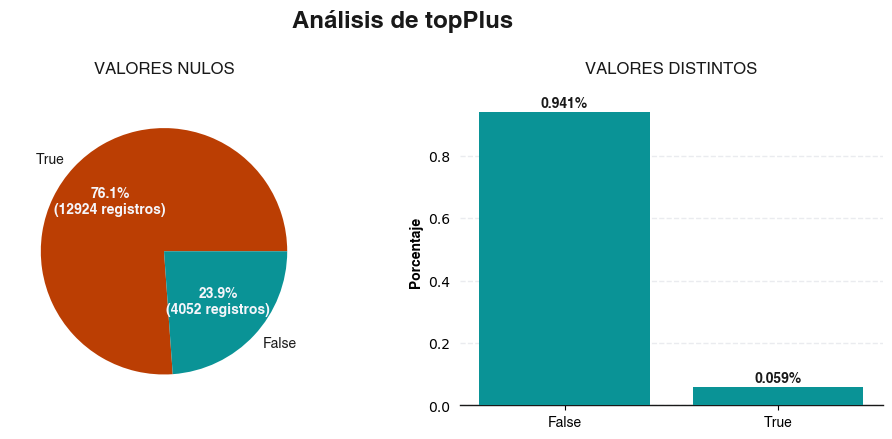

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=1, dpi=100, figsize=(12, 4))
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de topPlus",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["topPlus"].isna().value_counts()
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("Valores nulos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0].pie(x=data.values,
								  labels=data.index,
								  data=data,
								  autopct=format_autopct(data.values),
								  colors=["#BB3E03", "#0a9396"],
								  textprops=font_config)
font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["topPlus"].value_counts(normalize=True)
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("Valores distintos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1].bar(x=data.index,
				   height=data.values,
				   data=data,
				   facecolor="#0a9396",
				   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].bar_label(rects,
				 fmt="%1.3f%%",
				 color="#191919",
				 label_type="edge",
				 padding=1,
				 font_properties=font_config)

axs[1].set_ylabel(ylabel="Porcentaje", fontdict=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
axs[1].tick_params(axis="y", width=0)
axs[1].set_xticks(ticks=np.arange(len(data.index)),
				  labels=data.index,
				  fontdict=font_config)
axs[1].grid(axis="x", visible=False)
axs[1].grid(axis="y",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["bottom"].set_linewidth(1)
axs[1].spines["bottom"].set_color("#191919")
axs[1].spines[["left", "top", "right"]].set_visible(False)
plt.show()

#### groupDescription

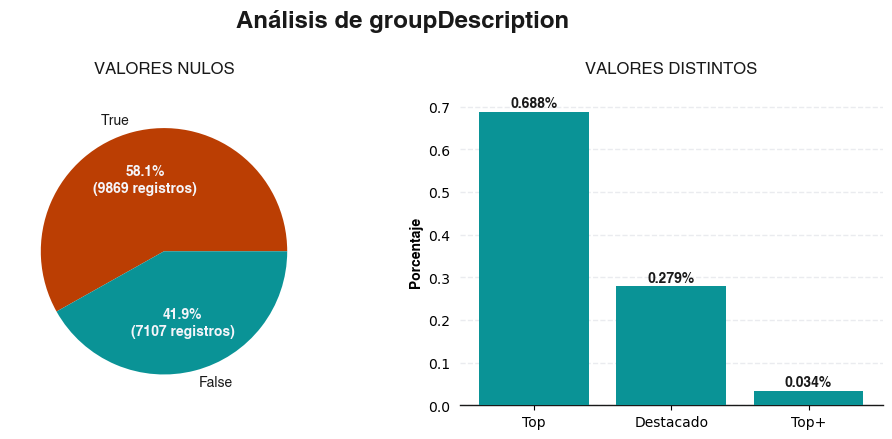

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=1, dpi=100, figsize=(12, 4))
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de groupDescription",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["groupDescription"].isna().value_counts()
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("Valores nulos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0].pie(x=data.values,
								  labels=data.index,
								  data=data,
								  autopct=format_autopct(data.values),
								  colors=["#BB3E03", "#0a9396"],
								  textprops=font_config)
font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["groupDescription"].value_counts(normalize=True)
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("Valores distintos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1].bar(x=data.index,
				   height=data.values,
				   data=data,
				   facecolor="#0a9396",
				   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].bar_label(rects,
				 fmt="%1.3f%%",
				 color="#191919",
				 label_type="edge",
				 font_properties=font_config,
				 padding=1)
axs[1].tick_params(axis="y", width=0)
axs[1].set_ylabel(ylabel="Porcentaje", fontdict=font_config)
axs[1].grid(axis="x", visible=False)
axs[1].grid(axis="y",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["bottom"].set_linewidth(1)
axs[1].spines["bottom"].set_color("#191919")
axs[1].spines[["left", "top", "right"]].set_visible(False)
plt.show()

#### hasParkingSpace, isParkingSpaceIncludedInPrice, parkingSpacePrice

In [ ]:
hasParkingSpace_is_nan = df_normalized["hasParkingSpace"].isna()
imputations = df_normalized.loc[
		hasParkingSpace_is_nan, "hasParkingSpace"].fillna(False)
df_normalized.fillna(value={ "hasParkingSpace": imputations}, inplace=True)

/tmp/ipykernel_14312/711812563.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hasParkingSpace_is_nan, "hasParkingSpace"].fillna(False)
/tmp/ipykernel_14312/711812563.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalized.fillna(value={ "hasParkingSpace": imputations}, inplace=True)


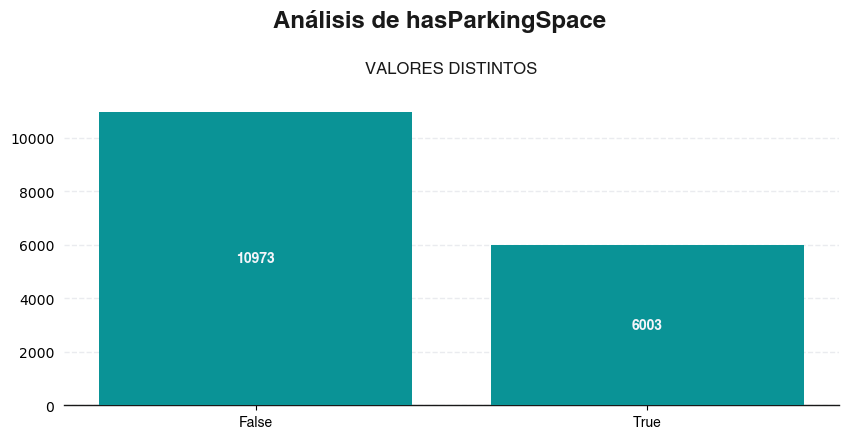

In [ ]:
fig, ax = plt.subplots(dpi=100, figsize=(10, 4))
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de hasParkingSpace",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["hasParkingSpace"].value_counts()
font_config = {
	"family": "Helvetica",
	"size": "large",
}
ax.set_title("Valores distintos".upper(),
			 color="#191919",
			 fontproperties=font_config,
			 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = ax.bar(x=data.index,
			   height=data.values,
			   data=data,
			   facecolor="#0a9396",
			   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax.bar_label(rects,
			 label_type="center",
			 color="#F5F5FA",
			 font_properties=font_config)
ax.tick_params(axis="y", width=0)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
ax.set_xticks(ticks=np.arange(len(data.index)),
			  labels=data.index,
			  fontdict=font_config)
ax.grid(axis="x", visible=False)
ax.grid(axis="y",
		alpha=0.8,
		color="#E5E7EB",
		linestyle="dashed",
		linewidth=1,
		visible=True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["bottom"].set_color("#191919")
ax.spines[["left", "top", "right"]].set_visible(False)
plt.show()

De las propiedades que poseen `hasParkingSpace`, analizamos `isParkingSpaceIncludedInPrice`, `parkingSpacePrice`

In [ ]:
columns = [
	"hasParkingSpace",
	"isParkingSpaceIncludedInPrice",
	"parkingSpacePrice"
]
has_parking = df_normalized["hasParkingSpace"] == True
data = df_normalized.loc[has_parking, columns]
data.sample(4)

,hasParkingSpace,isParkingSpaceIncludedInPrice,parkingSpacePrice
22566,True,True,NaN
5132,True,True,NaN
21107,True,False,35000.0
24004,True,True,NaN


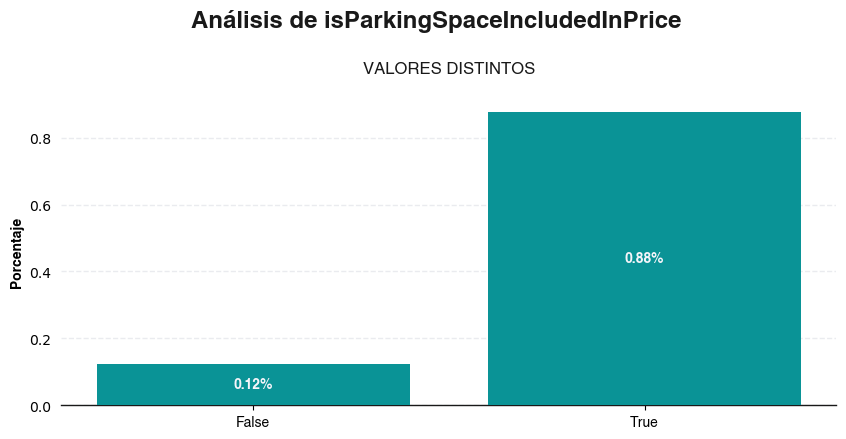

In [ ]:
fig, ax = plt.subplots(dpi=100, figsize=(10, 4))
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de isParkingSpaceIncludedInPrice",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# BAR CHART
#--------------------------------------
to_plot = data["isParkingSpaceIncludedInPrice"].value_counts(normalize=True)
font_config = {
	"family": "Helvetica",
	"size": "large",
}
ax.set_title("Valores distintos".upper(),
			 color="#191919",
			 fontproperties=font_config,
			 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = ax.bar(x=to_plot.index,
			   height=to_plot.values,
			   data=to_plot,
			   facecolor="#0a9396",
			   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax.bar_label(rects,
			 fmt="%1.2f%%",
			 label_type="center",
			 color="#F5F5FA",
			 font_properties=font_config)
ax.tick_params(axis="y", width=0)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
ax.set_xticks(ticks=range(0, (len(to_plot.index.values))),
			  labels=["False", "True"],
			  fontdict=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
ax.set_ylabel("Porcentaje", fontdict=font_config)
ax.grid(axis="x", visible=False)
ax.grid(axis="y",
		alpha=0.8,
		color="#E5E7EB",
		linestyle="dashed",
		linewidth=1,
		visible=True)
ax.spines["bottom"].set_linewidth(1)
ax.spines["bottom"].set_color("#191919")
ax.spines[["left", "top", "right"]].set_visible(False)
plt.show()

Analizamos el precio de aquellos en los que el mismo no se encuentra incluído en el precio aunque en más de un 85% sí lo poseea.

> En una transformación final sería interesante agregar el precio del estacionamiento al precio de la propiedad.

In [ ]:
has_parking_price = data["isParkingSpaceIncludedInPrice"] == False
data.loc[has_parking_price].sample(4)

,hasParkingSpace,isParkingSpaceIncludedInPrice,parkingSpacePrice
23526,True,False,20000.0
5673,True,False,30000.0
20420,True,False,45000.0
6238,True,False,20000.0


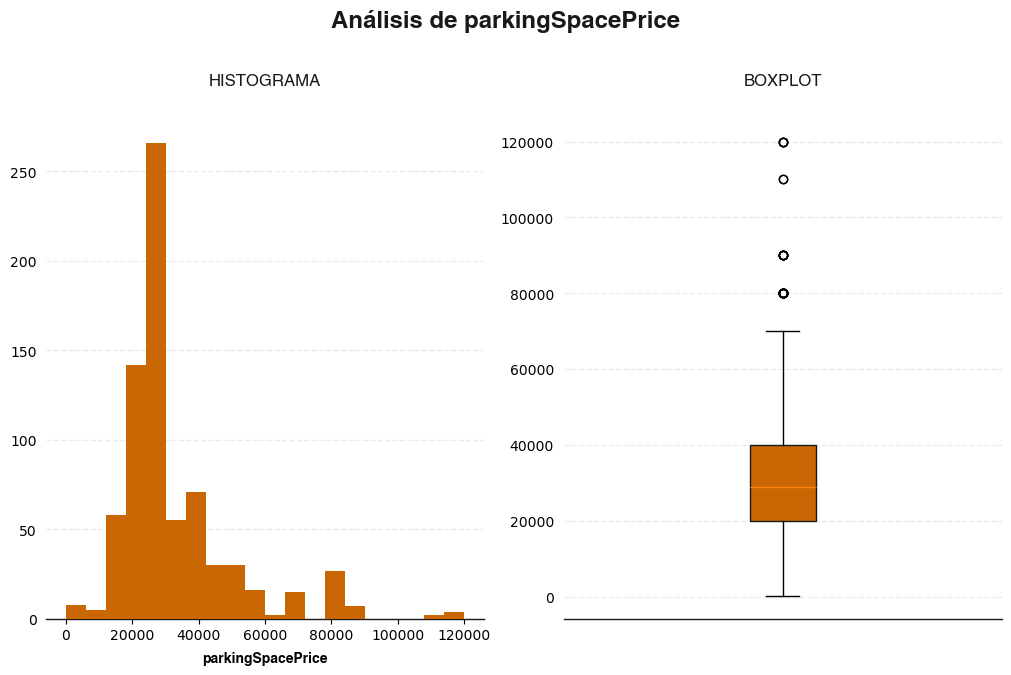

In [ ]:
fig, axs = plt.subplots(ncols=2,
						nrows=1,
						dpi=100,
						figsize=(10, 6),
						layout="constrained")
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de parkingSpacePrice",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# HIST CHART
#--------------------------------------
to_plot = data.loc[has_parking_price]
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("Histograma".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[0].hist(x="parkingSpacePrice",
			data=to_plot,
			bins=20,
			facecolor="#CA6702",
			zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[0].tick_params(axis="y", width=0)
axs[0].set_xlabel(xlabel="parkingSpacePrice",
				  labelpad=6,
				  fontdict=font_config)

axs[0].grid(axis="x", visible=False)
axs[0].grid(axis="y",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[0].spines["bottom"].set_linewidth(1)
axs[0].spines["bottom"].set_color("#191919")
axs[0].spines[["left", "top", "right"]].set_visible(False)

#--------------------------------------
# BOXPLOT CHART
#--------------------------------------
to_plot = data.loc[has_parking_price]
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("BOXPLOT".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
box_properites = {
	"facecolor": "#CA6702",
	"edgecolor": "#191919",
	"linewidth": 1
}
axs[1].boxplot(x="parkingSpacePrice",
			   data=to_plot,
			   boxprops=box_properites,
			   patch_artist=True,
			   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].tick_params(axis="y", width=0)
axs[1].set_xticks([])

axs[1].grid(axis="x", visible=False)
axs[1].grid(axis="y",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["bottom"].set_linewidth(1)
axs[1].spines["bottom"].set_color("#191919")
axs[1].spines[["left", "top", "right"]].set_visible(False)

plt.show()

#### typology y subTypology

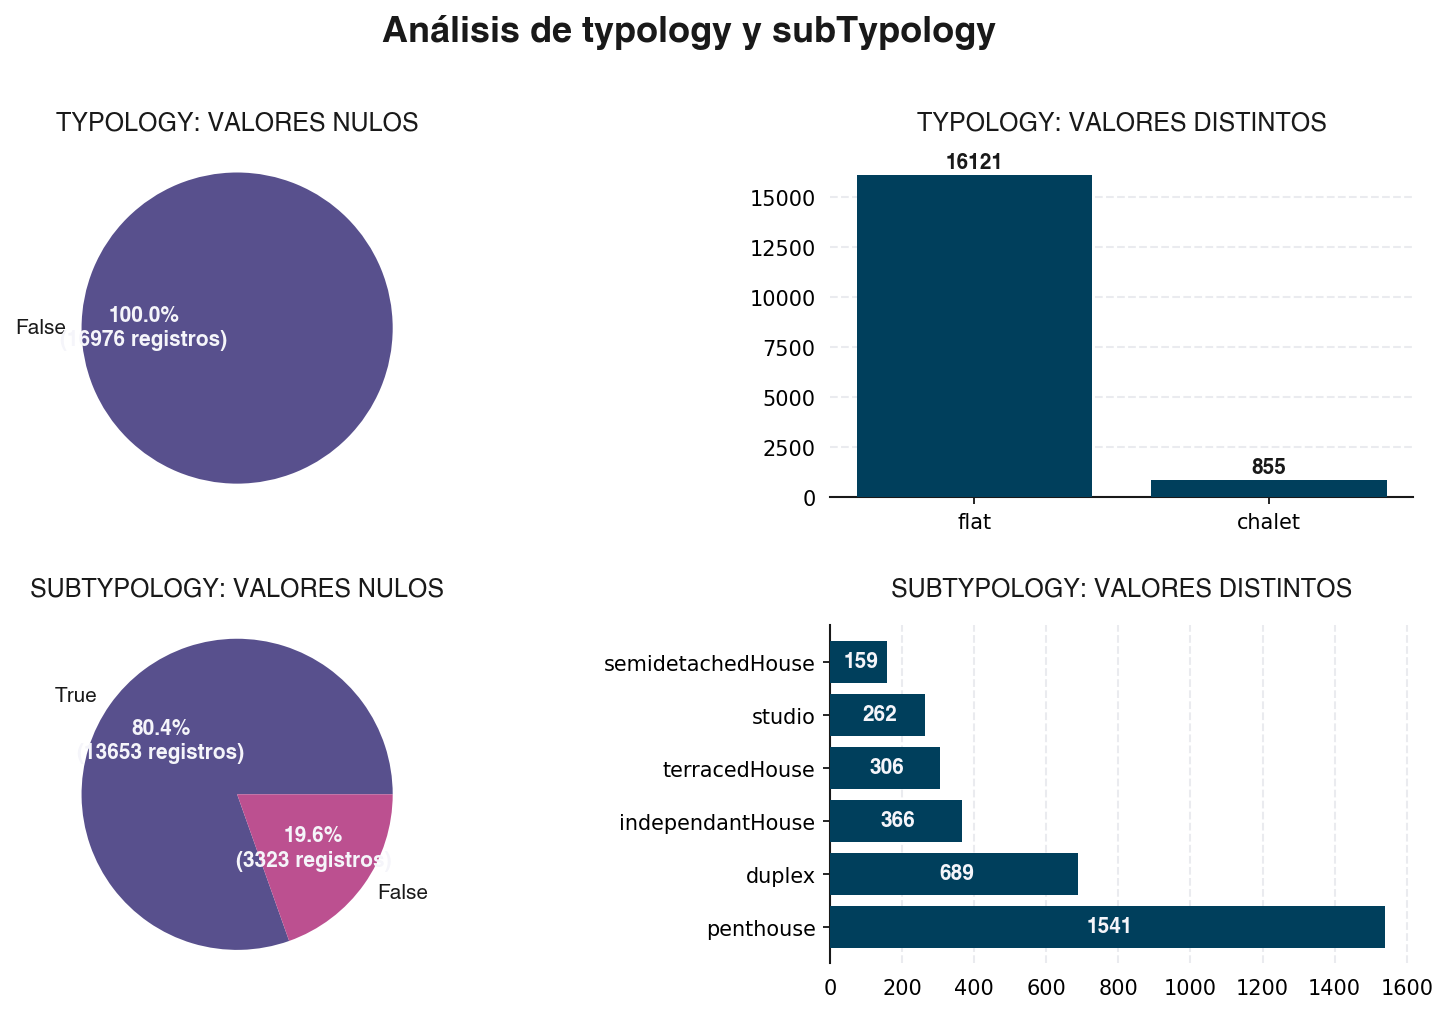

In [ ]:
fig, axs = plt.subplots(ncols=2,
						nrows=2,
						dpi=150,
						figsize=(10, 6),
						layout="constrained")
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de typology y subTypology",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.1)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["typology"].isna().value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0][0].set_title("typology: Valores nulos".upper(),
					color="#191919",
					fontproperties=font_config,
					y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0][0].pie(x=data.values,
									 labels=data.index,
									 data=data,
									 autopct=format_autopct(data.values),
									 radius=1.15,
									 colors=["#58508D", "#BC5090"],
									 textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["typology"].value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0][1].set_title("typology: Valores distintos".upper(),
					color="#191919",
					fontproperties=font_config,
					y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[0][1].bar(x=data.index,
					  height=data.values,
					  data=data,
					  facecolor="#003f5c",
					  zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[0][1].bar_label(rects,
					padding=1,
					label_type="edge",
					color="#191919",
					font_properties=font_config)

axs[0][1].tick_params(axis="y", width=0)
axs[0][1].grid(axis="x", visible=False)
axs[0][1].grid(axis="y",
			   alpha=0.8,
			   color="#E5E7EB",
			   linestyle="dashed",
			   linewidth=1,
			   visible=True)
axs[0][1].spines["bottom"].set_linewidth(1)
axs[0][1].spines["bottom"].set_color("#191919")
axs[0][1].spines[["left", "top", "right"]].set_visible(False)


#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["subTypology"].isna().value_counts()
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1][0].set_title("subTypology: Valores nulos".upper(),
					color="#191919",
					fontproperties=font_config,
					y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[1][0].pie(x=data.values,
									 labels=data.index,
									 data=data,
									 autopct=format_autopct(data.values),
									 radius=1.15,
									 colors=["#58508D", "#BC5090"],
									 textprops=font_config)
font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["subTypology"].value_counts()
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1][1].set_title("subTypology: Valores distintos".upper(),
					color="#191919",
					fontproperties=font_config,
					y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1][1].barh(y=data.index,
					   width=data.values,
					   data=data,
					   facecolor="#003f5c",
					   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1][1].bar_label(rects,
					padding=1,
					label_type="center",
					color="#F5F5FA",
					font_properties=font_config)
axs[1][1].set_yticks(ticks=data.index.to_numpy(),
					 labels=data.index.to_numpy())

axs[1][1].tick_params(axis="x", width=0)
axs[1][1].grid(axis="y", visible=False)
axs[1][1].grid(axis="x",
			   alpha=0.8,
			   color="#E5E7EB",
			   linestyle="dashed",
			   linewidth=1,
			   visible=True)
axs[1][1].spines["left"].set_linewidth(1)
axs[1][1].spines["left"].set_color("#191919")
axs[1][1].spines[["bottom", "top", "right"]].set_visible(False)

fig.get_layout_engine().set(hspace=0.1, wspace=0.1)
plt.show()

#### title y subtitle

In [ ]:
df_normalized["title"].value_counts()

title
Piso                                       3698
Ático                                       466
Dúplex                                      219
Chalet adosado                              187
Casa independiente                          186
                                           ... 
Piso en Calle pajaritos                       1
Piso en Calle de Serrano Galvache, 32         1
Piso en Calle de José Rodríguez Pinilla       1
Piso en Bolivia                               1
Piso en Camino de Ganapanes                   1
Name: count, Length: 2181, dtype: int64

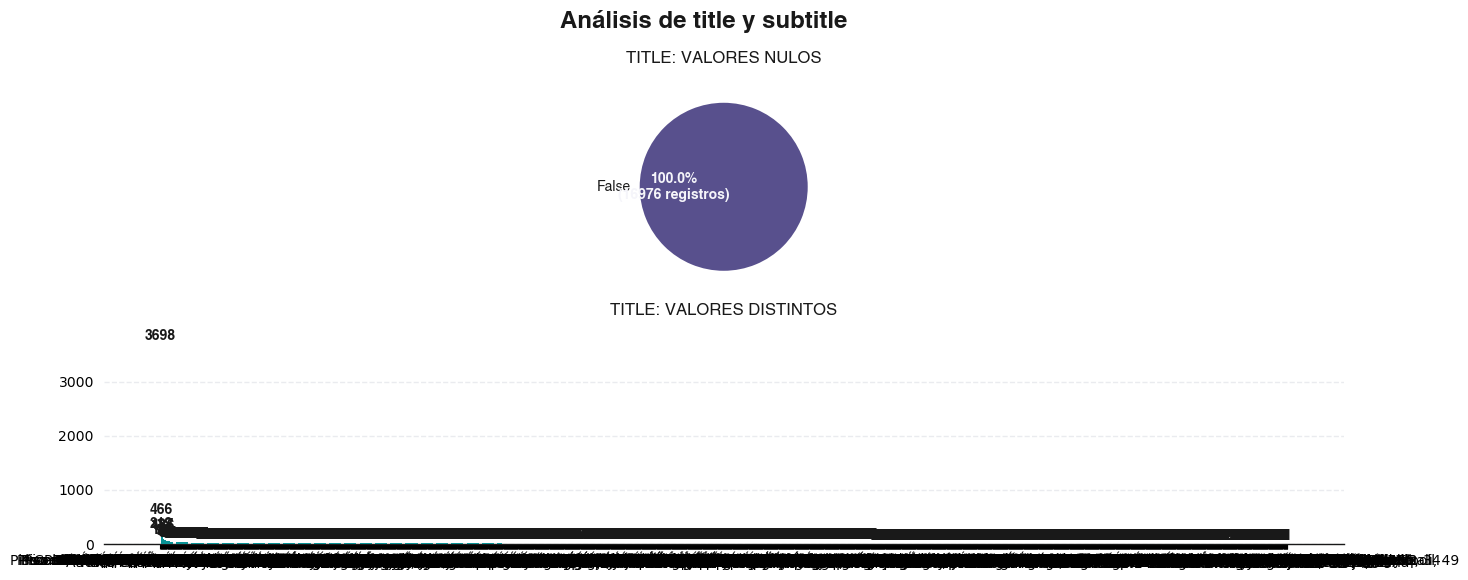

In [ ]:
fig, axs = plt.subplots(ncols=1,
						nrows=2,
						figsize=(16, 6))
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de title y subtitle",
			 color="#191919",
			 fontproperties=font_config,
			 y=1)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["title"].isna().value_counts()
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("title: Valores nulos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0].pie(x=data.values,
								  labels=data.index,
								  data=data,
								  autopct=format_autopct(data.values),
								  colors=["#58508D", "#BC5090"],
								  textprops=font_config)
font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["title"].value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("title: Valores distintos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1].bar(x=data.index,
				   height=data.values,
				   data=data,
				   facecolor="#0a9396",
				   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].bar_label(rects,
				 padding=1,
				 label_type="edge",
				 color="#191919",
				 font_properties=font_config)
axs[1].tick_params(axis="y", width=0)
axs[1].grid(axis="x", visible=False)
axs[1].grid(axis="y",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["bottom"].set_linewidth(1)
axs[1].spines["bottom"].set_color("#191919")
axs[1].spines[["left", "top", "right"]].set_visible(False)

plt.show()

Creamos una función para extraer parte del texto que no es relevante ya que analizamos propiedades de Madrid.

In [ ]:
df_normalized["subtitle"].sample(5)

633        El Viso, Madrid
13632    Trafalgar, Madrid
3129     Jerónimos, Madrid
1076          Goya, Madrid
16720    San Diego, Madrid
Name: subtitle, dtype: object

In [ ]:
import re

def text_formatter(text):
	format = r"([^,]+)"

	groups = re.match(format, text)
	return groups.group(1).strip()

In [ ]:
data = df_normalized["subtitle"].map(text_formatter)
data.sample(5)

6608     Nuevos Ministerios-Ríos Rosas
25144                       Peñagrande
26611                         Arapiles
24620                       Castellana
2529                           Palacio
Name: subtitle, dtype: object

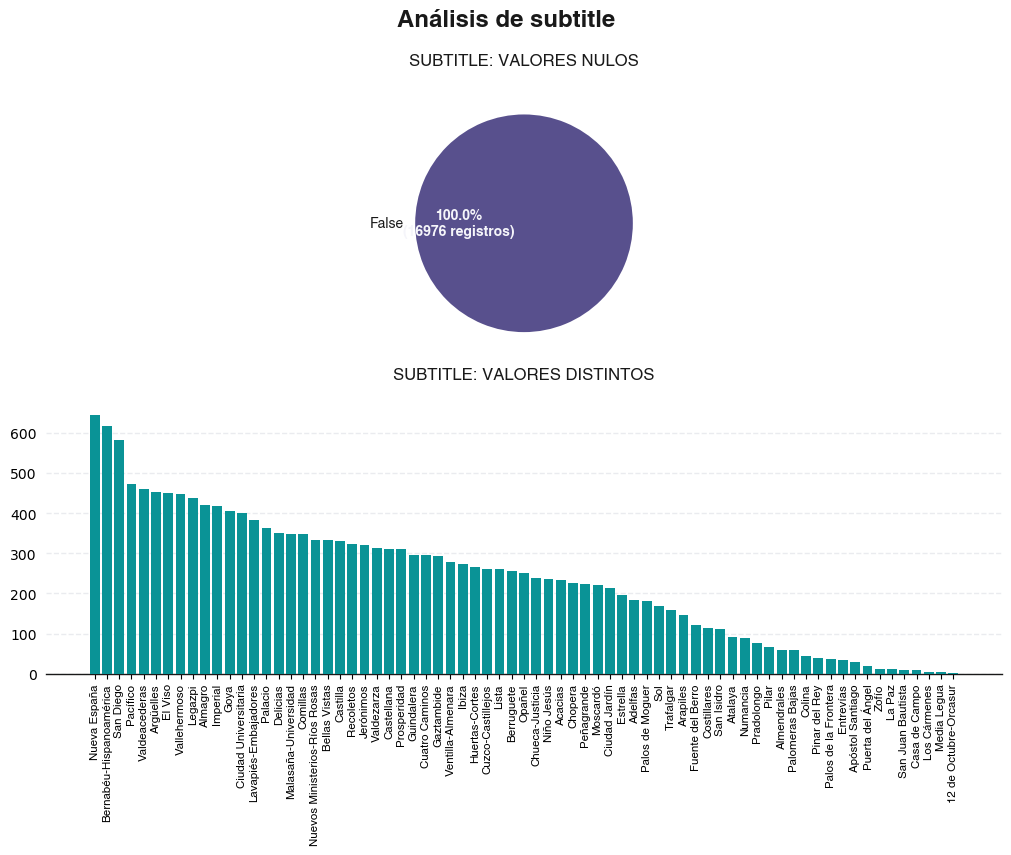

In [ ]:
fig, axs = plt.subplots(ncols=1,
						nrows=2,
						figsize=(10, 8),
						layout="constrained")
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de subtitle",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.05)

#--------------------------------------
# PIE CHART
#--------------------------------------
to_plot = df_normalized["subtitle"].isna().value_counts()
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("subtitle: Valores nulos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0].pie(x=to_plot.values,
								  labels=to_plot.index,
								  data=to_plot,
								  autopct=format_autopct(to_plot.values),
								  colors=["#58508D", "#BC5090"],
								  textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
to_plot = data.value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("subtitle: Valores distintos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1].bar(x=to_plot.index,
				   height=to_plot.values,
				   data=to_plot,
				   facecolor="#0a9396",
				   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "small",
}
axs[1].grid(axis="x", visible=False)
axs[1].grid(axis="y",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)

axs[1].tick_params(axis="y", width=0)
axs[1].set_xticks(ticks=to_plot.index,
				  labels=to_plot.index,
				  fontdict=font_config,
				  rotation=90)
axs[1].spines["bottom"].set_linewidth(1)
axs[1].spines["bottom"].set_color("#191919")
axs[1].spines[["left", "top", "right"]].set_visible(False)

plt.show()

#### newDevelopmentFinished y newDevelopment.1

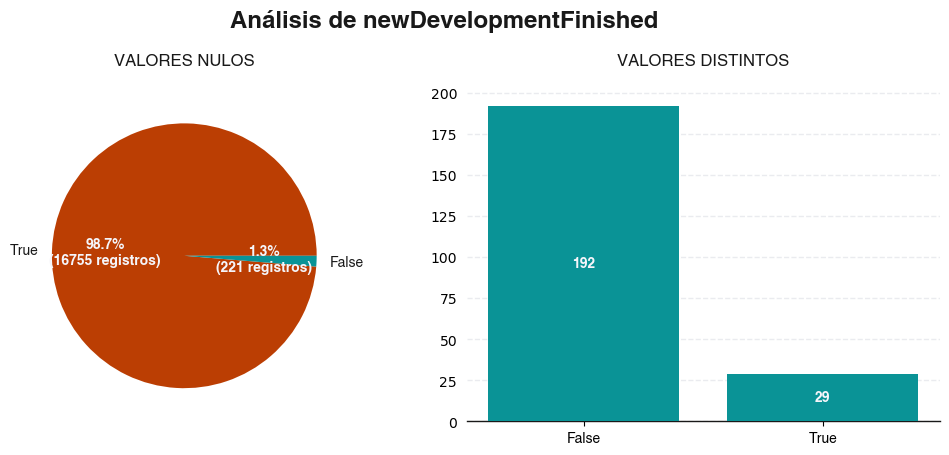

In [ ]:
fig, axs = plt.subplots(ncols=2,
						nrows=1,
						dpi=100,
						figsize=(10, 4),
						layout="constrained")
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de newDevelopmentFinished",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["newDevelopmentFinished"].isna().value_counts()
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("Valores nulos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0].pie(x=data.values,
								  labels=data.index,
								  data=data,
								  autopct=format_autopct(data.values),
								  colors=["#BB3E03", "#0a9396"],
								  textprops=font_config)
font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["newDevelopmentFinished"].value_counts()
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("Valores distintos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1].bar(x=data.index,
				   height=data.values,
				   data=data,
				   facecolor="#0a9396",
				   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].bar_label(rects,
				 label_type="center",
				 color="#F5F5FA",
				 font_properties=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[1].set_xticks(ticks=range(0, len(data.index)),
				  labels=data.index.values,
				  fontdict=font_config)

axs[1].tick_params(axis="y", width=0)
axs[1].grid(axis="x", visible=False)
axs[1].grid(axis="y",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["bottom"].set_linewidth(1)
axs[1].spines["bottom"].set_color("#191919")
axs[1].spines[["left", "top", "right"]].set_visible(False)
plt.show()

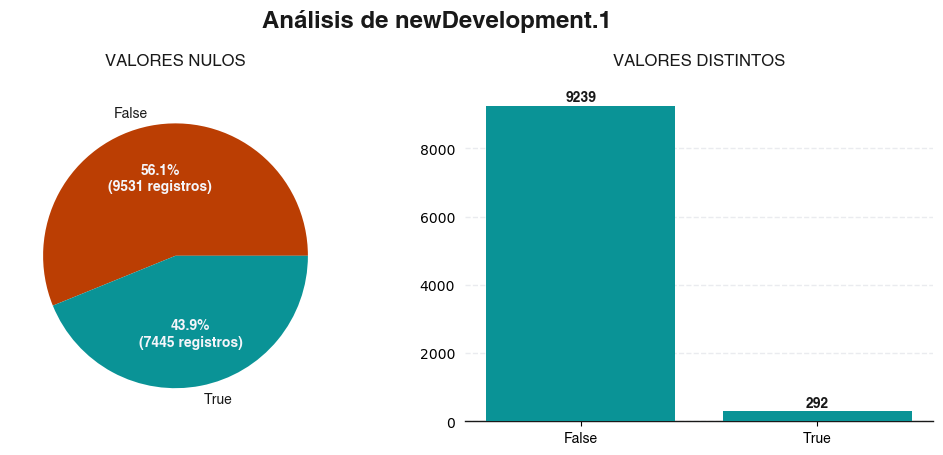

In [ ]:
fig, axs = plt.subplots(ncols=2,
						nrows=1,
						dpi=100,
						figsize=(10, 4),
						layout="constrained")
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de newDevelopment.1",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["newDevelopment.1"].isna().value_counts()
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("Valores nulos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0].pie(x=data.values,
								  labels=data.index,
								  data=data,
								  autopct=format_autopct(data.values),
								  colors=["#BB3E03", "#0a9396"],
								  textprops=font_config)
font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["newDevelopment.1"].value_counts()
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("Valores distintos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)
font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1].bar(x=data.index,
				   height=data.values,
				   data=data,
				   facecolor="#0a9396",
				   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].bar_label(rects,
				 padding=1,
				 label_type="edge",
				 color="#191919",
				 font_properties=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[1].set_xticks(ticks=range(0, len(data.index)),
				  labels=data.index.values,
				  fontdict=font_config)

axs[1].tick_params(axis="y", width=0)
axs[1].grid(axis="x", visible=False)
axs[1].grid(axis="y",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["bottom"].set_linewidth(1)
axs[1].spines["bottom"].set_color("#191919")
axs[1].spines[["left", "top", "right"]].set_visible(False)
plt.show()

#### superTopHighlight

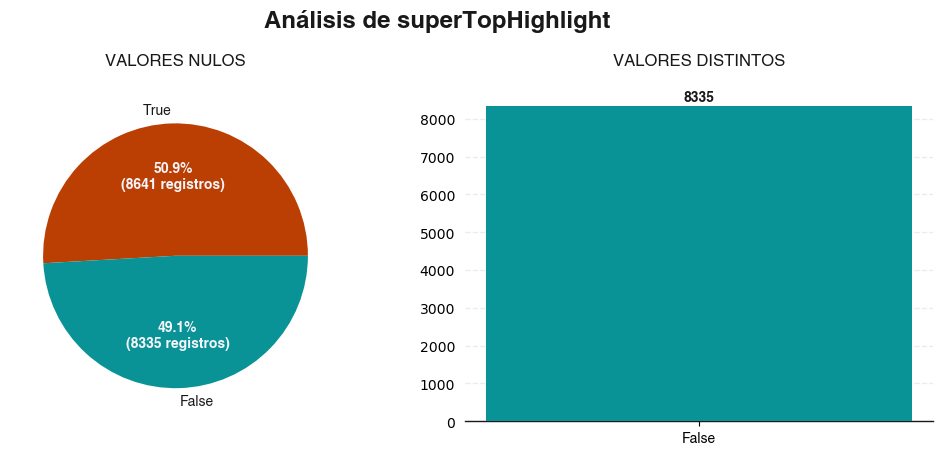

In [ ]:
fig, axs = plt.subplots(ncols=2,
						nrows=1,
						dpi=100,
						figsize=(10, 4),
						layout="constrained")
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de superTopHighlight",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["superTopHighlight"].isna().value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("Valores nulos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0].pie(x=data.values,
								  labels=data.index,
								  data=data,
								  autopct=format_autopct(data.values),
								  colors=["#BB3E03", "#0a9396"],
								  textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["superTopHighlight"].value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("Valores distintos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1].bar(x=data.index,
				   height=data.values,
				   data=data,
				   facecolor="#0a9396",
				   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].bar_label(rects,
				 padding=1,
				 label_type="edge",
				 color="#191919",
				 font_properties=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[1].set_xticks(ticks=range(0, len(data.index)),
				  labels=data.index.values,
				  fontdict=font_config)

axs[1].tick_params(axis="y", width=0)
axs[1].grid(axis="x", visible=False)
axs[1].grid(axis="y",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["bottom"].set_linewidth(1)
axs[1].spines["bottom"].set_color("#191919")
axs[1].spines[["left", "top", "right"]].set_visible(False)
plt.show()

#### SubdType

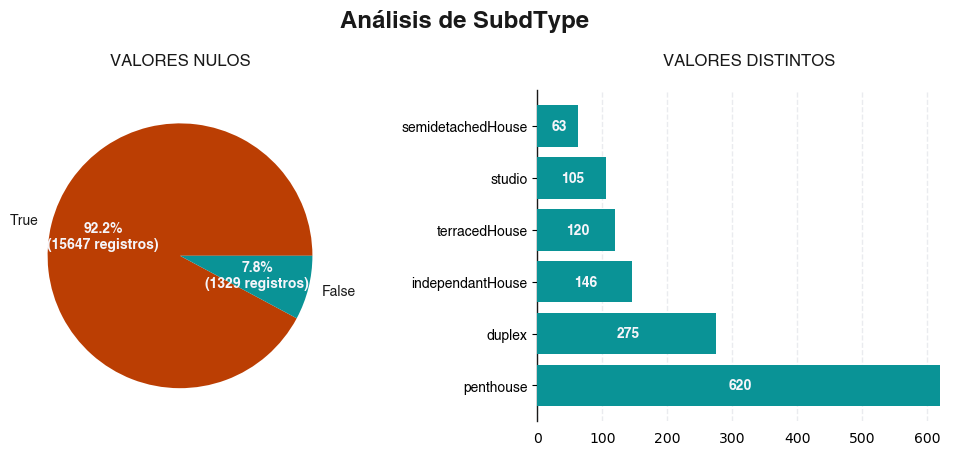

In [ ]:
fig, axs = plt.subplots(ncols=2,
						nrows=1,
						dpi=100,
						figsize=(10, 4),
						layout="constrained")

font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de SubdType",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["SubdType"].isna().value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("Valores nulos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0].pie(x=data.values,
								  labels=data.index,
								  data=data,
								  autopct=format_autopct(data.values),
								  colors=["#BB3E03", "#0a9396"],
								  textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["SubdType"].value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("Valores distintos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1].barh(y=data.index,
					width=data.values,
					data=data,
					facecolor="#0a9396",
					zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].bar_label(rects,
				 color="#F5F5FA",
				 label_type="center",
				 padding=1,
				 font_properties=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[1].set_yticks(ticks=range(0, len(data.index)),
				  labels=data.index.values,
				  fontdict=font_config)

axs[1].tick_params(axis="x", width=0)
axs[1].grid(axis="y", visible=False)
axs[1].grid(axis="x",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["left"].set_linewidth(1)
axs[1].spines["left"].set_color("#191919")
axs[1].spines[["bottom", "top", "right"]].set_visible(False)

plt.show()

#### name_0, text_0, name_1, text_1

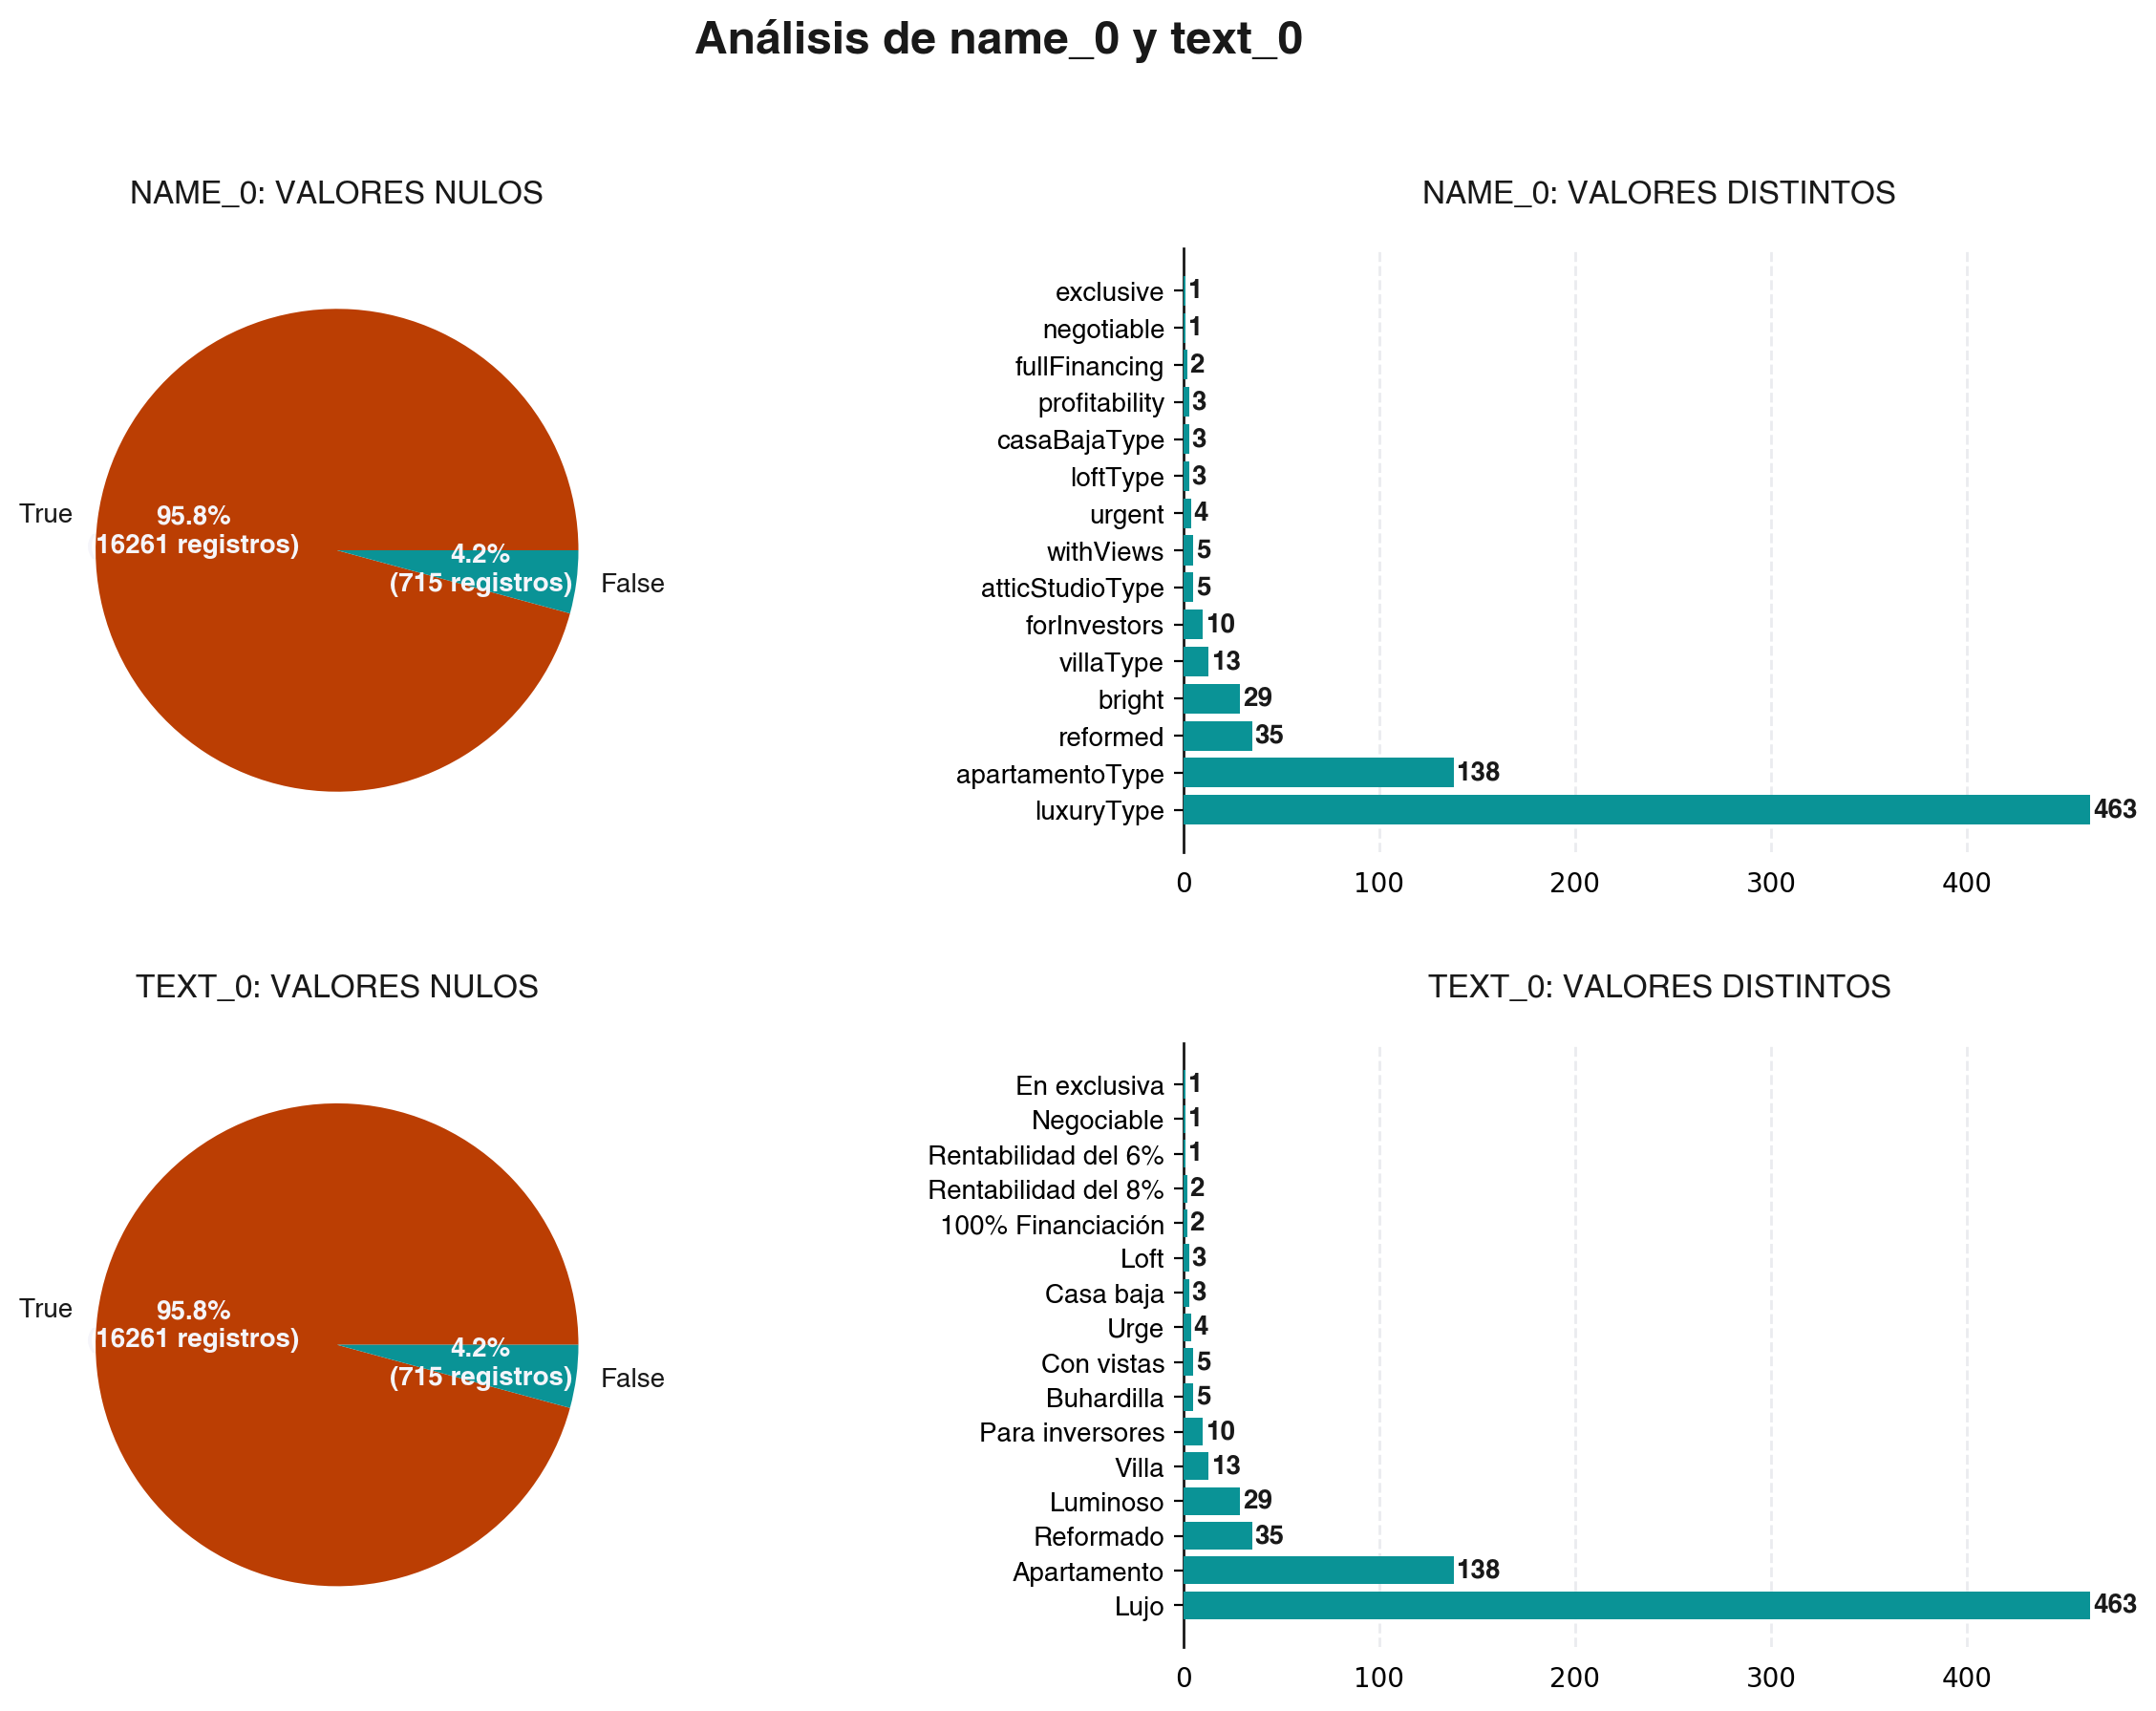

In [ ]:
fig, axs = plt.subplots(ncols=2,
						nrows=2,
						dpi=200,
						figsize=(12, 8),
						layout="constrained")
fig.get_layout_engine().set(hspace=0.1, wspace=0.1)

font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de name_0 y text_0",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["name_0"].isna().value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0][0].set_title("name_0: Valores nulos".upper(),
					color="#191919",
					fontproperties=font_config,
					y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0][0].pie(x=data.values,
									 labels=data.index,
									 data=data,
									 autopct=format_autopct(data.values),
									 colors=["#BB3E03", "#0a9396"],
									 textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["name_0"].value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0][1].set_title("name_0: Valores distintos".upper(),
					color="#191919",
					fontproperties=font_config,
					y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[0][1].barh(y=data.index,
					   width=data.values,
					   data=data,
					   facecolor="#0a9396",
					   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[0][1].bar_label(rects,
					color="#191919",
					label_type="edge",
					padding=1,
					font_properties=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[0][1].set_yticks(ticks=range(0, len(data.index)),
					 labels=data.index.values,
					 fontdict=font_config)

axs[0][1].tick_params(axis="x", width=0)
axs[0][1].grid(axis="y", visible=False)
axs[0][1].grid(axis="x",
			   alpha=0.8,
			   color="#E5E7EB",
			   linestyle="dashed",
			   linewidth=1,
			   visible=True)
axs[0][1].spines["left"].set_linewidth(1)
axs[0][1].spines["left"].set_color("#191919")
axs[0][1].spines[["bottom", "top", "right"]].set_visible(False)




#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["text_0"].isna().value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1][0].set_title("text_0: Valores nulos".upper(),
					color="#191919",
					fontproperties=font_config,
					y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[1][0].pie(x=data.values,
									 labels=data.index,
									 data=data,
									 autopct=format_autopct(data.values),
									 colors=["#BB3E03", "#0a9396"],
									 textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["text_0"].value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1][1].set_title("text_0: Valores distintos".upper(),
					color="#191919",
					fontproperties=font_config,
					y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1][1].barh(y=data.index,
					   width=data.values,
					   data=data,
					   facecolor="#0a9396",
					   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1][1].bar_label(rects,
					color="#191919",
					label_type="edge",
					padding=1,
					font_properties=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[1][1].set_yticks(ticks=range(0, len(data.index)),
					 labels=data.index.values,
					 fontdict=font_config)

axs[1][1].tick_params(axis="x", width=0)
axs[1][1].grid(axis="y", visible=False)
axs[1][1].grid(axis="x",
			   alpha=0.8,
			   color="#E5E7EB",
			   linestyle="dashed",
			   linewidth=1,
			   visible=True)
axs[1][1].spines["left"].set_linewidth(1)
axs[1][1].spines["left"].set_color("#191919")
axs[1][1].spines[["bottom", "top", "right"]].set_visible(False)

plt.show()

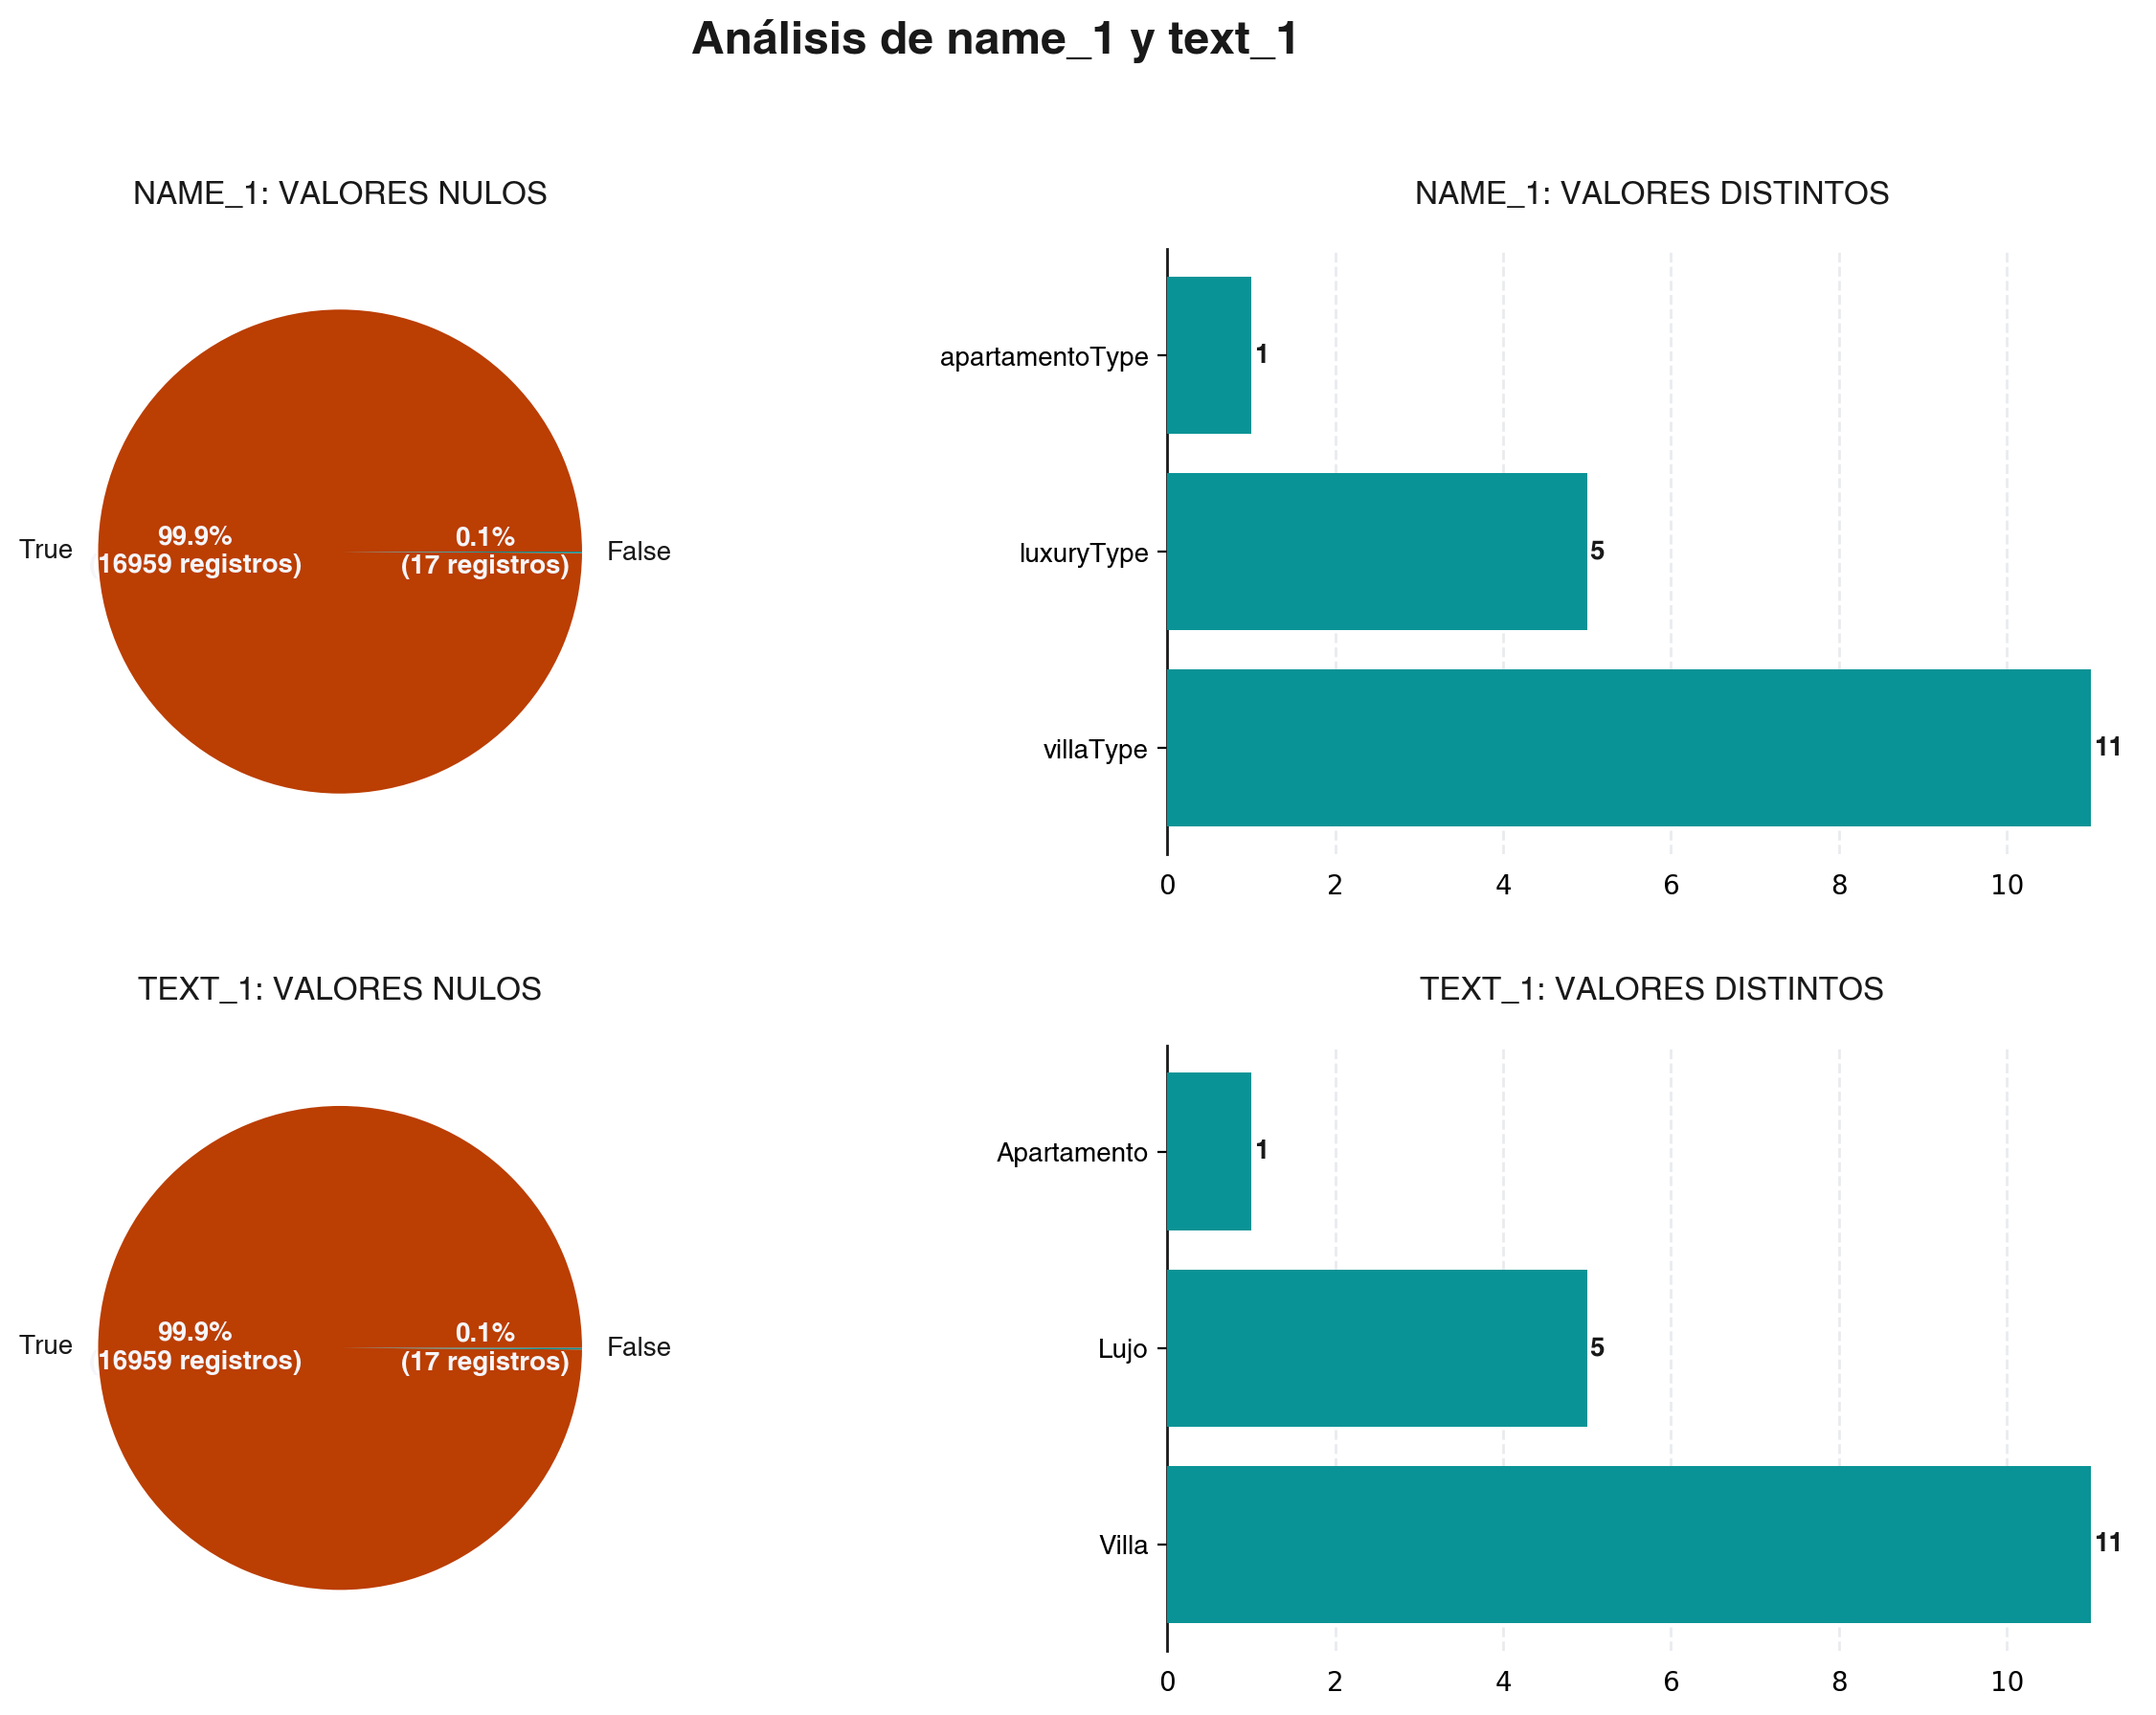

In [ ]:
fig, axs = plt.subplots(ncols=2,
						nrows=2,
						dpi=200,
						figsize=(12, 8),
						layout="constrained")
fig.get_layout_engine().set(hspace=0.1, wspace=0.1)

font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de name_1 y text_1",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["name_1"].isna().value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0][0].set_title("name_1: Valores nulos".upper(),
					color="#191919",
					fontproperties=font_config,
					y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0][0].pie(x=data.values,
									 labels=data.index,
									 data=data,
									 autopct=format_autopct(data.values),
									 colors=["#BB3E03", "#0a9396"],
									 textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["name_1"].value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0][1].set_title("name_1: Valores distintos".upper(),
					color="#191919",
					fontproperties=font_config,
					y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[0][1].barh(y=data.index,
					   width=data.values,
					   data=data,
					   facecolor="#0a9396",
					   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[0][1].bar_label(rects,
					color="#191919",
					label_type="edge",
					padding=1,
					font_properties=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[0][1].set_yticks(ticks=range(0, len(data.index)),
					 labels=data.index.values,
					 fontdict=font_config)

axs[0][1].tick_params(axis="x", width=0)
axs[0][1].grid(axis="y", visible=False)
axs[0][1].grid(axis="x",
			   alpha=0.8,
			   color="#E5E7EB",
			   linestyle="dashed",
			   linewidth=1,
			   visible=True)
axs[0][1].spines["left"].set_linewidth(1)
axs[0][1].spines["left"].set_color("#191919")
axs[0][1].spines[["bottom", "top", "right"]].set_visible(False)




#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["text_1"].isna().value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1][0].set_title("text_1: Valores nulos".upper(),
					color="#191919",
					fontproperties=font_config,
					y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[1][0].pie(x=data.values,
									 labels=data.index,
									 data=data,
									 autopct=format_autopct(data.values),
									 colors=["#BB3E03", "#0a9396"],
									 textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["text_1"].value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1][1].set_title("text_1: Valores distintos".upper(),
					color="#191919",
					fontproperties=font_config,
					y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1][1].barh(y=data.index,
					   width=data.values,
					   data=data,
					   facecolor="#0a9396",
					   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1][1].bar_label(rects,
					color="#191919",
					label_type="edge",
					padding=1,
					font_properties=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[1][1].set_yticks(ticks=range(0, len(data.index)),
					 labels=data.index.values,
					 fontdict=font_config)

axs[1][1].tick_params(axis="x", width=0)
axs[1][1].grid(axis="y", visible=False)
axs[1][1].grid(axis="x",
			   alpha=0.8,
			   color="#E5E7EB",
			   linestyle="dashed",
			   linewidth=1,
			   visible=True)
axs[1][1].spines["left"].set_linewidth(1)
axs[1][1].spines["left"].set_color("#191919")
axs[1][1].spines[["bottom", "top", "right"]].set_visible(False)

plt.show()

#### ex

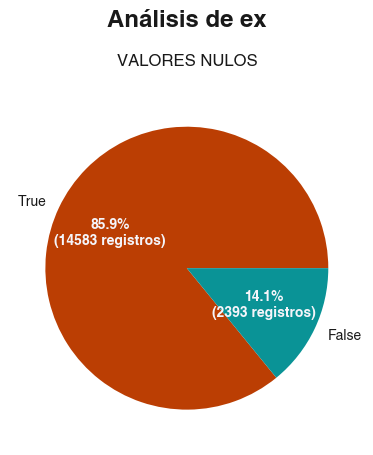

In [ ]:
fig, axs = plt.subplots(dpi=100,
						figsize=(10, 4),
						layout="constrained")

font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de ex",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["ex"].isna().value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs.set_title("Valores nulos".upper(),
			  color="#191919",
			  fontproperties=font_config,
			  y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs.pie(x=data.values,
							   labels=data.index,
							   data=data,
							   autopct=format_autopct(data.values),
							   colors=["#BB3E03", "#0a9396"],
							   textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)

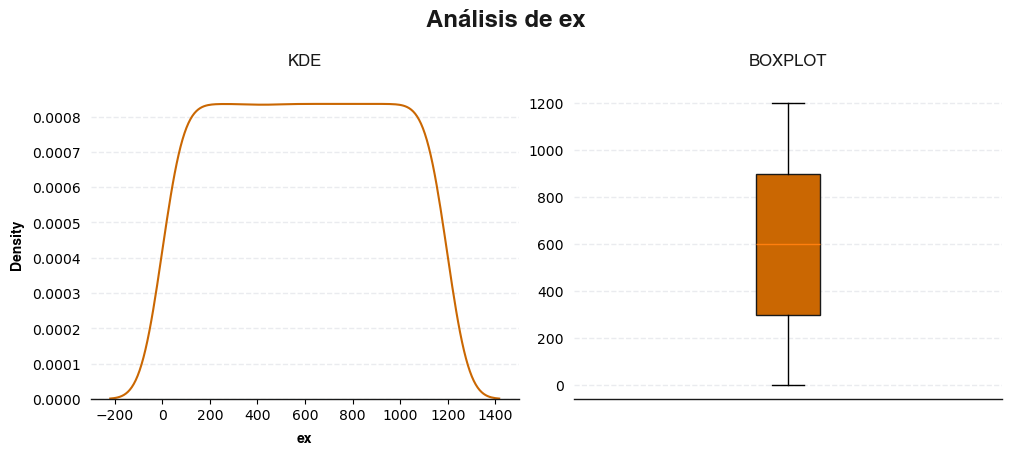

In [ ]:
fig, axs = plt.subplots(ncols=2,
						nrows=1,
						dpi=100,
						figsize=(10, 4),
						layout="constrained")
font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de ex",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# HIST CHART
#--------------------------------------
is_nan = df_normalized["ex"].isna()
to_plot = df_normalized.loc[~is_nan]
to_plot["ex"].astype(float, copy=False)

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("KDE".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}

sns.kdeplot(x="ex",
			data=to_plot,
			color="#CA6702",
			ax=axs[0])


font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[0].tick_params(axis="y", width=0)
axs[0].set_xlabel(xlabel="ex",
				  labelpad=6,
				  fontdict=font_config)
axs[0].set_ylabel(ylabel="Density",
				  labelpad=6,
				  fontdict=font_config)

axs[0].grid(axis="x", visible=False)
axs[0].grid(axis="y",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[0].spines["bottom"].set_linewidth(1)
axs[0].spines["bottom"].set_color("#191919")
axs[0].spines[["left", "top", "right"]].set_visible(False)


#--------------------------------------
# BOXPLOT CHART
#--------------------------------------
to_plot = df_normalized.loc[~is_nan, "ex"]
font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("BOXPLOT".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
box_properites = {
	"facecolor": "#CA6702",
	"edgecolor": "#191919",
	"linewidth": 1
}
axs[1].boxplot(x=to_plot.values,
			   data=to_plot,
			   boxprops=box_properites,
			   patch_artist=True,
			   zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].tick_params(axis="y", width=0)
axs[1].set_xticks([])

axs[1].grid(axis="x", visible=False)
axs[1].grid(axis="y",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["bottom"].set_linewidth(1)
axs[1].spines["bottom"].set_color("#191919")
axs[1].spines[["left", "top", "right"]].set_visible(False)

plt.show()

#### hasPlan

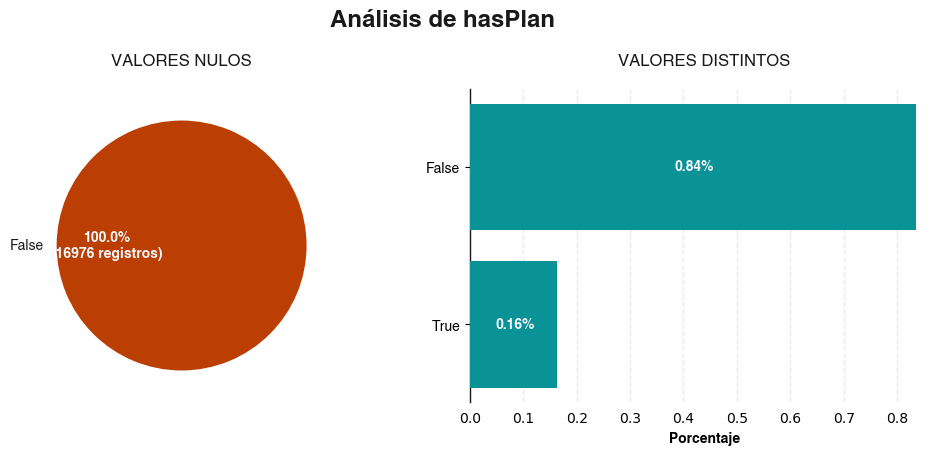

In [ ]:
fig, axs = plt.subplots(ncols=2,
						nrows=1,
						dpi=100,
						figsize=(10, 4),
						layout="constrained")

font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de hasPlan",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["hasPlan"].isna().value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("Valores nulos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0].pie(x=data.values,
								  labels=data.index,
								  data=data,
								  autopct=format_autopct(data.values),
								  colors=["#BB3E03", "#0a9396"],
								  textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["hasPlan"].value_counts(normalize=True)

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("Valores distintos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1].barh(y=data.index,
					width=data.values,
					data=data,
					facecolor="#0a9396",
					zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].bar_label(rects,
				 color="#F5F5FA",
				 label_type="center",
				 padding=1,
				 fmt="%1.2f%%",
				 font_properties=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[1].set_yticks(ticks=range(0, len(data.index)),
				  labels=data.index.values,
				  fontdict=font_config)

axs[1].tick_params(axis="x", width=0)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].set_xlabel(xlabel="Porcentaje", fontdict=font_config)

axs[1].grid(axis="y", visible=False)
axs[1].grid(axis="x",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["left"].set_linewidth(1)
axs[1].spines["left"].set_color("#191919")
axs[1].spines[["bottom", "top", "right"]].set_visible(False)

plt.show()

#### has3DTour

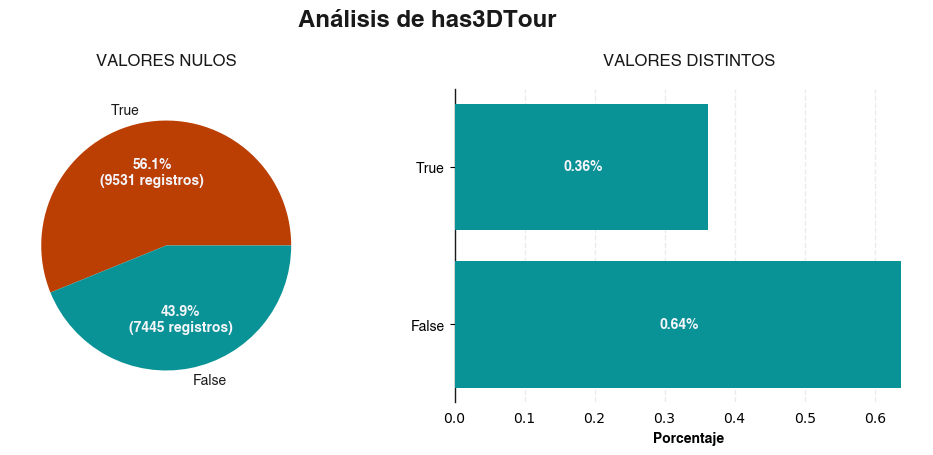

In [ ]:
fig, axs = plt.subplots(ncols=2,
						nrows=1,
						dpi=100,
						figsize=(10, 4),
						layout="constrained")

font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de has3DTour",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["has3DTour"].isna().value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("Valores nulos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0].pie(x=data.values,
								  labels=data.index,
								  data=data,
								  autopct=format_autopct(data.values),
								  colors=["#BB3E03", "#0a9396"],
								  textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["has3DTour"].value_counts(normalize=True)

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("Valores distintos".upper(),
				 color="#191919",font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1].barh(y=data.index,
					width=data.values,
					data=data,
					facecolor="#0a9396",
					zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].bar_label(rects,
				 color="#F5F5FA",
				 label_type="center",
				 padding=1,
				 fmt="%1.2f%%",
				 font_properties=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[1].set_yticks(ticks=range(0, len(data.index)),
				  labels=data.index.values,
				  fontdict=font_config)

axs[1].tick_params(axis="x", width=0)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].set_xlabel(xlabel="Porcentaje", fontdict=font_config)

axs[1].grid(axis="y", visible=False)
axs[1].grid(axis="x",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["left"].set_linewidth(1)
axs[1].spines["left"].set_color("#191919")
axs[1].spines[["bottom", "top", "right"]].set_visible(False)

plt.show()

#### has360

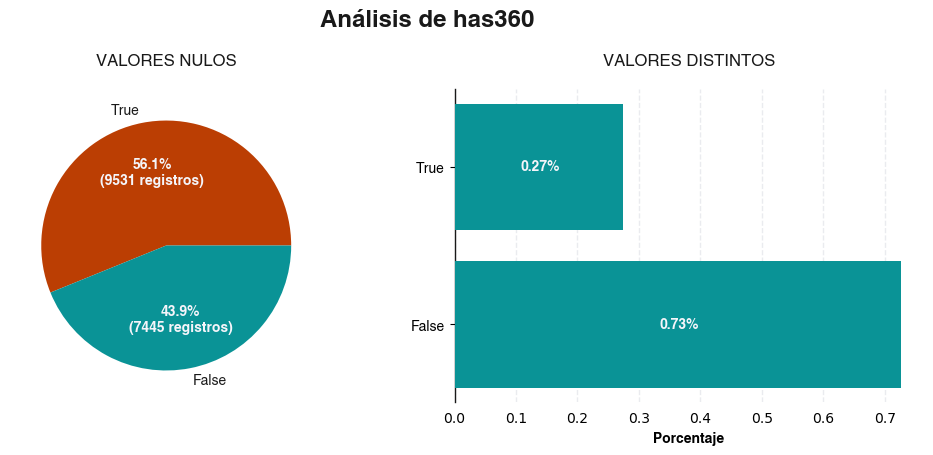

In [ ]:
fig, axs = plt.subplots(ncols=2,
						nrows=1,
						dpi=100,
						figsize=(10, 4),
						layout="constrained")

font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de has360",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["has360"].isna().value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("Valores nulos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0].pie(x=data.values,
								  labels=data.index,
								  data=data,
								  autopct=format_autopct(data.values),
								  colors=["#BB3E03", "#0a9396"],
								  textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["has360"].value_counts(normalize=True)

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("Valores distintos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1].barh(y=data.index,
					width=data.values,
					data=data,
					facecolor="#0a9396",
					zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].bar_label(rects,
				 color="#F5F5FA",
				 label_type="center",
				 padding=1,
				 fmt="%1.2f%%",
				 font_properties=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[1].set_yticks(ticks=range(0, len(data.index)),
				  labels=data.index.values,
				  fontdict=font_config)

axs[1].tick_params(axis="x", width=0)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].set_xlabel(xlabel="Porcentaje", fontdict=font_config)

axs[1].grid(axis="y", visible=False)
axs[1].grid(axis="x",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["left"].set_linewidth(1)
axs[1].spines["left"].set_color("#191919")
axs[1].spines[["bottom", "top", "right"]].set_visible(False)

plt.show()

#### hasStaging

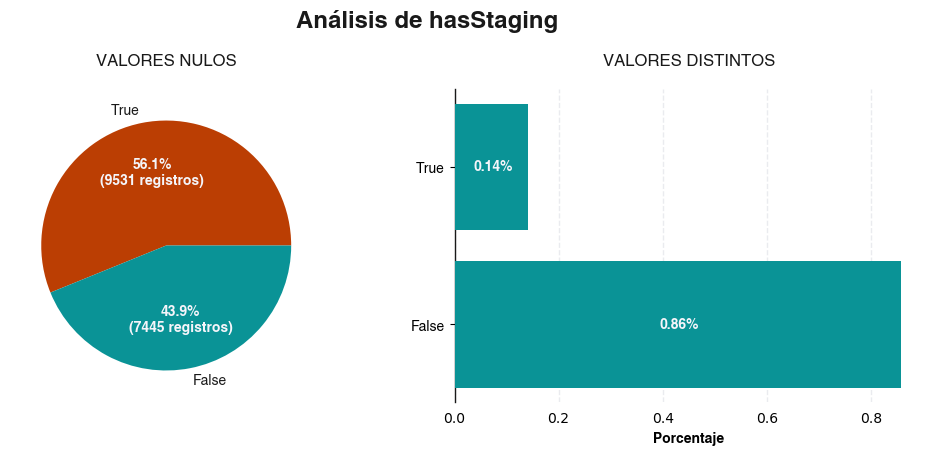

In [ ]:
fig, axs = plt.subplots(ncols=2,
						nrows=1,
						dpi=100,
						figsize=(10, 4),
						layout="constrained")

font_config = {
	"family": "Helvetica",
	"size": "xx-large",
	"weight": "bold"
}
fig.suptitle("Análisis de hasStaging",
			 color="#191919",
			 fontproperties=font_config,
			 y=1.10)

#--------------------------------------
# PIE CHART
#--------------------------------------
data = df_normalized["hasStaging"].isna().value_counts()

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[0].set_title("Valores nulos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
patches, texts, pcts = axs[0].pie(x=data.values,
								  labels=data.index,
								  data=data,
								  autopct=format_autopct(data.values),
								  colors=["#BB3E03", "#0a9396"],
								  textprops=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "normal"
}
for i, patch in enumerate(patches):
	texts[i].set_color("#191919")
	texts[i].set_fontproperties(font_config)


#--------------------------------------
# BAR CHART
#--------------------------------------
data = df_normalized["hasStaging"].value_counts(normalize=True)

font_config = {
	"family": "Helvetica",
	"size": "large",
}
axs[1].set_title("Valores distintos".upper(),
				 color="#191919",
				 fontproperties=font_config,
				 y=1.05)

font_config = {
	"color": "#F5F5FA",
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
rects = axs[1].barh(y=data.index,
					width=data.values,
					data=data,
					facecolor="#0a9396",
					zorder=3)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].bar_label(rects,
				 color="#F5F5FA",
				 label_type="center",
				 padding=1,
				 fmt="%1.2f%%",
				 font_properties=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
}
axs[1].set_yticks(ticks=range(0, len(data.index)),
				  labels=data.index.values,
				  fontdict=font_config)

font_config = {
	"family": "Helvetica",
	"size": "medium",
	"weight": "bold"
}
axs[1].tick_params(axis="x", width=0)
axs[1].set_xlabel(xlabel="Porcentaje", fontdict=font_config)

axs[1].grid(axis="y", visible=False)
axs[1].grid(axis="x",
			alpha=0.8,
			color="#E5E7EB",
			linestyle="dashed",
			linewidth=1,
			visible=True)
axs[1].spines["left"].set_linewidth(1)
axs[1].spines["left"].set_color("#191919")
axs[1].spines[["bottom", "top", "right"]].set_visible(False)

plt.show()

### Columnas Roberto/ PropertyCode-Province

### Frecuencia Absoluta

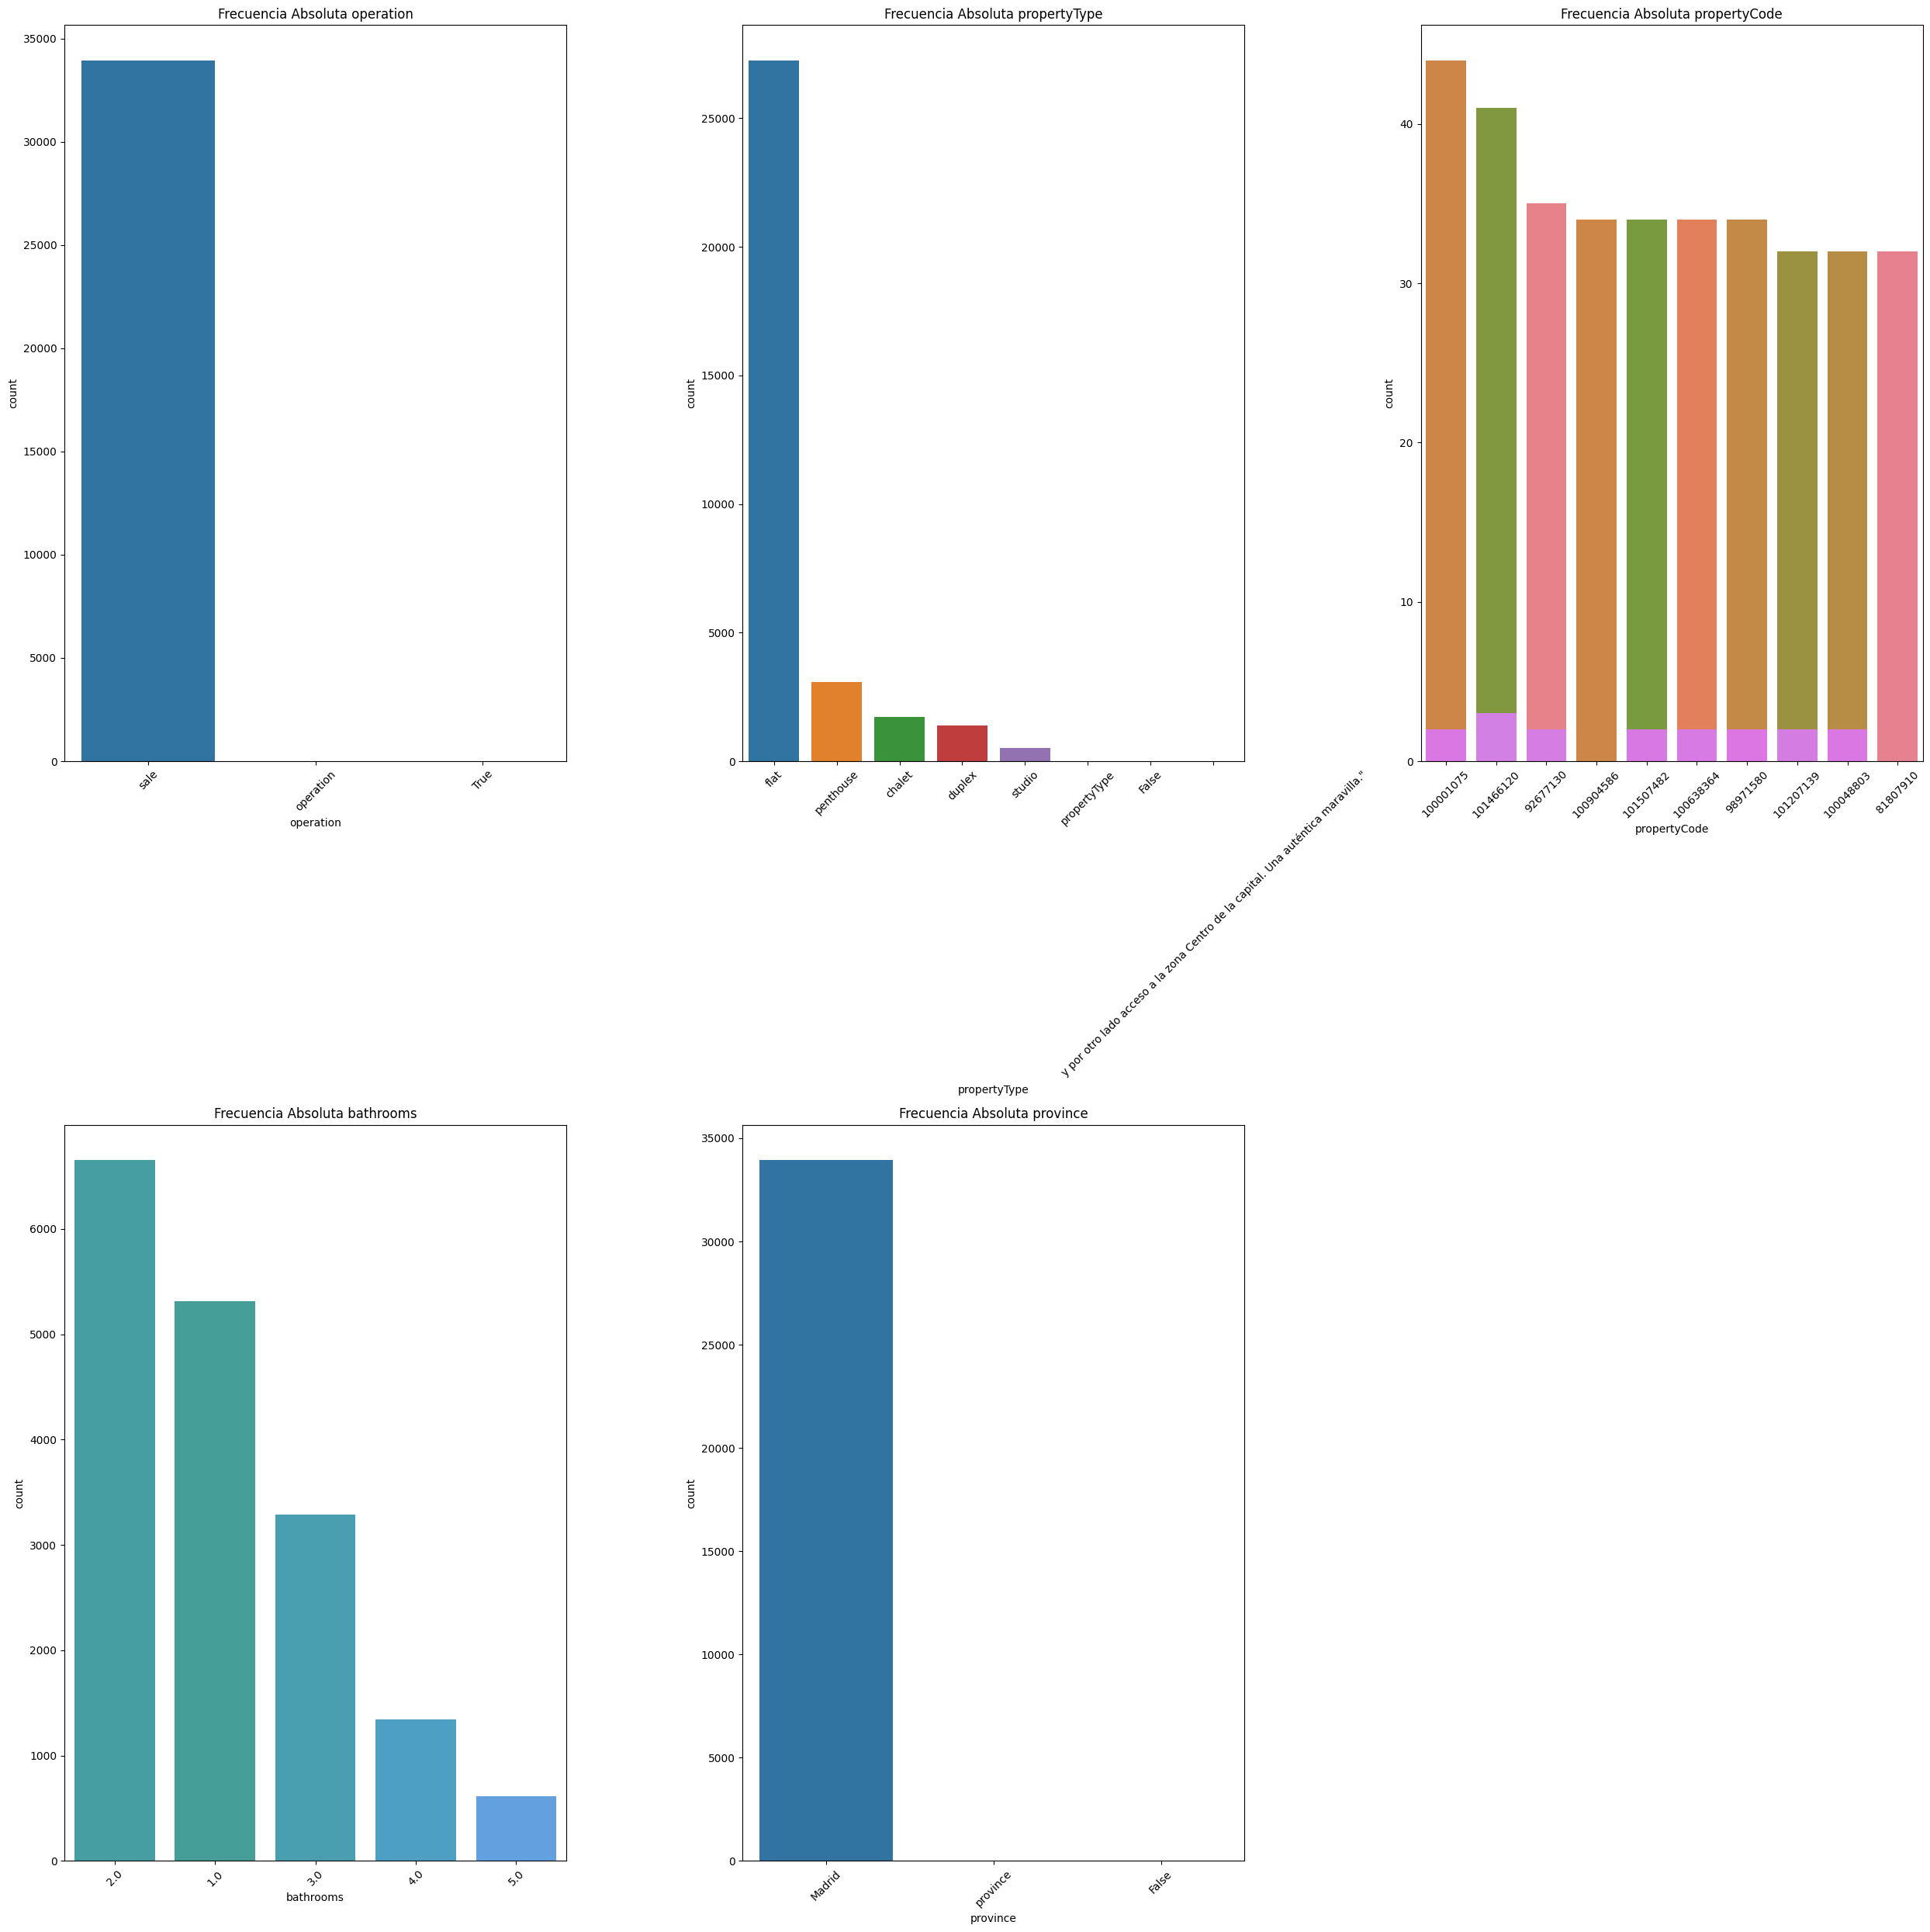

In [23]:
# Utilizamos la frecuencia absoluta para visualizar las variables categoricas

# Crear figura con 5 subplots
fig, axs = plt.subplots(2, 3, figsize=(25, 25))
axs = axs.flatten()
axs[5].axis('off')

data = df_raw.reset_index(drop=True)
# 1. operation
sns.countplot(
    x="operation",
    data=data,
    hue="operation",
    order=data["operation"].value_counts().index[:10],
    ax=axs[0],
    legend=False)

axs[0].set_title("Frecuencia Absoluta operation")
axs[0].tick_params(axis='x', rotation=45)
# 2. propertyType
sns.countplot(
    x="propertyType",
    data=df_raw,
    hue="propertyType",
    order=df_raw["propertyType"].value_counts().index,
    ax=axs[1],
    legend=False
)
axs[1].set_title("Frecuencia Absoluta propertyType")
axs[1].tick_params(axis='x', rotation=45)

# 3. propertyCode
sns.countplot(
    x="propertyCode",
    data=data,
    hue="propertyCode",
    order=data["propertyCode"].value_counts().index[:10],
    ax=axs[2],
    legend=False
)
axs[2].set_title("Frecuencia Absoluta propertyCode")
axs[2].tick_params(axis='x', rotation=45)



# 4. bathrooms
sns.countplot(
    x="bathrooms",
    data=data,
    hue="bathrooms",
    order=data["bathrooms"].value_counts().index[:10],
    ax=axs[3],
    legend=False
)
axs[3].set_title("Frecuencia Absoluta bathrooms")
axs[3].tick_params(axis='x', rotation=45)

# 5. province
sns.countplot(
    x="province",
    data=data,
    hue="province",
    order=data["province"].value_counts().index,
    ax=axs[4],
    legend=False
)
axs[4].set_title("Frecuencia Absoluta province")
axs[4].tick_params(axis='x', rotation=45)
# Ajuste final
plt.tight_layout()
plt.show()






# No entiendo porque genera graficas en blancob

### Frecuencia Relativa

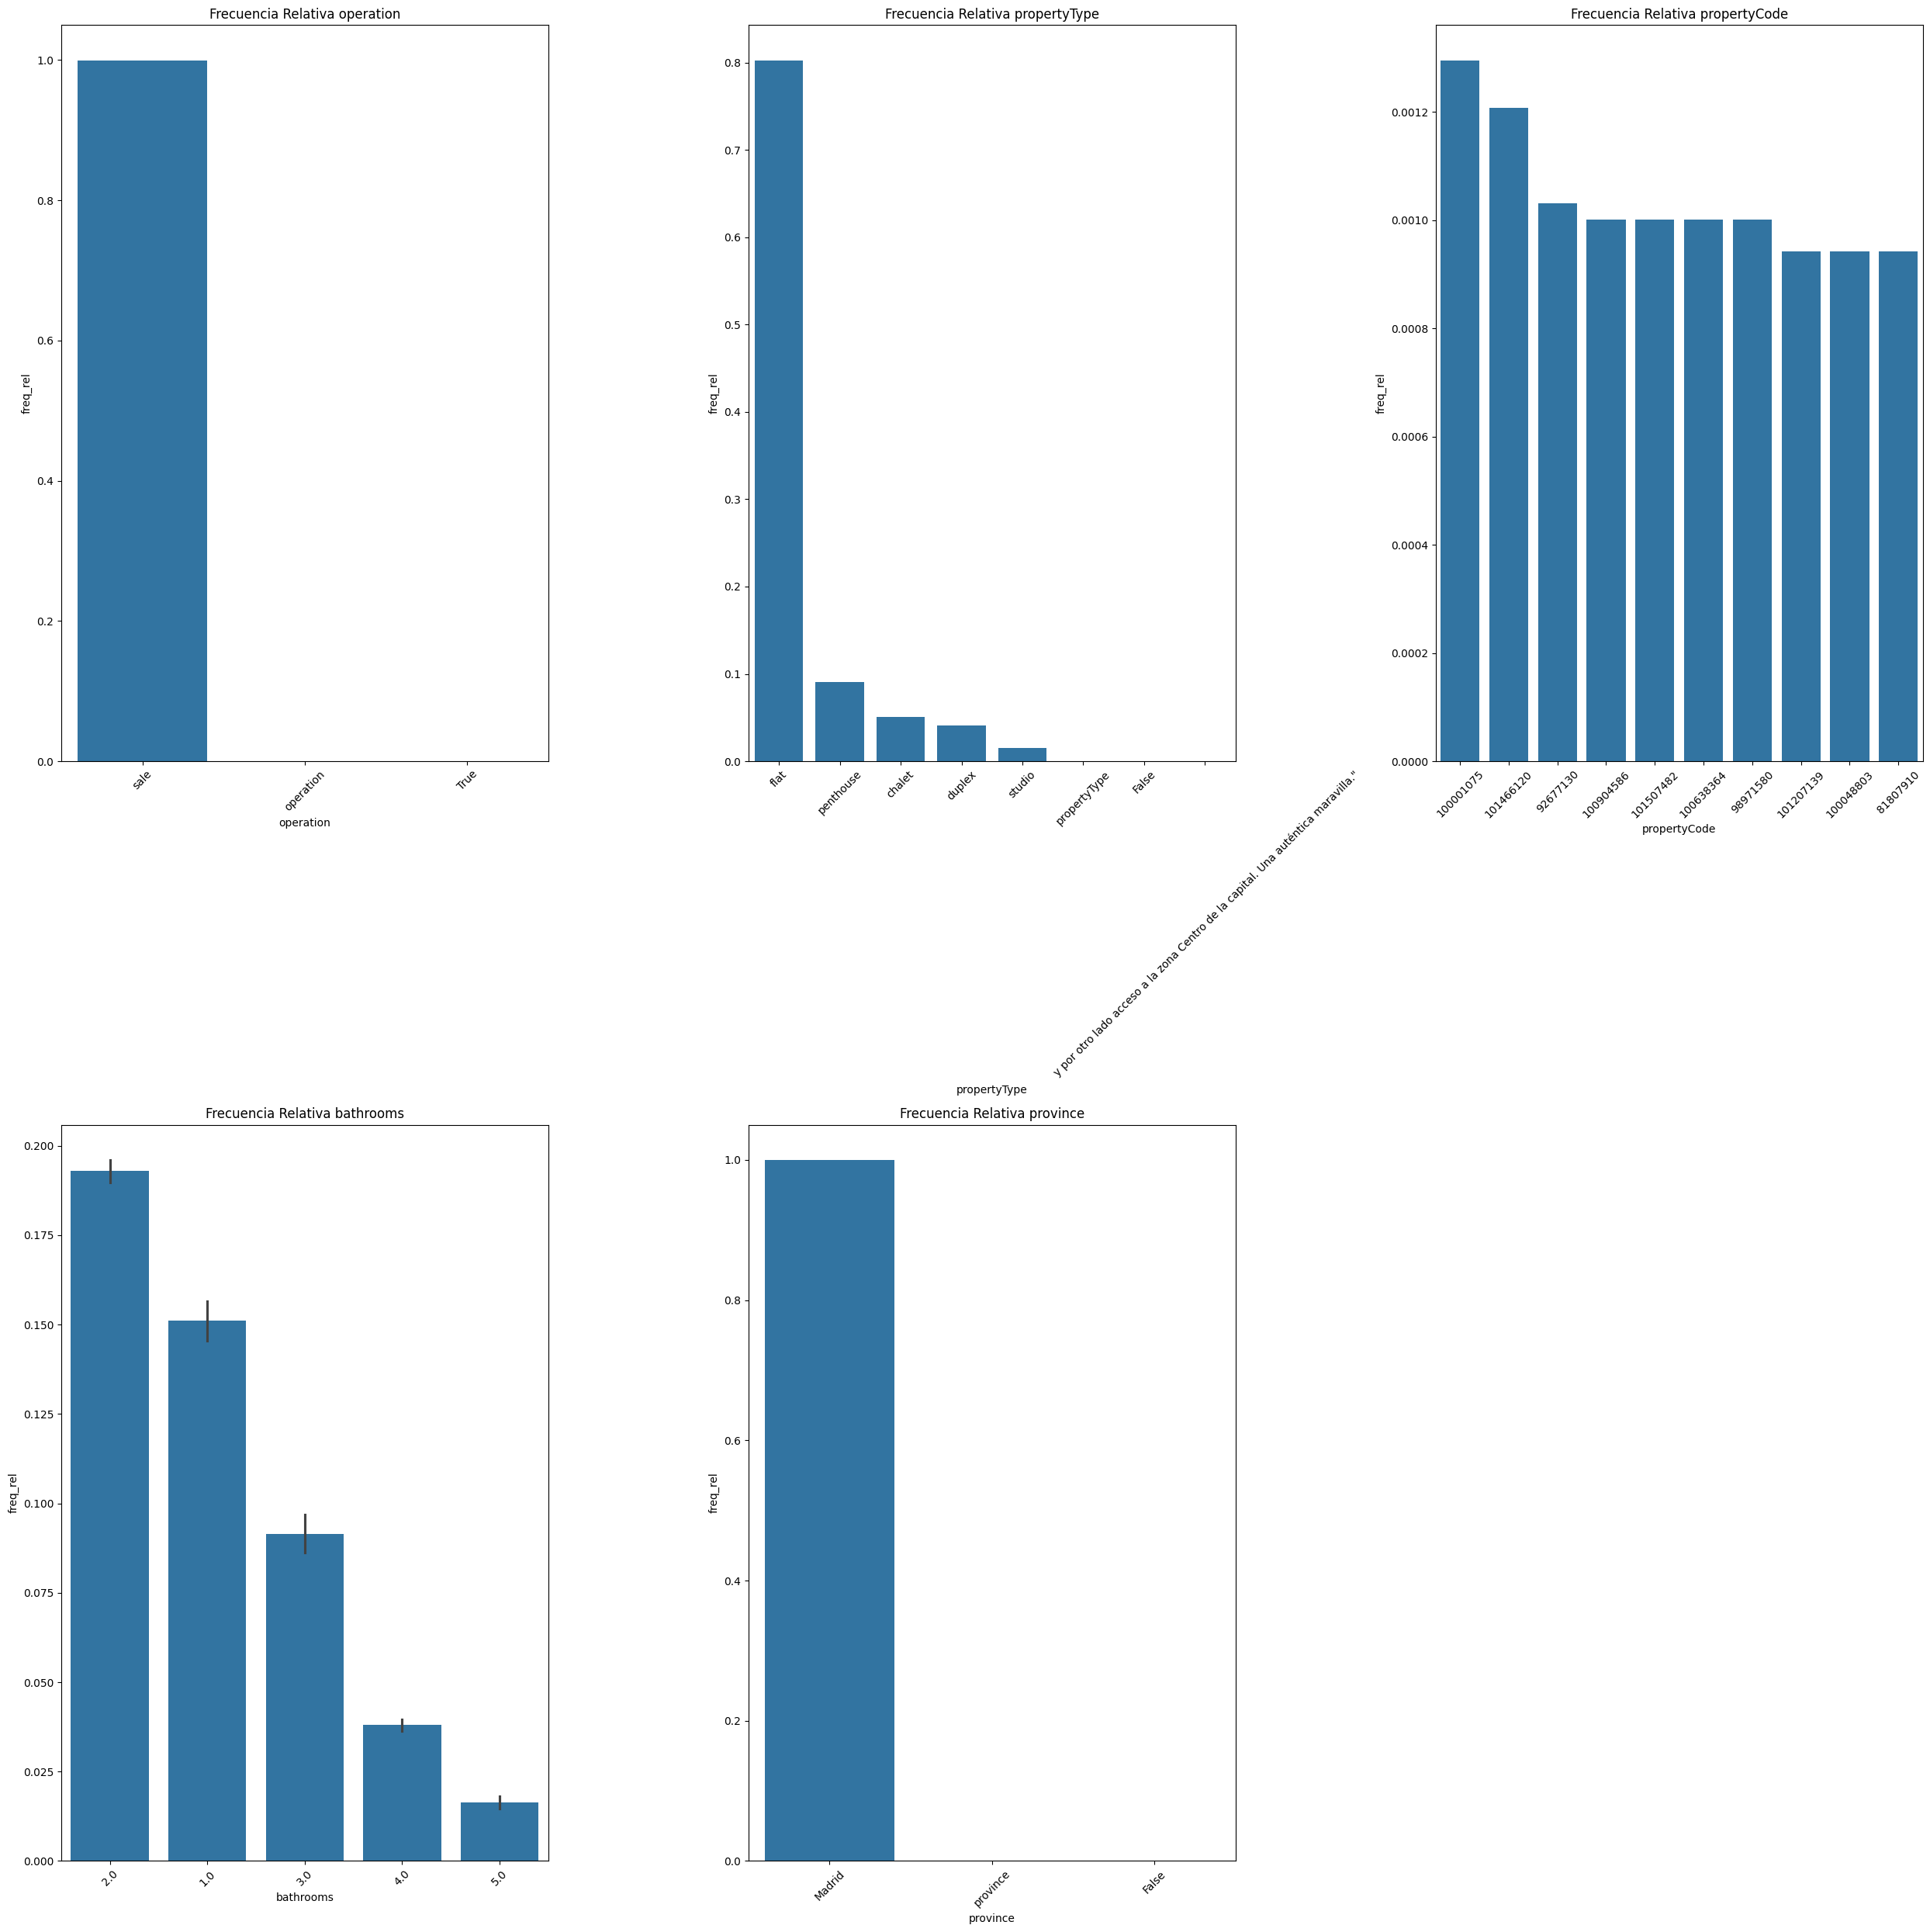

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(25, 25))
axs = axs.flatten()
axs[5].axis('off')

# 1. operation
freq_operation = (
    df_raw["operation"]
    .value_counts(normalize=True)
    .reset_index()
)
freq_operation.columns = ["operation", "freq_rel"]

sns.barplot(
    data=freq_operation,
    x="operation",
    y="freq_rel",
    ax=axs[0]
)
axs[0].set_title("Frecuencia Relativa operation")
axs[0].tick_params(axis='x', rotation=45)

# 2. propertyType
freq_propertyType = (
    df_raw["propertyType"]
    .value_counts(normalize=True)
    .reset_index()
)
freq_propertyType.columns = ["propertyType", "freq_rel"]

sns.barplot(
    data=freq_propertyType,
    x="propertyType",
    y="freq_rel",
    ax=axs[1]
)
axs[1].set_title("Frecuencia Relativa propertyType")
axs[1].tick_params(axis='x', rotation=45)

# 3. propertyCode (top 10)
freq_propertyCode = (
    df_raw["propertyCode"]
    .value_counts(normalize=True)
    .head(10)
    .reset_index()
)
freq_propertyCode.columns = ["propertyCode", "freq_rel"]

sns.barplot(
    data=freq_propertyCode,
    x="propertyCode",
    y="freq_rel",
    ax=axs[2]
)
axs[2].set_title("Frecuencia Relativa propertyCode")
axs[2].tick_params(axis='x', rotation=45)

# 4. bathrooms (top 10)
freq_bathrooms = (
    df_raw["bathrooms"]
    .value_counts(normalize=True)
    .head(10)
    .reset_index()
)
freq_bathrooms.columns = ["bathrooms", "freq_rel"]

sns.barplot(
    data=freq_bathrooms,
    x="bathrooms",
    y="freq_rel",
    ax=axs[3]
)
axs[3].set_title("Frecuencia Relativa bathrooms")
axs[3].tick_params(axis='x', rotation=45)

# 5. province
freq_province = (
    df_raw["province"]
    .value_counts(normalize=True)
    .reset_index()
)
freq_province.columns = ["province", "freq_rel"]

sns.barplot(
    data=freq_province,
    x="province",
    y="freq_rel",
    ax=axs[4]
)
axs[4].set_title("Frecuencia Relativa province")
axs[4].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Análisis Categóricas


**Operation :**
- En este apartado tratamos que tipo de operacion se ha llevado a cabo con los imuebles. En este todos son venta de propiedad

**PropertyType:**
- En este apartado comparamos que tio de viviendas son las mas demandadas y como vemos en el grafico se trara del tipo flat (apartamento)

**PropertyCode:**
-  Se trata del número de registro de los inmuebles

**Bathrooms:**
- Se categorizan las viviendas en función del número de baños que tienen, la mayoría disponen de 1

**Provice:**
- Como vemos en el gráfico de privincia todos los inmuebles están centrados en Madrid



### Columnas Sofía/ municipality-priceByArea

### Análisis Categóricas

#### Frecuencia absoluta

IndexError: index 6 is out of bounds for axis 0 with size 6

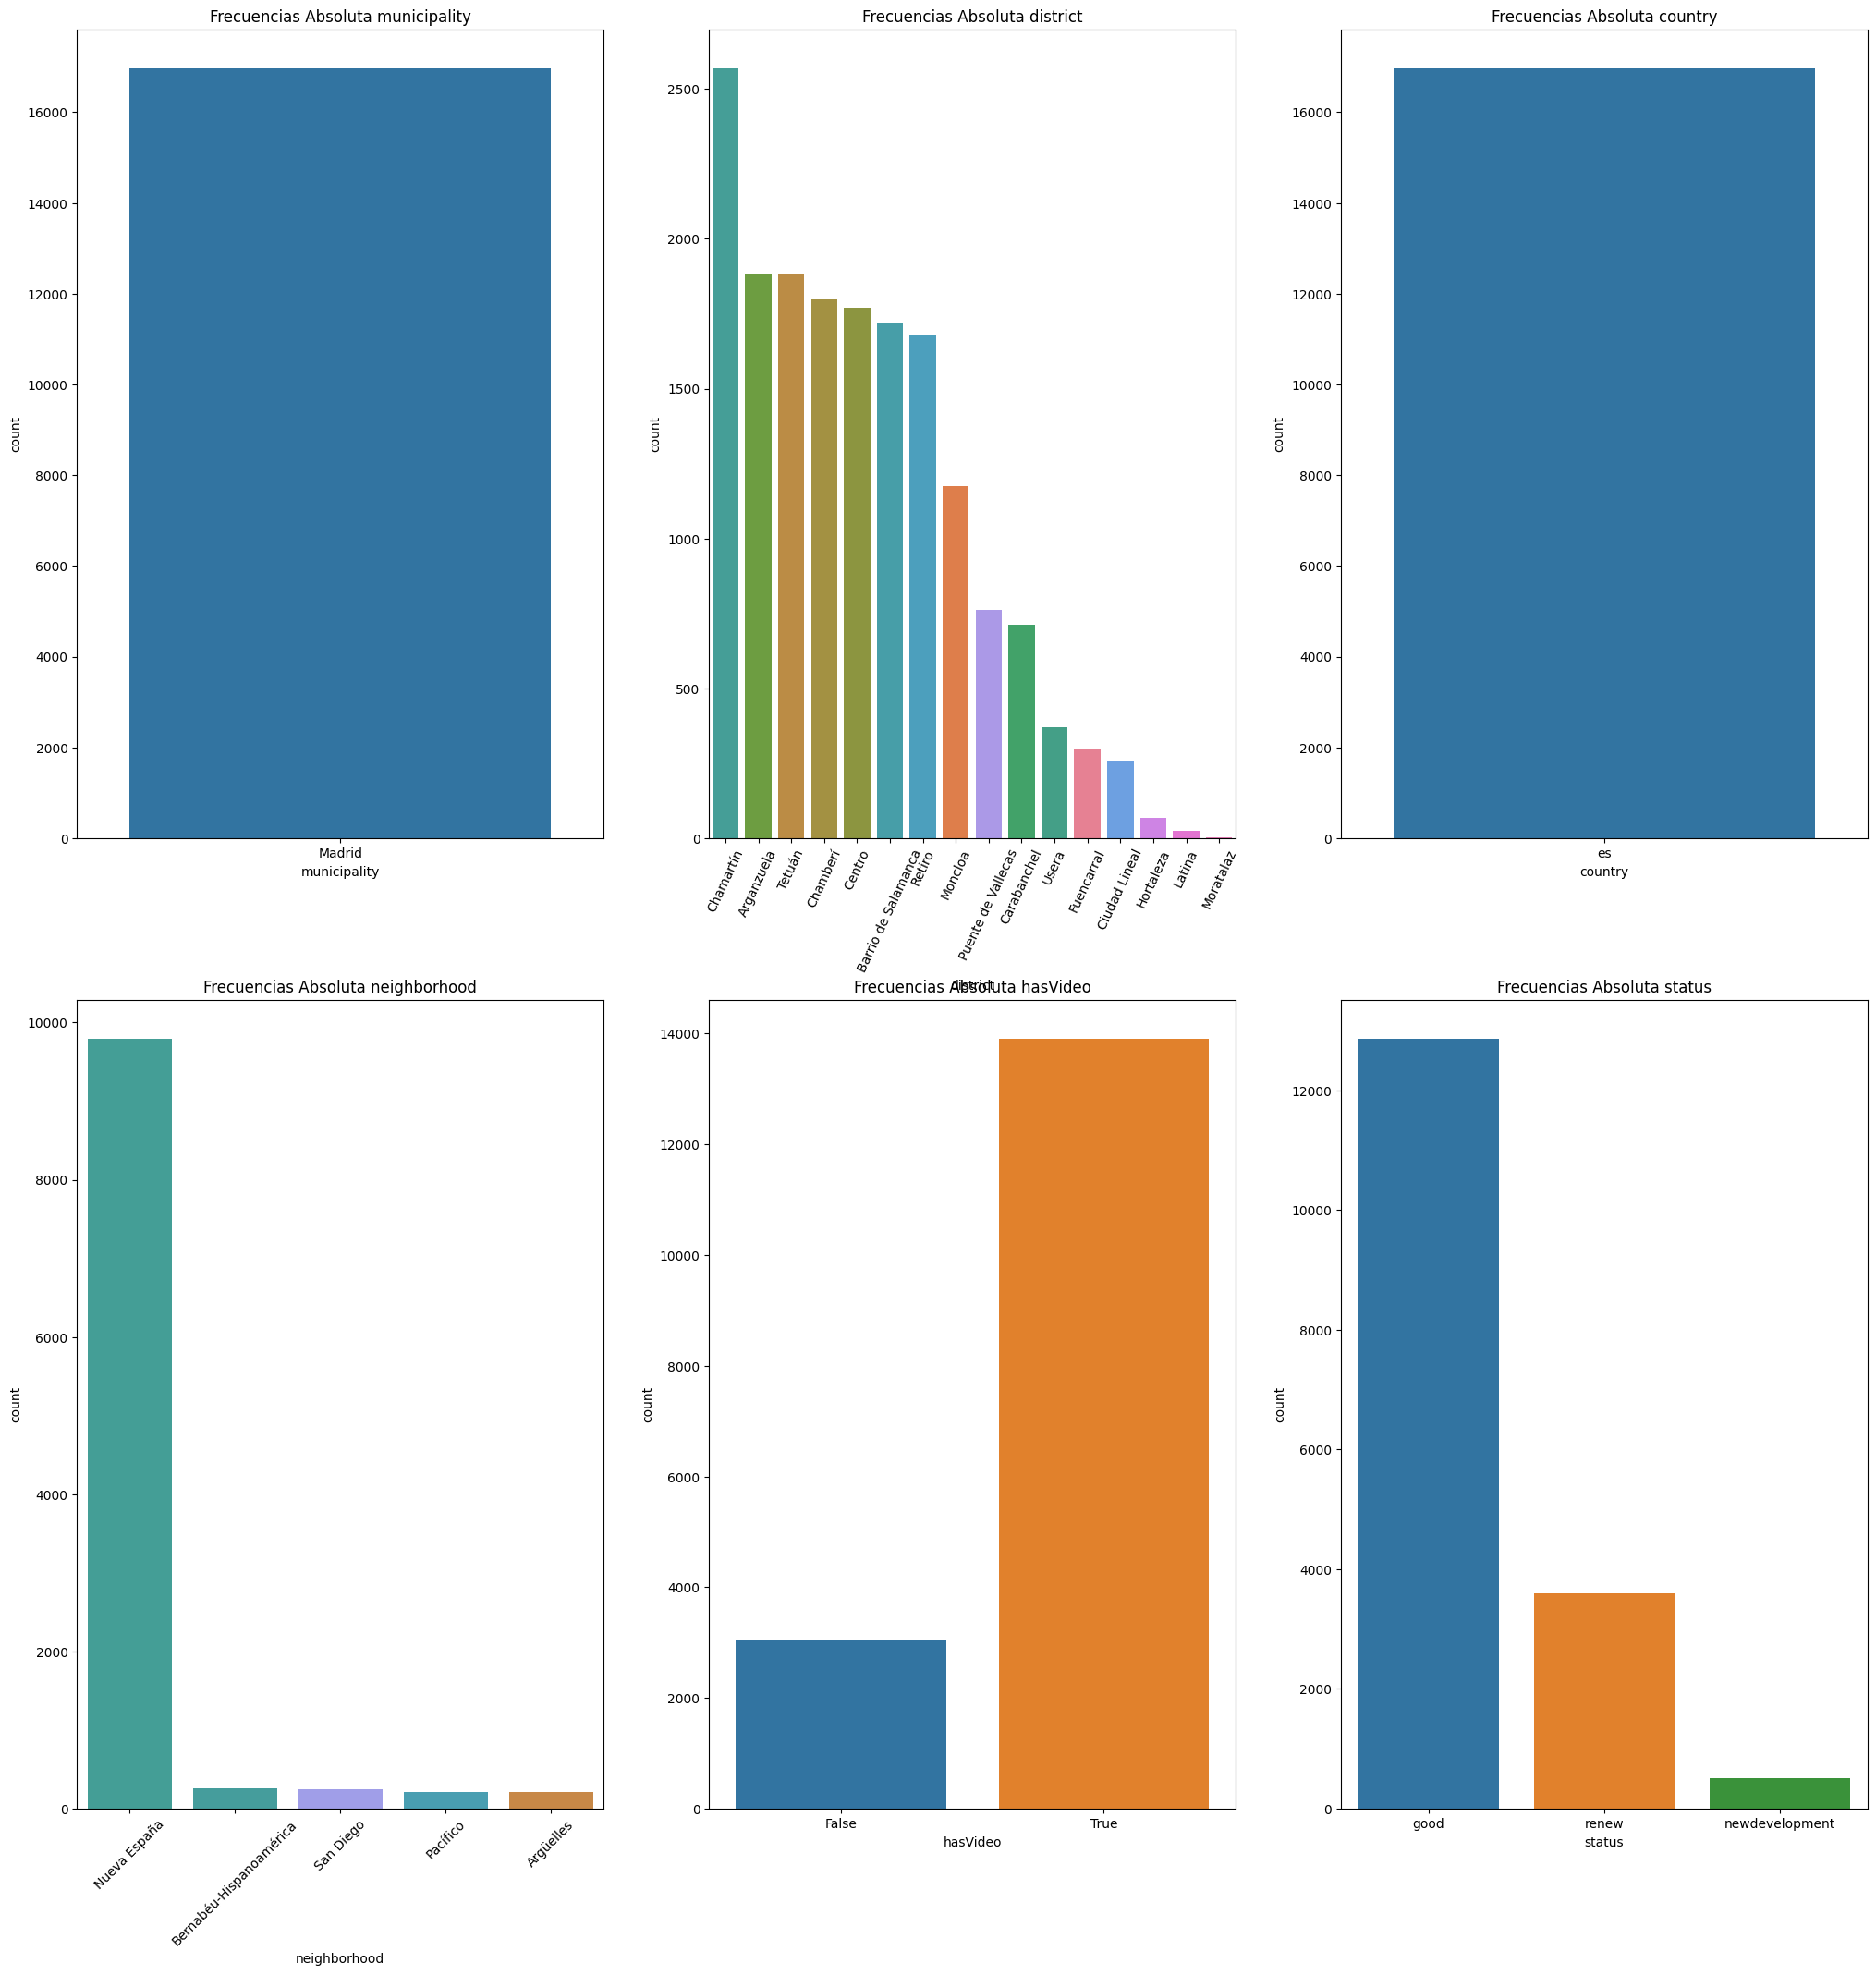

In [68]:
fig, axs = plt.subplots(2, 3, figsize=(25, 25))
axs = axs.flatten()

# Primera figura
sns.countplot(x= "municipality", data= df_raw, hue= "municipality", ax=axs[0], legend=False)
axs[0].set_title("Frecuencias Absoluta municipality")

# Segunda figuraorder=df_raw["district"].value_counts().index
sns.countplot(x="district", data=df_raw, hue= "district", ax=axs[1], , legend=False)
axs[1].set_title("Frecuencias Absoluta district")
axs[1].tick_params(axis='x', rotation=65)

# Tercera figura
sns.countplot(x="country", data=df_raw, hue= "country", ax=axs[2], legend=False)
axs[2].set_title("Frecuencias Absoluta country")

# Cuarta figura
sns.countplot(x="neighborhood", data=df_raw, hue= "neighborhood", ax=axs[3], order=df_raw["neighborhood"].value_counts().index[:5], legend=False)
axs[3].set_title("Frecuencias Absoluta neighborhood")
axs[3].tick_params(axis='x', rotation=45)

# Quinta figura
sns.countplot(x= "hasVideo", data= df_raw, hue= "hasVideo", ax= axs[4], legend= False)
axs[4].set_title("Frecuencias Absoluta hasVideo")

# Sexta figura
sns.countplot(x= "status", data= df_raw, hue= "status", ax= axs[5], legend= False)
axs[5].set_title("Frecuencias Absoluta status")

# Septima figura
sns.countplot(x= "newDevelopment", data= df_raw, hue= "newDevelopment", ax= axs[6], legend= False)
axs[6].set_title("Frecuencias Absoluta newDevelopment")

# Octava figura
sns.countplot(x= "hasLift", data= df_raw, hue= "hasLift", ax= axs[7], legend= False)
axs[7].set_title("Frecuencias Absoluta hasLift")


plt.tight_layout()#ajusta automáticamente el espacio entre los subplots
plt.show()



#### Frecuencia relativa

IndexError: index 6 is out of bounds for axis 0 with size 6

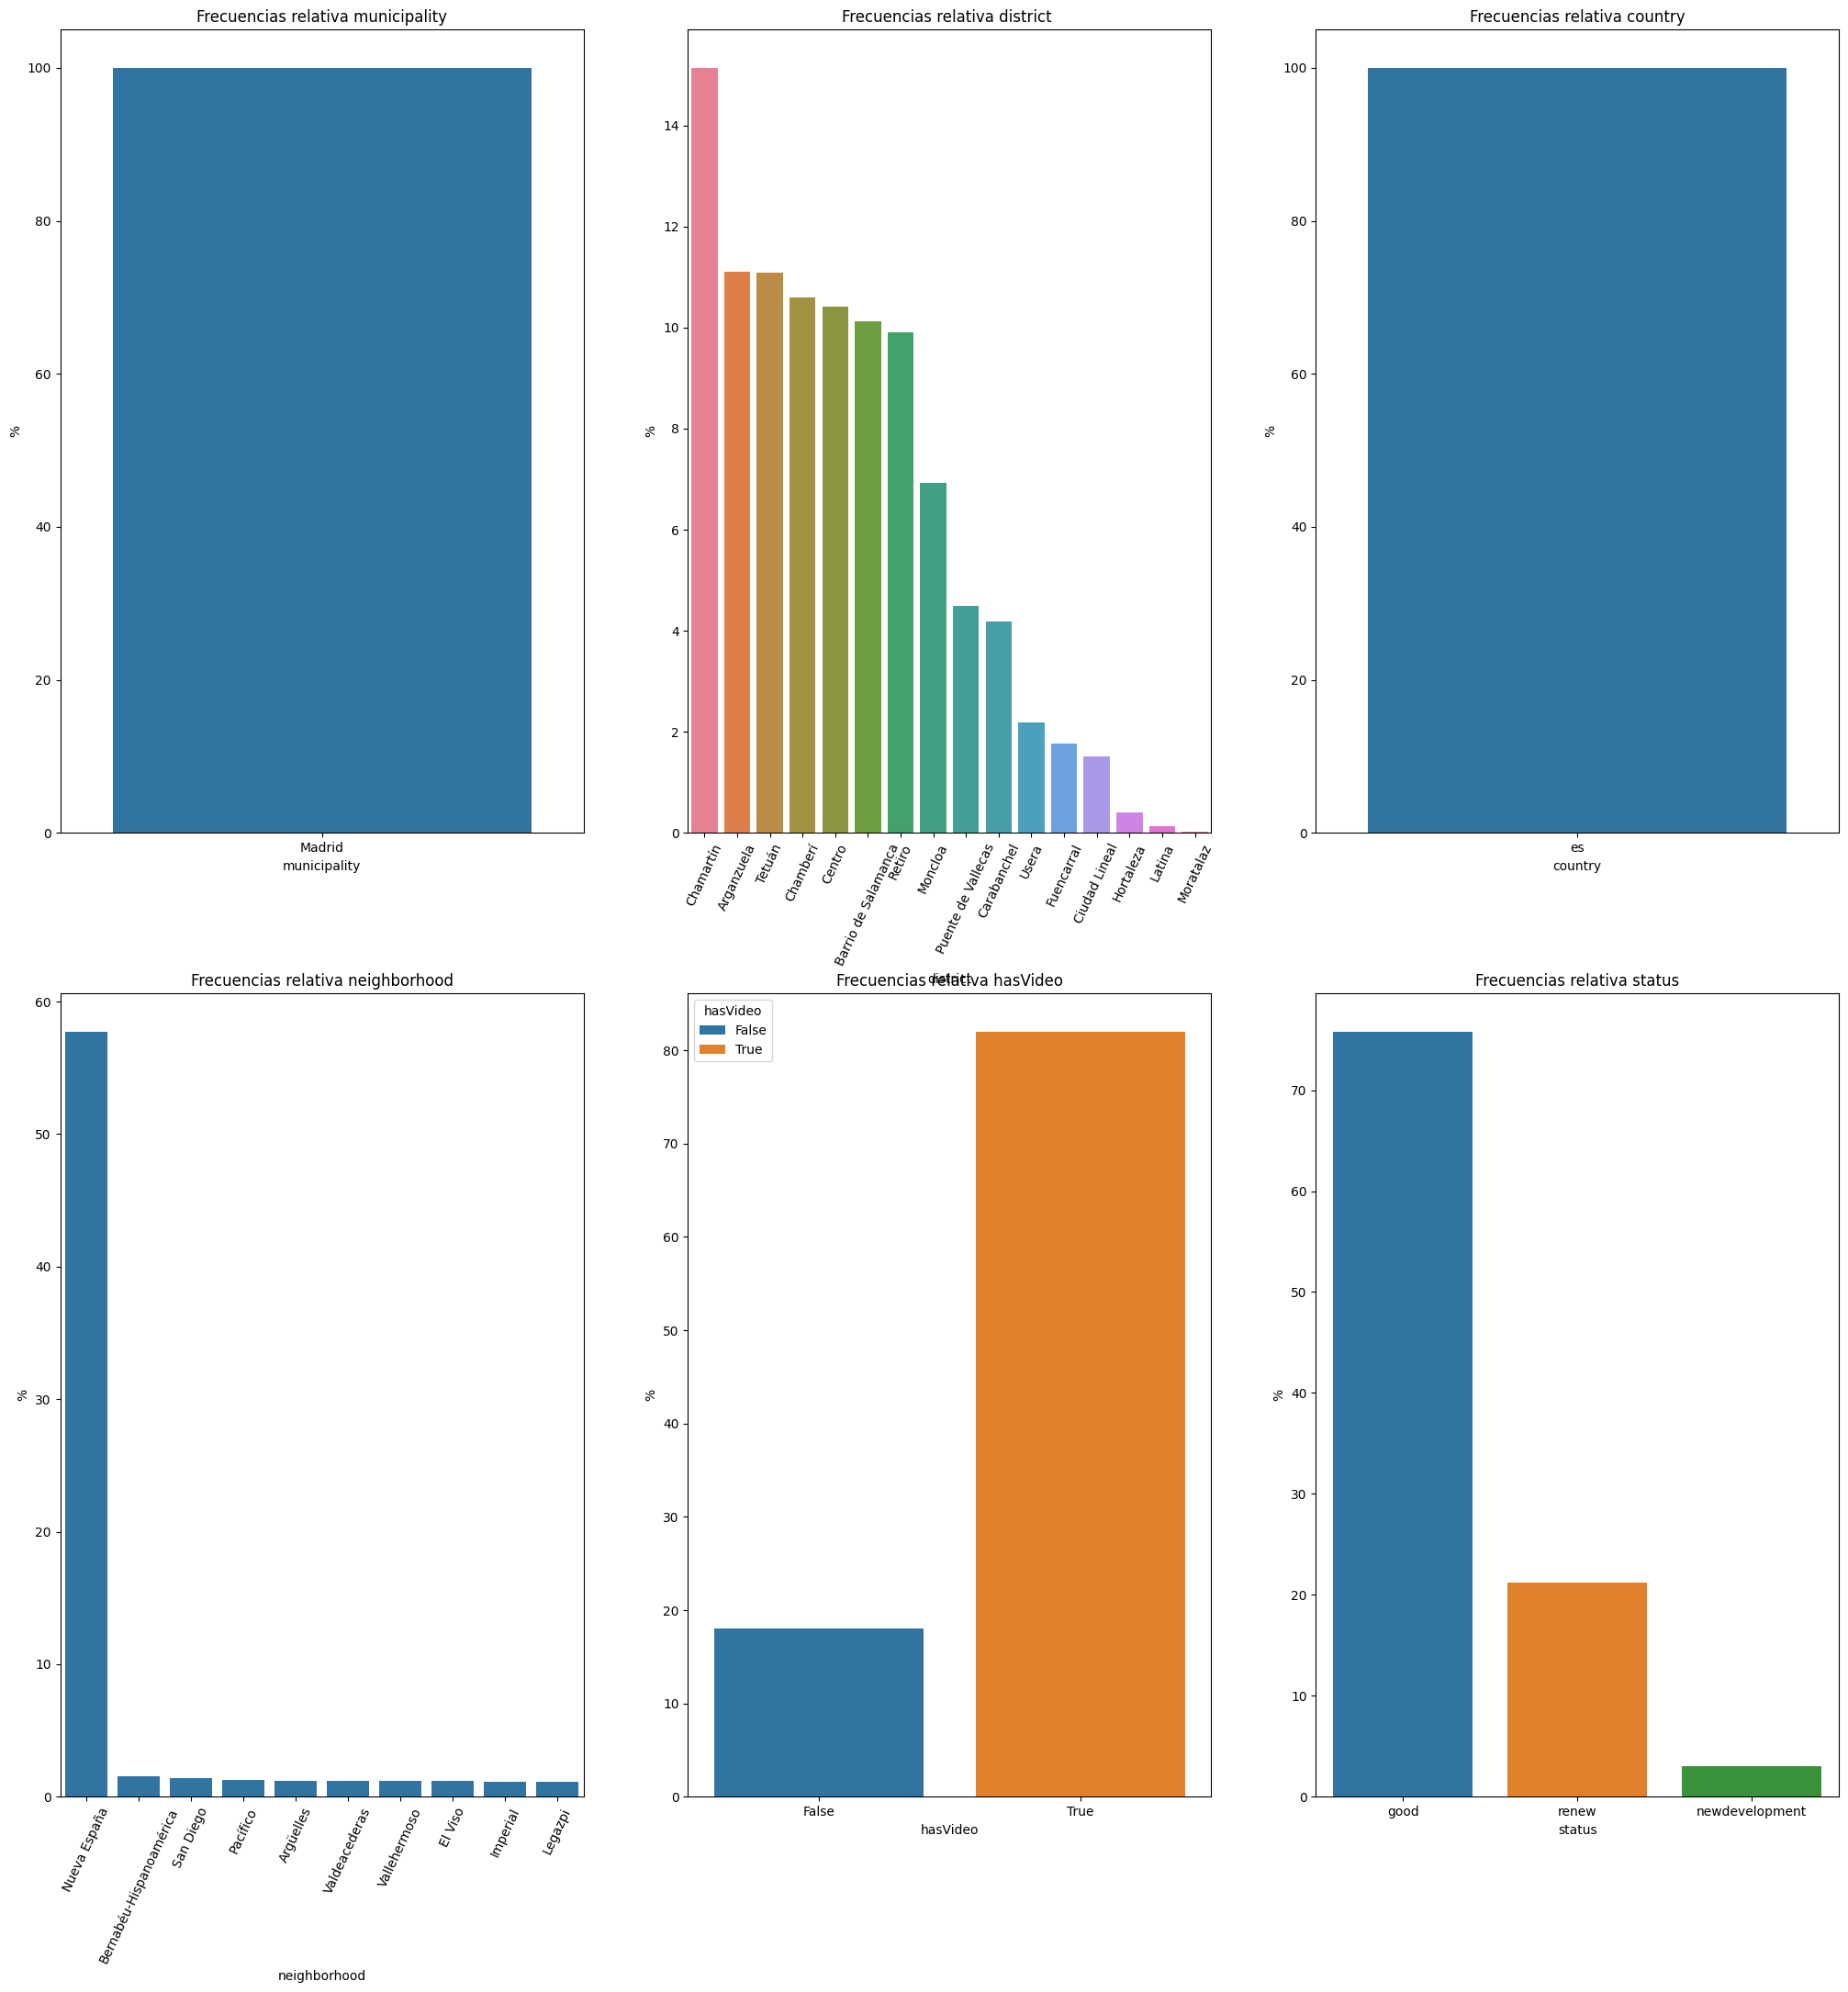

In [67]:
fig, axs = plt.subplots(2, 3, figsize=(25, 25))
axs = axs.flatten()

# Primera figura
valores = df_raw.municipality.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index,  ax = axs[0])
axs[0].set_title("Frecuencias relativa municipality")
axs[0].set_ylabel("%")


# Segunda figura
valores = df_raw.district.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[1])
axs[1].set_title("Frecuencias relativa district ")
axs[1].set_ylabel("%")
axs[1].tick_params(axis='x', rotation=65)


# Tercera figura
valores = df_raw.country.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[2])
axs[2].set_title("Frecuencias relativa country")
axs[2].set_ylabel("%")

# Cuarta figura
valores = df_raw.neighborhood.value_counts(normalize = True) * 100
top_barrios = valores.nlargest(10)
sns.barplot(x=top_barrios.index, y=top_barrios.values, ax = axs[3])
axs[3].set_title("Frecuencias relativa neighborhood")
axs[3].set_ylabel("%")
axs[3].tick_params(axis='x', rotation=65)


# Quinta figura
valores = df_raw.hasVideo.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[4])
axs[4].set_title("Frecuencias relativa hasVideo")
axs[4].set_ylabel("%")

# Sexta figura
valores = df_raw.status.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[5])
axs[5].set_title("Frecuencias relativa status")
axs[5].set_ylabel("%")

# Septima figura
valores = df_raw.newDevelopment.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[6])
axs[6].set_title("Frecuencias relativa newDevelopment")
axs[6].set_ylabel("%")

# Octava figura
valores = df_raw.hasLift.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[7])
axs[7].set_title("Frecuencias relativa hasLift")
axs[7].set_ylabel("%")


plt.tight_layout()#ajusta automáticamente el espacio entre los subplots
plt.show()

#### Análisis numéricas

In [69]:
numéricas.describe()

,Unnamed: 0.1,propertyCode,numPhotos,price,size,rooms,bathrooms,latitude,longitude,priceByArea,ex
count,29922.000000,2.991700e+04,9571.000000,2.991700e+04,29917.000000,29917.000000,29917.000000,29917.000000,29917.000000,29917.000000,2394.000000
mean,14960.500000,1.009765e+08,34.979939,9.317014e+05,151.045158,3.012869,2.242304,40.429559,-3.693117,5755.485410,598.000418
std,8637.881714,5.056693e+06,14.364912,9.389314e+05,107.973340,1.414001,1.236351,0.025776,0.017125,2456.897076,345.616931
min,0.000000,2.809747e+07,0.000000,6.000000e+04,21.000000,0.000000,0.000000,40.381682,-3.725622,911.000000,0.000000
25%,7480.250000,1.004437e+08,26.000000,3.650000e+05,82.000000,2.000000,1.000000,40.407449,-3.707502,4138.000000,299.000000
50%,14960.500000,1.015064e+08,33.000000,6.350000e+05,120.000000,3.000000,2.000000,40.429514,-3.693813,5210.000000,598.000000
75%,22440.750000,1.029084e+08,43.000000,1.150000e+06,185.000000,4.000000,3.000000,40.452235,-3.677504,6846.000000,897.000000
max,29921.000000,1.046568e+08,108.000000,1.180000e+07,995.000000,18.000000,20.000000,40.477295,-3.661150,18689.000000,1197.000000


##### IQR

In [70]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)
for col in numéricas.columns:
    print(col, get_IQR(df_raw, col))

Unnamed: 0.1 14960.5
propertyCode 2464625.0
numPhotos 0.0
price 785000.0
size 103.0
rooms 2.0
bathrooms 2.0
latitude 0.04478590000000082
longitude 0.029981224999999778
priceByArea 2708.0
ex 0.0


##### Rangos

In [71]:
numéricas.describe().loc["max"] - numéricas.describe().loc["min"]

Unnamed: 0.1    2.992100e+04
propertyCode    7.655931e+07
numPhotos       1.080000e+02
price           1.174000e+07
size            9.740000e+02
rooms           1.800000e+01
bathrooms       2.000000e+01
latitude        9.561330e-02
longitude       6.447250e-02
priceByArea     1.777800e+04
ex              1.197000e+03
dtype: float64

In [72]:
# IQR (donde está el 50% de las casas "normales") con el Rango (la distancia total entre el valor más bajo y el más alto).

#### IQR/ RANGO

**Numphotos:**
- IQR: 0.0 | Rango: 108.0
- Al ser el IQR de 0.0, la gran mayoría de los anuncios tienen la misma cantidad de fotos, mientras que el rango indica que solo unos pocos anuncios tienen muchas imágenes.

**Price:**
- IQR: 770,000 | Rango: 11,740,000
- Existe una gran diferencia entre el rango y el IQR. Mientras que la mayoría de las casas se mueven en un margen de 770 mil euros, el total llega hasta los 11 millones
- Esto explica que el promedio está muy inflado por unas pocas propiedades de lujo que no representan a la mayoría

**Size:**
- IQR: 102.0 | Rango: 974.0
- El rango es casi 10 veces más grande que el IQR
- Casi todas las viviendas tienen un tamaño parecido de 100 metros, pero hay un par de propiedades muy grandes que hacen que el rango se vea mayor

**Rooms/ Bathrooms:**
- IQR: 2.0 | Rango: 18.0/20.0
- El rango es desproporcionado respecto al IQR
- Casi todos los inmuebles tienen 2 habitaciones/baños. Los valores cercanos a 18/20 son casos aislados o errores de datos

**Latitude/Longitude:**
- IQR: 0.04 / 0.03 | Rango: 0.09 / 0.06
- Dispersión baja
- Los datos están geográficamente muy compactos. El IQR representa una gran parte del rango, lo que indica que no hay outliers significativos

**PriceByArea:**
- IQR: 2,722.0 | Rango: 17,778.0
- Dispersión alta
- Aunque la mayoría de los precios por metro están cerca unos de otros, hay zonas específicas donde el suelo es muchísimo más caro de lo normal





##### CV

In [73]:
# Obtenemos sus CV con una función
def get_CV(df_raw, columna):
    # Si columna es un DataFrame lo convierte en una lista de nombres
    if isinstance(columna, pd.DataFrame):
        columna = columna.columns.tolist()
    
    desc = df_raw[columna].describe().T
    return desc["std"] / desc["mean"] * 100

get_CV(df_raw, numéricas)


Unnamed: 0.1     57.737921
propertyCode      5.007376
numPhotos        23.224792
price           100.767586
size             71.478172
rooms            46.928135
bathrooms        55.132944
latitude          0.063751
longitude        -0.463674
priceByArea      42.684354
ex               16.344695
dtype: float64

#### CV

**NumPhotos: 27.02%**  
- Dispersión moderada
- Los datos no son homogeneos, pero están relativamente concentrados alrededor de la media

**Price: 101.00%**  
- Dispersión muy alta (más del 100%)
- Significa que la desviación estándar es mayor que la media
- Indica datos muy heterogéneos
- Puede haber outliers importantes  

**Size: 71.52%**
- Dispersión alta (más del 30%)
- La desviación estándar representa una parte significativa de la media
- Indica datos muy heterogéneos
- Puede haber outliers importantes

**Rooms: 47.88%**
- Dispersión alta (más del 30%)
- La desviación estándar representa una parte significativa de la media
- Indica datos muy heterogéneos
- Puede haber outliers importantes

**Bathrooms: 55.71%**
- Dispersión alta (más del 30%)
- La desviación estándar representa una parte significativa de la media
- Indica datos muy heterogéneos
- Puede haber outliers importantes

**Latitude:  0.06%**
- Dispersión baja (menor al 15%)
- Indica datos muy homogéneos
- La media define muy bien a todo el grupo

**Longitude:  0.47%**
- Dispersión baja (menor al 15%)
- Indica datos muy homogéneos
- La media define muy bien a todo el grupo

**PriceByArea: 43.18%**
- Dispersión alta (más del 30%)
- La desviación estándar representa una parte significativa de la media
- Indica datos muy heterogéneos
- Puede haber outliers importantes


##### Distribución: Histrogramas, Funciones Densidad (KDE)

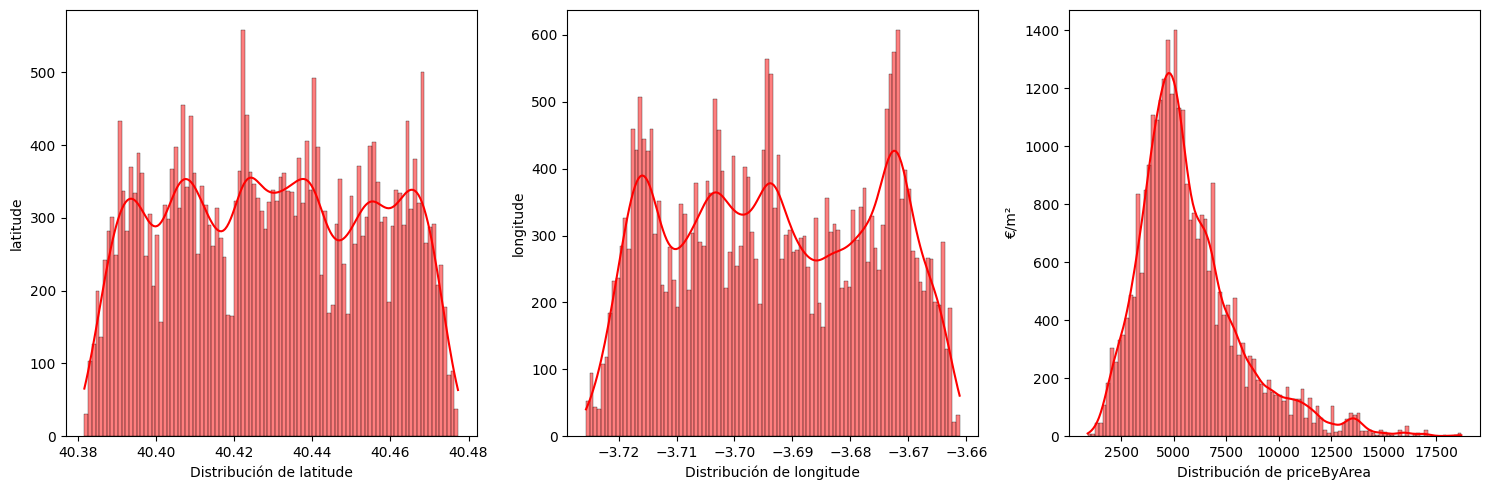

In [74]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs = axs.flatten()

# Primera figura
sns.histplot(df_raw["latitude"],
             kde=True,
             color='r',
             bins=100, ax = axs[0]) 
axs[0].set_xlabel("Distribución de latitude")
axs[0].set_ylabel("latitude")

# Segunda figura
sns.histplot(df_raw["longitude"],
             kde=True,
             color='r',
             bins=100, ax = axs[1]) 
axs[1].set_xlabel("Distribución de longitude")
axs[1].set_ylabel("longitude")

# Tercera figura
sns.histplot(df_raw["priceByArea"],
             kde=True,
             color='r',
             bins=100, ax = axs[2]) 
axs[2].set_xlabel("Distribución de priceByArea")
axs[2].set_ylabel("€/m²")

plt.tight_layout()#ajusta automáticamente el espacio entre los subplots
plt.show()

##### Boxplot

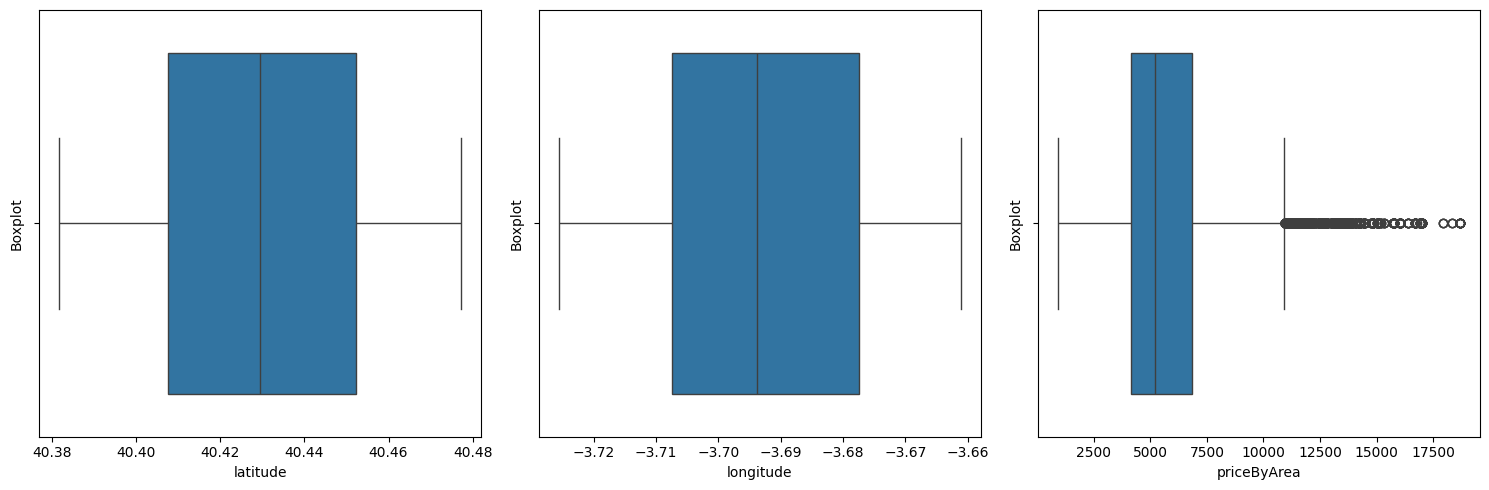

In [75]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs = axs.flatten()

# Primera figura
sns.boxplot(x = "latitude", data = df_raw, ax= axs[0])
axs[0].set_xlabel("latitude")
axs[0].set_ylabel("Boxplot")

# Segunda figura
sns.boxplot(x = "longitude", data = df_raw, ax= axs[1])
axs[1].set_xlabel("longitude")
axs[1].set_ylabel("Boxplot")

# Tercera figura
sns.boxplot(x = "priceByArea", data = df_raw, ax= axs[2])
axs[2].set_xlabel("priceByArea")
axs[2].set_ylabel("Boxplot")

plt.tight_layout()
plt.show()

#### Distribución y Boxplots

**Latitude y Longitude:**
- Al observar los histogramas de latitud y longitud, se pueden ver varios picos muy marcados. Me gustaría saber si el pico más alto de oferta (donde hay más propiedades) coincide con los precios más bajos o si, por el contrario los puntos más densos son también los más caros.

**PriceByArea:**
- Como podemos observar priceByArea tiene una cola muy larga hacia la derecha, Se podría generar un nuevo histograma de priceByArea filtrando los valores más altos (outliers). Esto nos permitirá ver con mucha más claridad si la mayoría de los precios se agrupan en una campana normal o si hay otros subgrupos ocultos.

### Análisis Bivariante